<!-- <font size= 5> -->
# Calculation of Cherenkov Yield and Angular Distribution from the passage of Proton in LAr using the new Resonant Refractive Index fit and Frank-Tamm formula in the vicinity of UV resonant wavelength of 106.6 nm 

In [2]:
#Import necesary modules to run the code
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# import numdifftools as nd
   
from matplotlib import rc
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import math
import scipy
from scipy import integrate
from scipy import optimize
from scipy.misc import derivative
from scipy.optimize import fsolve

# from sympy import *  #check 
from sympy import exp, Symbol, nsolve

from numpy import sqrt, sin, cos, pi
import csv
import time

# Refractive Indices

In [45]:
#Refractive index new fit: M. Sievert (Mathematica equivalent)
# initially
# a_0 = 1.189
# a_pvs = 0.00029
# tau = 0.0005

# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
tau = 0.000693652

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239


# lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd = np.linspace(90,700,2000)   #wavelength of light 


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd_peak = 115.11 #where n is max 


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + tau**2)))

n_jackson = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

#absorption co-efficient, alpha 

sigma = (lamd_peak - lamd_uv)
mu = lamd_peak
abs_coeff = np.exp(-(lamd - lamd_peak)**2/(2*sigma**2))/(np.sqrt(2*np.pi*sigma**2))

# plt.plot(n_pvs)

#Plot of n vs lambda in the LAr medium.

x = np.array([643.9, 578.0, 546.1, 508.6, 475.3, 435.8, 406.3, 365.0, 361.2, 128.0]) #xdata: wavelength in nm 
y = np.array([1.2256, 1.2264, 1.2269, 1.2277, 1.2285, 1.2297, 1.2308, 1.2331, 1.2326, 1.358]) #ydata: refractive index 1.358+/-0.003

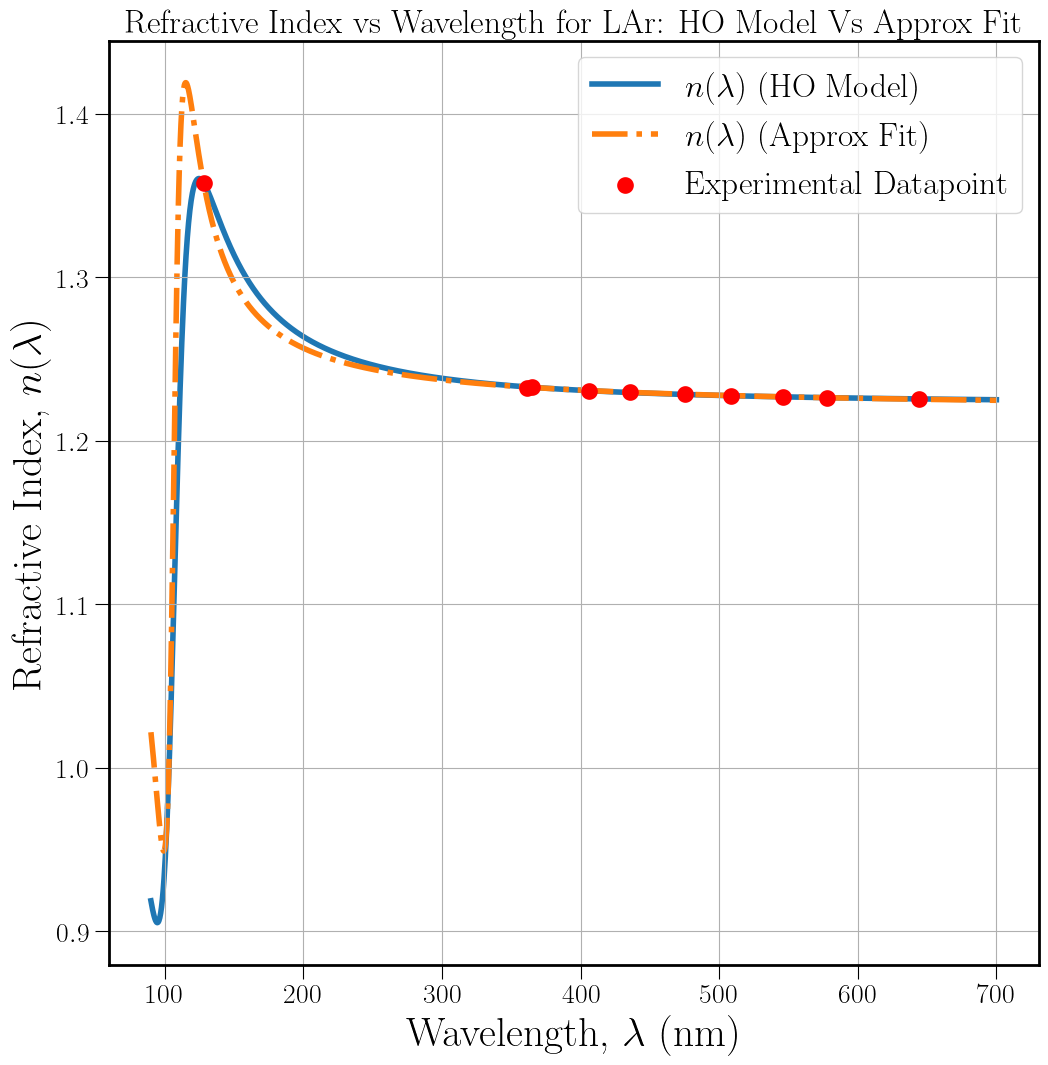

In [55]:
# plt.plot(x, y, 'ro')
# pyplot.scatter(x, y)
#Plot of n vs lambda in the LAr medium near Resonance  



fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title("Refractive Index vs Wavelength for LAr: HO Model Vs Approx Fit", fontsize=24)
# # ax.set_title("Refractive Index vs Wavelength for LAr:  Absorptive Fits", fontsize=24)
ax.plot(lamd, n_jackson, linewidth = 4, label=r'$n(\lambda)$ (HO Model)', zorder=1)
ax.plot(lamd, n_pvs, ls= 'dashdot', linewidth = 4, label='$n(\lambda)$ (Approx Fit)', zorder=1)

ax.scatter(x, y, color= 'r', linewidth= 6, label= "Experimental Datapoint", zorder=2) #'o', s= 5, color='b'

# # ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel(r'Wavelength, $\lambda$ (nm)',fontsize=30)
ax.set_ylabel(r'Refractive Index, $n(\lambda)$',fontsize=30)
ax.grid()
ax.legend(fontsize=24)

# plt.savefig("n_vs_lambda_hofit_full_withdatapoints.jpg", bbox_inches= 'tight') #Ctrl+/ to comment in or out 
# plt.savefig("n_vs_lambda_absfits_full_withdatapoints.jpg", bbox_inches= 'tight') #Ctrl+/ to comment in or out 

Numerical Method: Wavelength_min = 110.75037518759379 nm, Wavelength_max = 500.12506253126566 nm


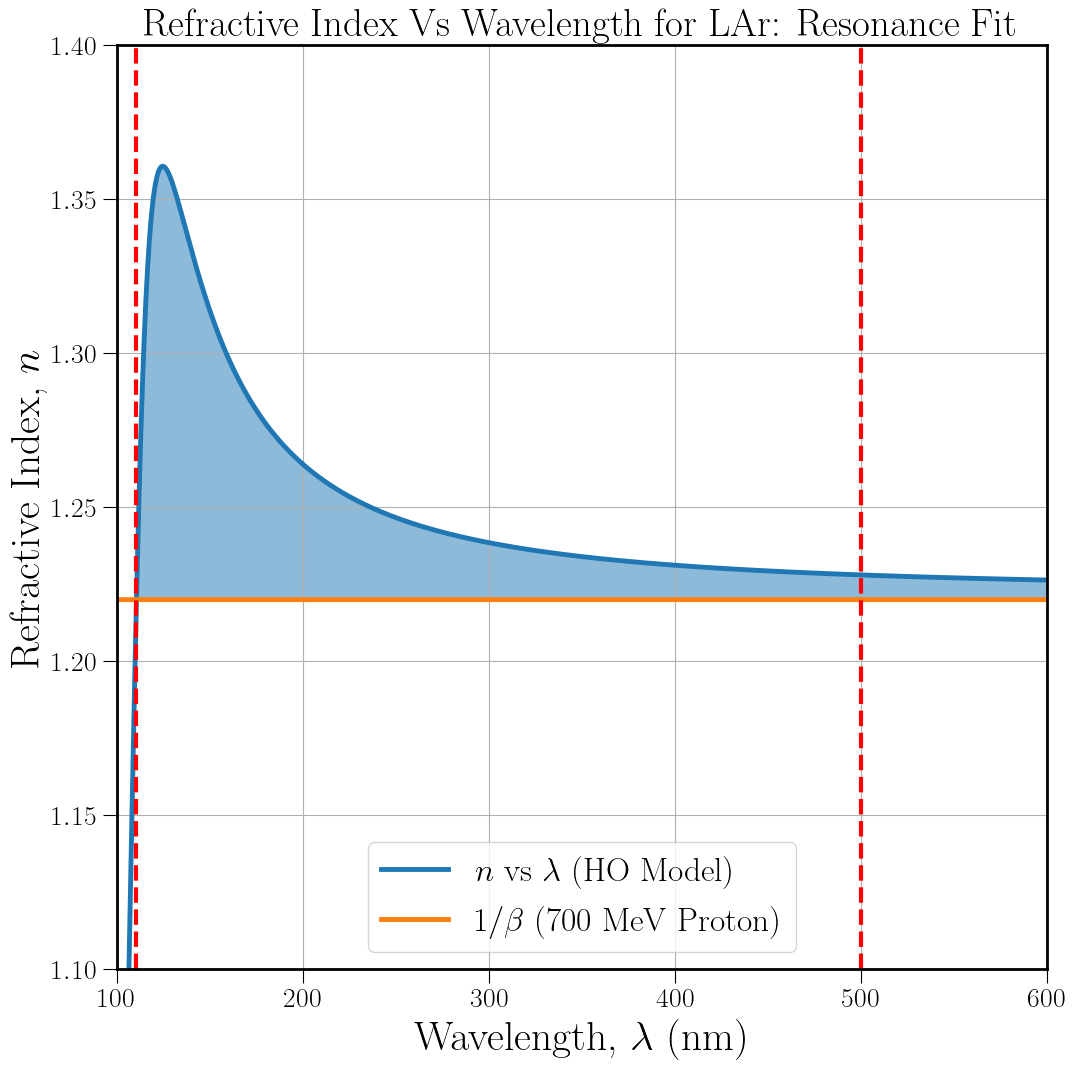

Wavelength_min = 110.75037518759379 nm, Wavelength_max = 500.12506253126566 nm


0.8144459385797942

In [36]:
# t = 445.3945 #K.E of Proton  in MeV
t = 678.574
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd = np.linspace(90,700,2000)   #wavelength of light 


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

# print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

# lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
# lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
# print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))
n_jackson = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


func = n_jackson - y

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


idx = np.argwhere(np.diff(np.sign(func))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

plt.plot(lamd[idx], func[idx], 'ro')
plt.show()
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Refractive Index Vs Wavelength for LAr: Resonance Fit", fontsize=28)
ax.plot(lamd, n_jackson, linewidth = 3.5, label="$n$ vs $\lambda$ (HO Model)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$ (445.4 MeV Proton)")
ax.fill_between(lamd, n_jackson, y, where= n_jackson >= y, alpha=0.5)


# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=30)
ax.set_ylabel('Refractive Index, $n$',fontsize=30)
ax.grid()
ax.legend(fontsize=24)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv

# plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
# plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin

plt.axvline(lamd[idx[0]], ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamd[idx[1]], ls='--',c='r',lw=3) #lamdmin

# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

# plt.ylim([1.15, 1.45])
# plt.xlim([106,160])
# plt.savefig("n_vs_lambda_near_resonance_hofit_P445MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta

Numerical Method: Wavelength_min = 110.44522261130565 nm, Wavelength_max = 500 nm


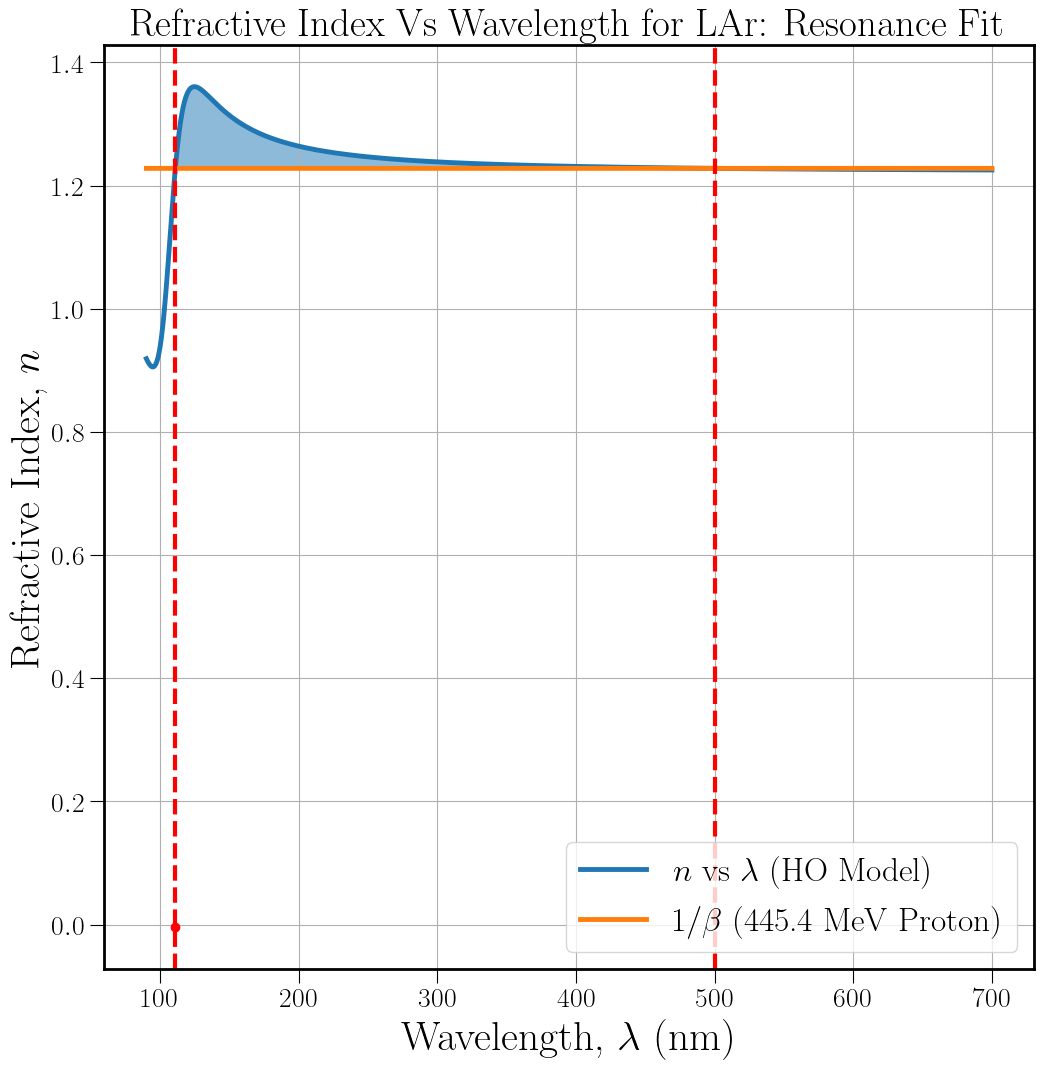

Wavelength_min = 110.44522261130565 nm, Wavelength_max = 500 nm


0.8198002603953367

In [37]:
t = 700 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

# print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

# lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
# lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
# print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))
n_jackson = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


func = n_jackson - y

idx = np.argwhere(np.diff(np.sign(func))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], 500))

plt.plot(lamd[idx], func[idx], 'ro')
plt.show()
# print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], 500))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Refractive Index Vs Wavelength for LAr: Resonance Fit", fontsize=28)
ax.plot(lamd, n_jackson, linewidth = 3.5, label="$n$ vs $\lambda$ (HO Model)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$ (700 MeV Proton)")
ax.fill_between(lamd, n_jackson, y, where= n_jackson >= y, alpha=0.5)


# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=30)
ax.set_ylabel('Refractive Index, $n$',fontsize=30)
ax.grid()
ax.legend(fontsize=24, loc='lower center')

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv

# plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
# plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin

plt.axvline(lamd[idx[0]], ls='--',c='r',lw=3) #lamdmin
plt.axvline(500, ls='--',c='r',lw=3) #lamdmax
# plt.axvline(lamd[idx[2]], ls='--',c='r',lw=3) #lamdmin

# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

plt.ylim([1.1, 1.4])
plt.xlim([100,600])
# plt.savefig("n_vs_lambda_near_resonance_hofit_P700MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta

Numerical Method: Wavelength_min = 115.6328164082041 nm, Wavelength_max = 146.7583791895948 nm


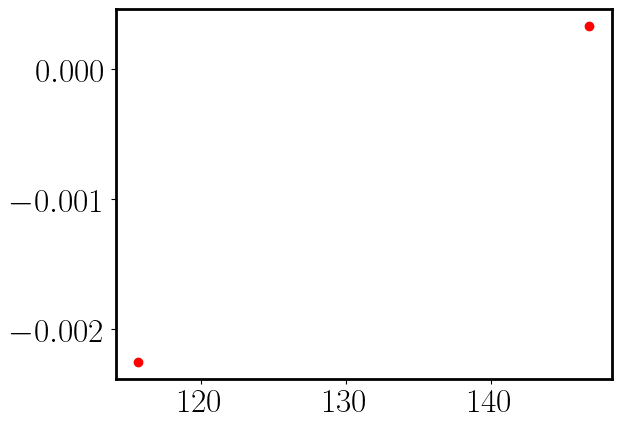

Wavelength_min = 115.6328164082041 nm, Wavelength_max = 146.7583791895948 nm


0.7579653181328908

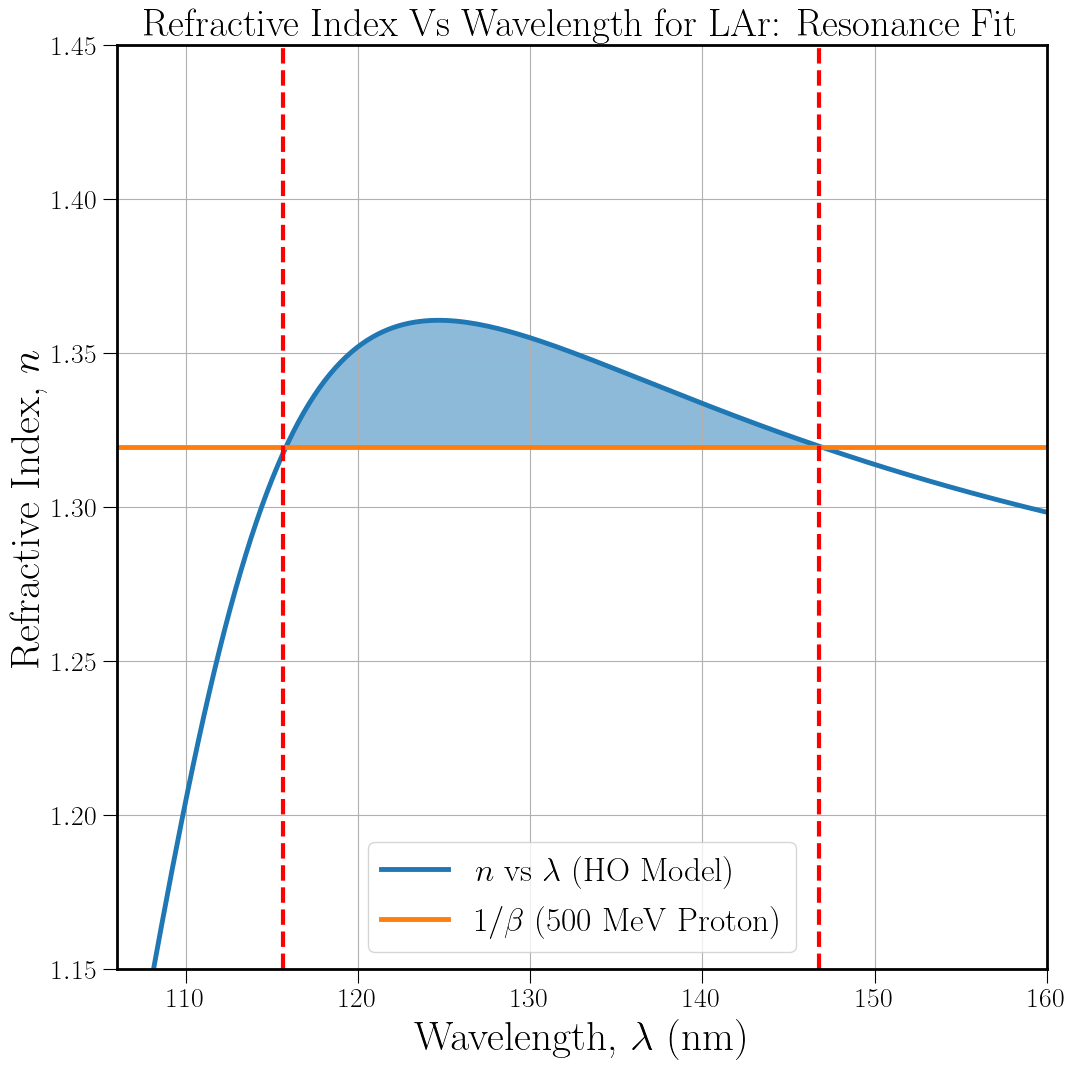

In [26]:
t = 500 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 


# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + (lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2))))

# print("Algebraic Method (on Paper): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

# lammin = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 + np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
# lammax = (-2*lamd_uv + 2*a_0*beta*lamd_uv + a_pvs*beta*lamd_uv**2 - np.sqrt(a_pvs**2*beta**2*lamd_uv**4 - 4*gamma**2*lamd_uv**4 + 8*a_0*beta*gamma**2*lamd_uv**4 - 4*a_0**2*beta**2*gamma**2*lamd_uv**4)) / (2*(-1+a_0*beta + a_pvs*beta*lamd_uv- gamma**2*lamd_uv**2 + a_0*beta*gamma**2*lamd_uv**2))
# print("Algebraic Method (Mathematica): Wavelength_min = {} nm, Wavelength_max = {} nm".format(lammin, lammax))


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))
n_jackson = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


func = n_jackson - y

idx = np.argwhere(np.diff(np.sign(func))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

plt.plot(lamd[idx], func[idx], 'ro')
plt.show()
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Refractive Index Vs Wavelength for LAr: Resonance Fit", fontsize=28)
ax.plot(lamd, n_jackson, linewidth = 3.5, label="$n$ vs $\lambda$ (HO Model)")
ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$ (500 MeV Proton)")
ax.fill_between(lamd, n_jackson, y, where= n_jackson >= y, alpha=0.5)


# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=30)
ax.set_ylabel('Refractive Index, $n$',fontsize=30)
ax.grid()
ax.legend(fontsize=24)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv

# plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
# plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin

plt.axvline(lamd[idx[0]], ls='--',c='r',lw=3) #lamdmax
plt.axvline(lamd[idx[1]], ls='--',c='r',lw=3) #lamdmin

# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

plt.ylim([1.15, 1.45])
plt.xlim([106,160])
# plt.savefig("n_vs_lambda_near_resonance_hofit_P500MeVzoom.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta
# n_jackson(124.68)

[106.        106.0060015 106.012003  ... 129.987997  129.9939985
 130.       ] [ 0.03082522  0.03083023  0.03083521 ... -0.00178366 -0.00178467
 -0.00178567]
Wavelength corrsponding to the max refractive index value = 124.68267066766691 nm
Max refractive index value = 1.3605048701261044


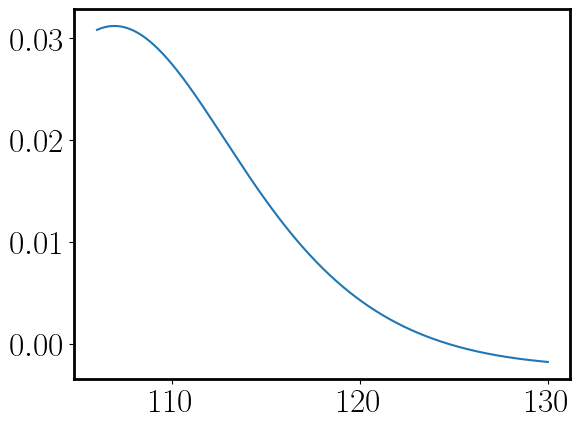

In [27]:
# from sympy import exp, Symbol, nsolve

#Finding the lowest K.E of Proton that emits Cerenkov radiation from the asymtotic behaviour of the refractive index 
#(finding the peak of n by setting it's first derivative to zero)

# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(106,130,4000)   #wavelength of light 
# lamd = np.linspace(90,700,2000)   #wavelength of light 


#Formula: 
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))
n_jackson = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


#Symmetric derivative formula
def fun(lamd):
    return a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2))))

def d_fun(lamd):
    h = 1e-5
    return (fun(lamd+h)-fun(lamd-h))/(2*h)

plt.plot(lamd,d_fun(lamd))
print(lamd, d_fun(lamd))
list_c = [[x, y] for x, y in zip(lamd, d_fun(lamd))]
                                 

idx = np.argwhere(np.diff(np.sign(d_fun(lamd)))).flatten()
print("Wavelength corrsponding to the max refractive index value = {} nm".format(lamd[idx[0]]))
# print(d_fun(115.00750375187594), fun(115.00750375187594))

print("Max refractive index value = {}".format(fun(124.683)))


# sp.solve(d_fun(lamd), lamd)
# fsolve(d_fun,lamd)
# sp.solve(d_fun,lamd)

# d_fun(lamd) == 0
# sp.solve(d_fun,lamd)
# y = nsolve(d_fun)
# y
# d_fun(115.111), fun(115.111), 1/fun(115.111)

[ 90.          90.30515258  90.61030515 ... 699.38969485 699.69484742
 700.        ] [-4.84194683e-03 -4.67839282e-03 -4.49770294e-03 ... -7.70995490e-06
 -7.69959652e-06 -7.68926034e-06]
Wavelength corrsponding to the max refractive index value = 94.57728864432217 nm


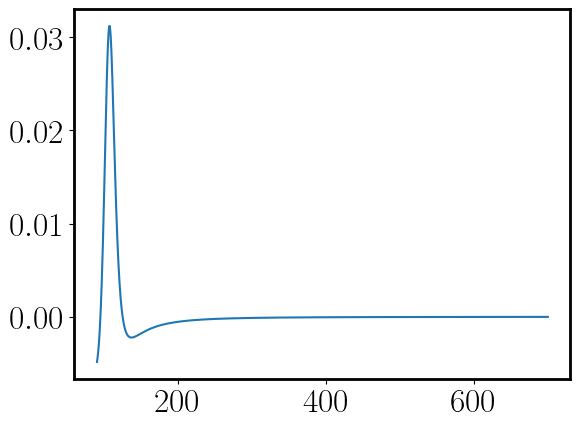

In [648]:
# from sympy import exp, Symbol, nsolve

#Finding the lowest K.E of Proton that emits Cerenkov radiation from the asymtotic behaviour of the refractive index 
#(finding the peak of n by setting it's first derivative to zero)
lamd = np.linspace(90,700,2000)

# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

# lamd = np.linspace(106,130,4000)   #wavelength of light 
# lamd = np.linspace(100,700,2000)   #wavelength of light 


#Formula: 
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))
n_jackson = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


#Symmetric derivative formula
def fun(lamd):
    return a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2))))

def d_fun(lamd):
    h = 1e-5
    return (fun(lamd+h)-fun(lamd-h))/(2*h)

plt.plot(lamd,d_fun(lamd))
print(lamd, d_fun(lamd))
list_c = [[x, y] for x, y in zip(lamd, d_fun(lamd))]
                                 

idx = np.argwhere(np.diff(np.sign(d_fun(lamd)))).flatten()
print("Wavelength corrsponding to the max refractive index value = {} nm".format(lamd[idx[0]]))
# print(d_fun(115.00750375187594), fun(115.00750375187594))

# sp.solve(d_fun(lamd), lamd)
# fsolve(d_fun,lamd)
# sp.solve(d_fun,lamd)

# d_fun(lamd) == 0
# sp.solve(d_fun,lamd)
# y = nsolve(d_fun)
# y
# d_fun(115.111), fun(115.111), 1/fun(115.111)

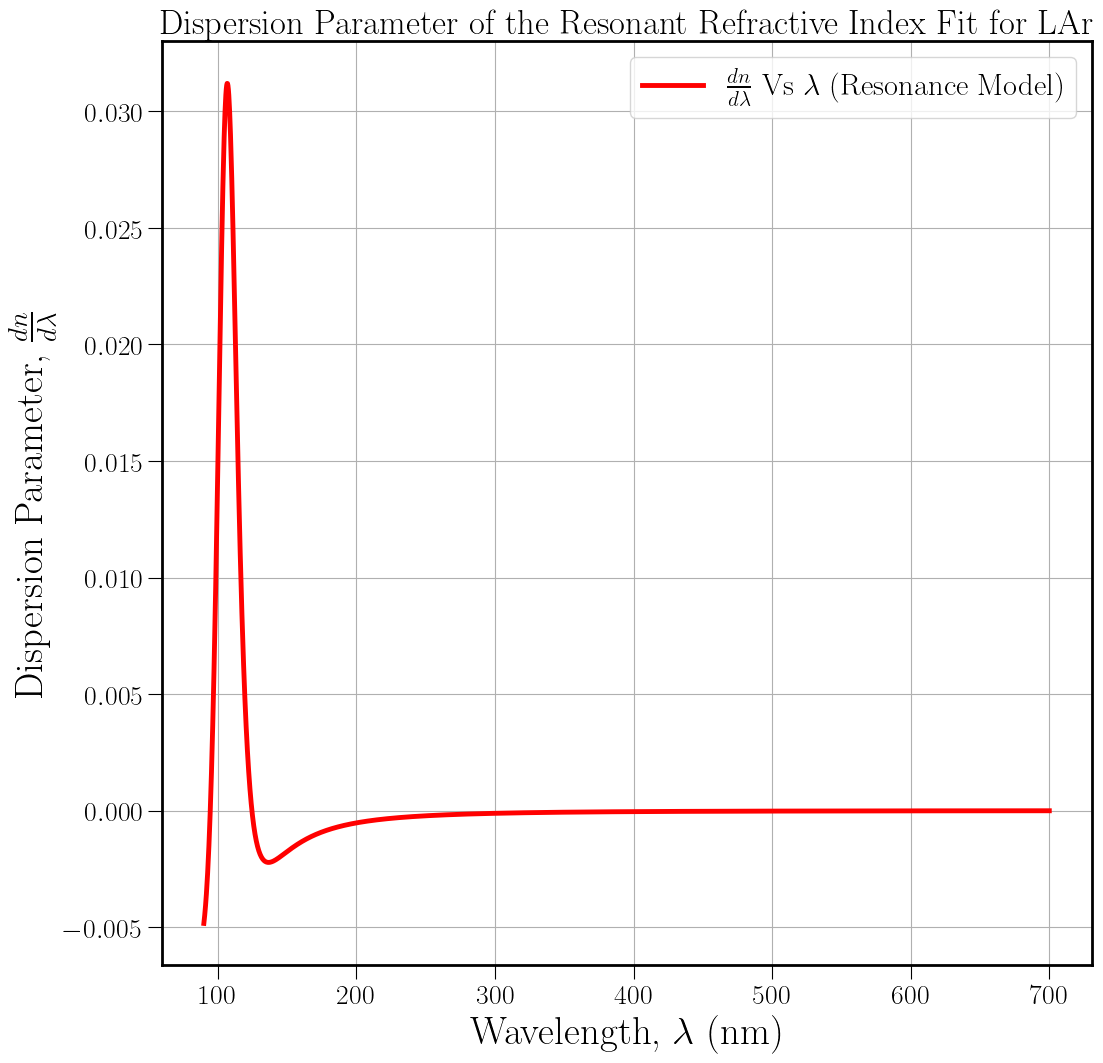

In [649]:
# plt.plot(lamd,d_fun(lamd))


t = 383.962 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 
lamd = np.linspace(90,700,2000)

# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
# a_0 = 1.18416
# a_pvs = 0.000325985
# gamma = 0.000693652

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Dispersion Parameter of the Resonant Refractive Index Fit for LAr", fontsize=25)
ax.plot(lamd, d_fun(lamd), linewidth = 3.5, c = 'r', label="$\\frac{dn}{d\\lambda}$ Vs $\\lambda$ (Resonance Model)")
# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta $ (383.96 MeV)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Wavelength, $\\lambda$ (nm)",fontsize=28)
ax.set_ylabel('Dispersion Parameter, $\\frac{dn}{d\\lambda}$',fontsize=28)
ax.grid()
ax.legend(fontsize=22)

# lamdmin = 106.6 #UV-Resonant wavelength in nm 
# lamdmax = np.sqrt((a_0 - beta**(-2))/((a_0 - beta**(-2) + a_uv))) * lamd_uv
# plt.axvline(lamdmax, ls='--',c='r',lw=3) #lamdmax
# plt.axvline(lamdmin, ls='--',c='r',lw=3) #lamdmin


# print("K.E(T) = {} MeV, beta = {:.2f}, wavelength_min = {} nm,  wavelength_max = {:.1f} nm, n = {:.2f}".format(t,beta,lamdmin,lamdmax,n_pvs[index]))
# print("wavelength = {:.1f} nm, n^2 = {}".format(wavelength,n2_babics[index]))

# plt.ylim([1.15, 1.75])
# plt.xlim([90,106])

# plt.savefig("derivative_n_jackson_vs_lambda.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

# beta

# Betalist, WS, and Cherekov Yield

In [4]:
#Betalist

rho = 1.38 #density of LAr in kg/m^3 at 89K temperature  
me = 9.11e-31 #Electron's mass in Kg.
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.307  #Constant in MeV.cm^2/g 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = 1 #charge of the particle 
c = 3e8
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)
mp = 938 #Proton's mass in MeV/c^2 
k1 = k*rho*zb*zs**2/a
k2 = 2*e/io 

# lamd = np.linspace(100,200,925)   #wavelength of light 

#Defining a function to calculate the betalist for some given initial K.E of Proton in LAr

def make_betalist(t):
    ''' t = t_list input from data'''
    
    
    xlist = []
    tlist = [] 
    tslope = []
    betalist = []

    
    x = 0 #in cm 
    dx = 0.1 #in cm 
    
    
    while t>0: 
        
        beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
        t_slope = (((k1*np.log(k2*(beta**2/(1-beta**2))))/beta**2) - k1)
        t = t - (t_slope * dx)
        tslope.append(t_slope)
        tlist.append(t)
        betalist.append(beta)

        x=x+dx    
        xlist.append(x)
    
         
    #Linear Interpolation: 

    if (len(tlist)>1)  and (len(xlist)>1):
    
        tnp1 = tlist[-1]
        tnp2 = tlist[-2]
        xnp1 = xlist[-1]
        xnp2 = xlist[-2]
        
        range = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Relativistic approach 

#         print("K.E: {} MeV, Range (Rel approach): {:.3f} cm, betalist: {}".format(tlist,range,betalist, sep='\n')
#         print((tlist1,tslope1) , (tlist2, tslope2))
               
        return betalist  #range
#         return betalist

# t = np.array([1,10,20,50,100,200,250,300,400,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV
# print(t, range, betalist, sep='\n')
beta_500 = make_betalist(500)
# np.shape(beta_500), np.shape(n_pvs)
# beta_500
# beta_20 = make_betalist(20)

In [6]:
from sympy import *

t = 600 #K.E of Proton  in MeV
# t = 445
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
z = 1/beta
print("beta = {}, 1/beta= {}".format(beta,z))


a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


x, y = symbols('x y')

# n_jackson = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# func = n_jackson - (1/beta)

y = a_0j + (a_j * ((lamd_uv**(-2) - x**(-2)) / ((lamd_uv**(-2) - x**(-2))**2 + gamma_j**2 * x**(-2)))) - z  #HO Model: Resonance

wls = solve(y)

print("Wavelength Solutions = {} nm".format(wls))


beta = 0.7924914946784183, 1/beta= 1.2618431954349059
Wavelength Solutions = [-203.830070637462, 203.830070637462] nm


In [7]:
from sympy import *

x, y = symbols('x y') 

y=(x**2-2)/3*x

# solve the expression y (by default set equal to 0)
result = solve(y)

print(result)

[0, -sqrt(2), sqrt(2)]


n_uvr = 1.102, n_500 = 1.2278
Numerical Method: Wavelength_min = 115.6328164082041 nm, Wavelength_max = 147.06353176588294 nm


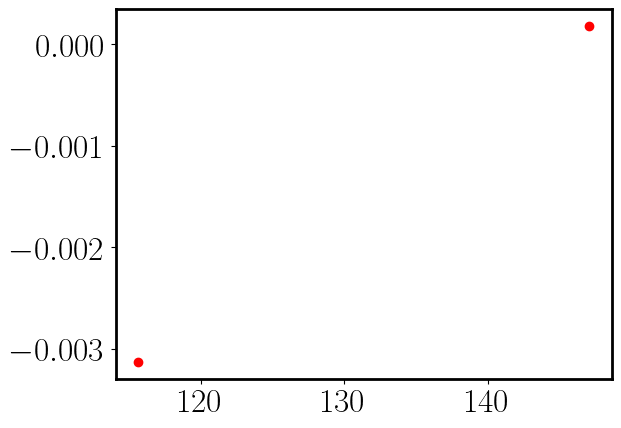

Wavelength_min = 115.6328164082041 nm, Wavelength_max = 147.06353176588294 nm
10.0 0.14486467848188067 124.68 124.68
100.0 0.4282487624449493 124.68 124.68
150.0 0.5066831416300631 124.68 124.68
200.0 0.5662215709520919 124.68 124.68
250.0 0.6136704253108138 124.68 124.68
300.0 0.6526335986017499 124.68 124.68
383.96 0.7046525912295857 124.68 124.68
400.0 0.7131157214873879 124.68 124.68
450.0 0.7370919123190173 121.1255627813907 129.05952976488243
500.0 0.7579653181328908 115.6328164082041 147.06353176588294
550.0 0.7762896784169824 113.49674837418709 168.42421210605303
600.0 0.7924914946784183 112.27613806903452 204.12706353176588
650.0 0.806905830051608 111.36068034017009 293.23161580790395
697.678 0.8192318094656588 110.44522261130565 500
700.0 0.8198002603953367 110.44522261130565 500
750.0 0.831391443029346 109.83491745872936 500
800.0 0.8418569002610763 109.22461230615308 500
850.0 0.8513435972356456 108.91945972986494 500
900.0 0.8599743115768982 108.61430715357679 500
950.0 0.

(array([  10.   ,  100.   ,  150.   ,  200.   ,  250.   ,  300.   ,
         383.96 ,  400.   ,  450.   ,  500.   ,  550.   ,  600.   ,
         650.   ,  697.678,  700.   ,  750.   ,  800.   ,  850.   ,
         900.   ,  950.   , 1000.   , 1050.   , 1100.   , 1200.   ,
        1300.   , 1400.   , 1500.   , 1600.   , 2000.   , 2500.   ,
        3000.   ]),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.8757509912383903,
  31.64549460678436,
  80.10655627905936,
  139.99553214819292,
  211.64027226824362,
  294.82047113507656,
  298.8968867889818,
  380.33287936928093,
  451.4942588205939,
  514.2439266076714,
  569.8305617262337,
  619.3001607561889,
  663.7123206708817,
  703.6892491461556,
  739.9608971729218,
  802.699517171638,
  855.2305922307048,
  899.4406049332285,
  937.0614971514253,
  969.3849184639879,
  1062.3329753356147,
  1131.1059208559873,
  1173.2677105320806])

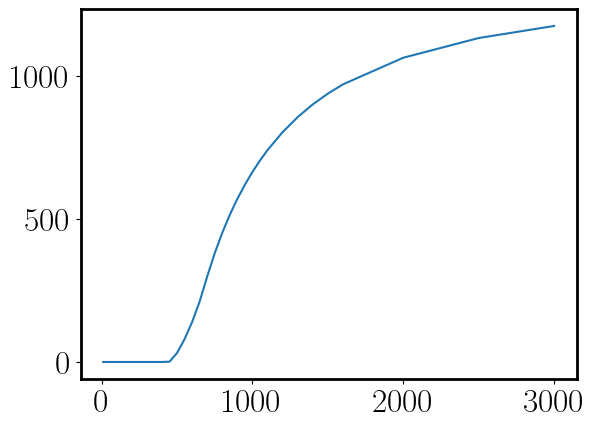

In [584]:
#Instantaneous Yield (Resonance Model fit)

# t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

t = 500 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd = np.linspace(90,700,2000)   #wavelength of light 

lamd_uv = 106.67 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak

n_asymtoter = a_0j + a_j * lamd_uv**2
n_500 = 1.2278
n_uvr = 1.102
print("n_uvr = {}, n_500 = {}".format(n_uvr, n_500))


# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))



#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


funclamd = n_jacksonr - y

idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

plt.plot(lamd[idx], funclamd[idx], 'ro')
plt.show()
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

n_jackson = lambda lamd: a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

func = lambda lamd,b: ((2 * np.pi * alpha) / (lamd**2 )) * (1- (1/(b**2 * n_jackson(lamd)*n_jackson(lamd))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# t= np.array([400,500,700])
# t = np.array([450,500,550,600]) # ,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600,2000,2500,3000]) #initial  K.E of the proton in MeV 600,700,800,900,1000


cerenkovfinallist = []
cerenkovtsum500inst = []

lamdmin = []
lamdmax = []

for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
        
    i  = np.sqrt(1 - (1/(1 + j/mp)**2)) #Relativistic Approach 

    y= 1/i
    y = np.linspace(y,y,2000)   #wavelength of light 
    n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
    funclamd = n_jacksonr - y
    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
        # print(lamd[idx])
    
    if 1/i > n_peakr:
        lmin = lamd_peakr
        lmax = lamd_peakr
            
    if n_500 < 1/i < n_peakr:   
        lmin = lamd[min(idx)]
        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
    if n_uvr < 1/i <= n_500:
        lmin = max(lamd[min(idx)], 106.67)
        lmax = 500
            
    print(j, i, lmin, lmax)
        
    no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(no_cerenkov_x[0])
    cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err    
    cerenkovsum = np.nansum(no_cerenkov_x[0])  *  1e7 
    
    lamdmin.append(lmin)
    lamdmax.append(lmax)
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsum500inst.append(cerenkovsum) #conversion factor to standard units
    
    
# ax.grid()

# plt.plot(t, lamdmin)
# plt.plot(t, lamdmax)

list3 = list(map(list, list(zip(t, cerenkovtsum500inst))))
print(list3)

plt.plot(t, cerenkovtsum500inst)
t, cerenkovtsum500inst

    
# no_cerenkov_x
# n2_grace(100)
# make_betalist(500), 

# plt.plot(cerenkovnolist)
# cerenkovsum * 1e6
# lamdmax



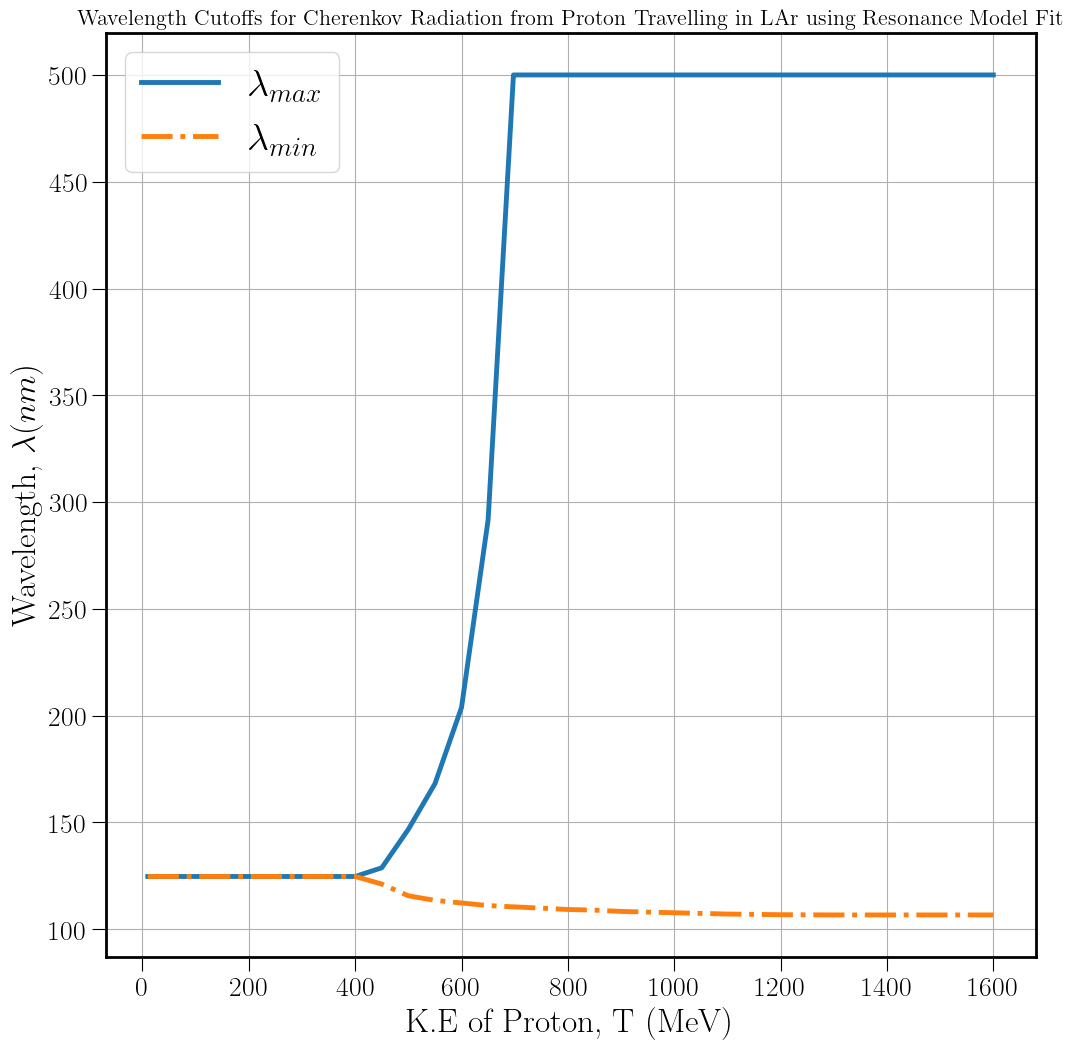

In [146]:
#Plot of Cerenkov photons emitted by Proton in the LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Wavelength Cutoffs for Cherenkov Radiation from Proton Travelling in LAr using Resonance Model Fit", fontsize=16)

ax.plot(t, lamdmax, linewidth = 3.5, label= '$\\lambda_{max}$')
ax.plot(t, lamdmin, ls= 'dashdot', linewidth = 3.5, label= '$\\lambda_{min}$')

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("K.E of Proton, T (MeV)",fontsize=24)
ax.set_ylabel('Wavelength, $\\lambda (nm)$',fontsize=24)
ax.grid()
ax.legend(fontsize=28)
# plt.xlim(350,1600)
# plt.ylim(0,15000)
plt.savefig("lminlmax_resfit.jpg", bbox_inches="tight")

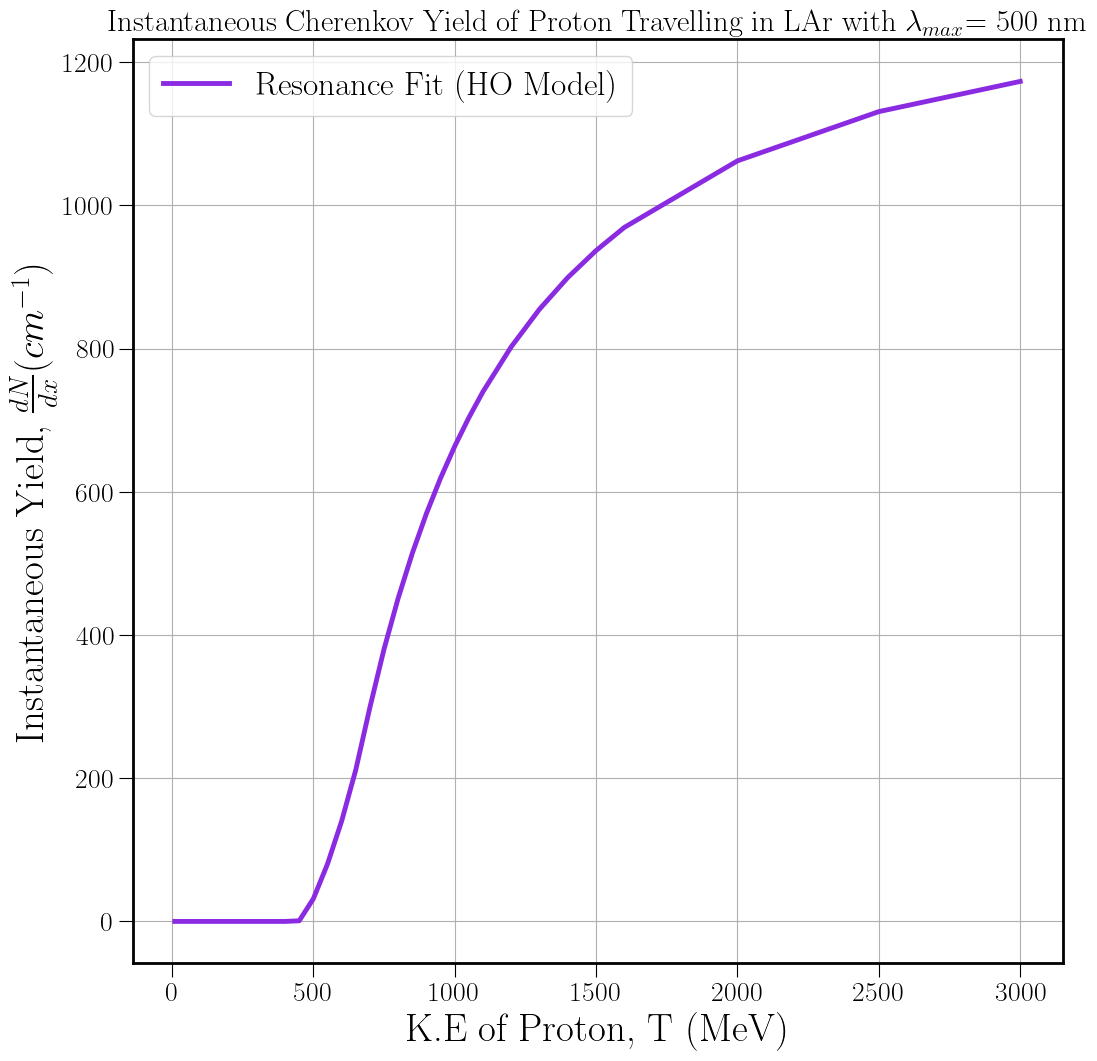

In [585]:
#Plot of Instantaneous Cerenkov photons emitted by Proton in the LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Instantaneous Cherenkov Yield of Proton Travelling in LAr with $\lambda_{max}$= 500 nm", fontsize=22)
# ax.plot(t, cerenkovtsum, linewidth = 3.5,  color='g', label="Absorptive Fit Only")
ax.plot(t, cerenkovtsum500inst, linewidth = 3.5, color='blueviolet', label="Resonance Fit (HO Model)") #linestyle= 'dashdot', 
# ax.plot(t, cerenkovtsumpvs500inst, linewidth = 3.5, color='blueviolet', label="Resonance Model Fit") #linestyle= 'dashdot', 

ax.tick_params(axis='both',which='major',labelsize=20,length=10)


ax.set_xlabel("K.E of Proton, T (MeV)",fontsize=28)
ax.set_ylabel('Instantaneous Yield, $\\frac{dN}{dx} (cm^{-1})$',fontsize=28)

ax.grid()

ax.legend(fontsize=24)
# plt.xlim(383,500)
# plt.ylim(0,1000)
# plt.savefig("total_cherenkov_photons_absorptivefit.jpg", bbox_inches="tight")
# plt.savefig("total_cherenkov_photons_reabsorptivefit_lamdmax_500nm.jpg", bbox_inches="tight")
plt.savefig("instantaneous_yield_resfit_lamdmax_500nm.jpg", bbox_inches="tight")


n_uvr = 1.102, n_500 = 1.2278
n_asymtote = 1.222558964716
cos_ang_min= 0.969732876547658
Numerical Method: Wavelength_min = 115.6328164082041 nm, Wavelength_max = 146.7583791895948 nm


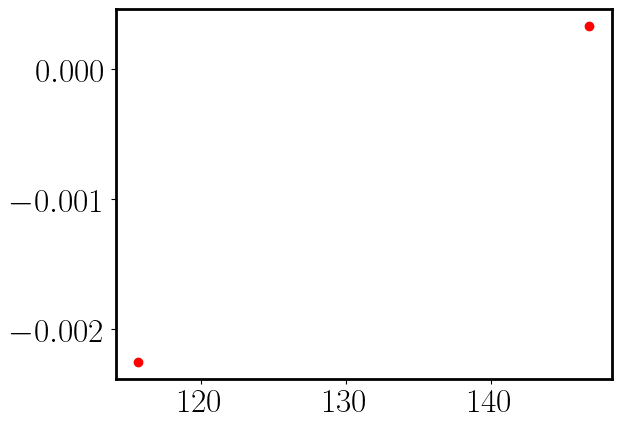

Wavelength_min = 115.6328164082041 nm, Wavelength_max = 146.7583791895948 nm
[[10.0, 0.0], [100.0, 0.0], [150.0, 0.0], [200.0, 0.0], [250.0, 0.0], [300.0, 0.0], [383.96, 0.0], [400.0, 0.0], [450.0, 0.4558894845305867], [500.0, 200.83352476612558], [550.0, 1011.0340285042058], [600.0, 2681.8937246790847], [650.0, 5438.676125876847], [697.678, 8694.050026052966], [700.0, 8920.475578890626], [750.0, 14570.228152899484], [800.0, 21625.198647407193], [850.0, 29960.29785805287], [900.0, 39459.720725810184], [950.0, 50023.85578501672], [1000.0, 61559.784633018535], [1050.0, 73988.77171366503], [1100.0, 87235.31132965276], [1200.0, 115926.9045396841], [1300.0, 147179.02983069603], [1400.0, 180610.87052862605], [1500.0, 215906.80405325387], [1600.0, 252802.36934305323]]


(array([  10.   ,  100.   ,  150.   ,  200.   ,  250.   ,  300.   ,
         383.96 ,  400.   ,  450.   ,  500.   ,  550.   ,  600.   ,
         650.   ,  697.678,  700.   ,  750.   ,  800.   ,  850.   ,
         900.   ,  950.   , 1000.   , 1050.   , 1100.   , 1200.   ,
        1300.   , 1400.   , 1500.   , 1600.   ]),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4558894845305867,
  200.83352476612558,
  1011.0340285042058,
  2681.8937246790847,
  5438.676125876847,
  8694.050026052966,
  8920.475578890626,
  14570.228152899484,
  21625.198647407193,
  29960.29785805287,
  39459.720725810184,
  50023.85578501672,
  61559.784633018535,
  73988.77171366503,
  87235.31132965276,
  115926.9045396841,
  147179.02983069603,
  180610.87052862605,
  215906.80405325387,
  252802.36934305323])

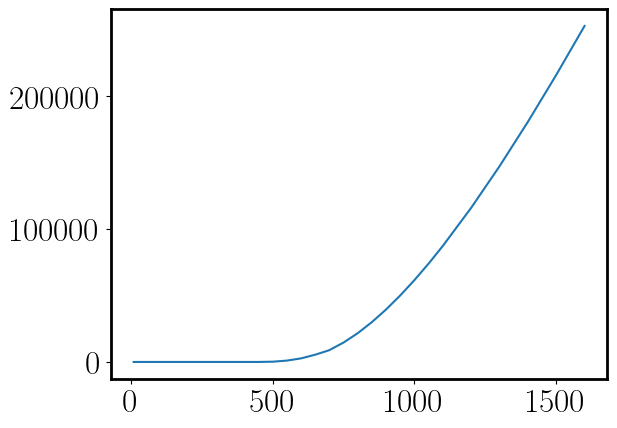

In [15]:
#Calculating the total Cerenkov yield (resonance Model Fit)

# t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

t = 500 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


# n_asymtoter = a_0j + a_j * lamd_uv**2
n_500 = 1.2278
n_uvr = 1.102
print("n_uvr = {}, n_500 = {}".format(n_uvr, n_500))


n_asymtoter = a_0j + a_j * lamd_uv**2
print("n_asymtote = {}".format(n_asymtoter))

cos_ang_min = 1/(beta * n_peakr)
print("cos_ang_min= {}".format(cos_ang_min))



# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))



#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


funclamd = n_jacksonr - y

idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

plt.plot(lamd[idx], funclamd[idx], 'ro')
plt.show()
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

n_jackson = lambda lamd: a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

func = lambda lamd,b: ((2 * np.pi * alpha) / (lamd**2 )) * (1- (1/(b**2 * n_jackson(lamd)*n_jackson(lamd))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# t = np.array([450,500,550,600]) # ,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

cerenkovfinallist = []
cerenkovtsum500asm = []
for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j)
#     print(make_betalist(j))
    mybetalist = make_betalist(j)
    filtered_lst_res = [x for x in mybetalist if x > 0.735]
    # print(filtered_lst_res)
    for i in filtered_lst_res:  #[0:20]
        y= 1/i
        y = np.linspace(y,y,2000)   #wavelength of light 
        n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
        funclamd = n_jacksonr - y
        idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
        # print(lamd[idx])
        
        
        if 1/i > n_peakr:
            lmin = lamd_peakr
            lmax = lamd_peakr
            
        if n_asymtoter < 1/i < n_peakr:   
            lmin = lamd[min(idx)]
            lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
        if 1/i <= n_asymtoter:
            lmin = max(lamd[min(idx)], 106.67)
            lmax = 500            
    
        # print(j, i, lmin, lmax)
        
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(no_cerenkov_x[0])
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0]
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsum500asm.append(cerenkovsum * 1e6) #conversion factor to standard units
    
    
ax.grid()

list3 = list(map(list, list(zip(t, cerenkovtsum500asm))))
print(list3)


plt.plot(t, cerenkovtsum500asm)
t, cerenkovtsum500asm
    
# no_cerenkov_x
# n2_grace(100)
# make_betalist(500), 

# plt.plot(cerenkovnolist)
# cerenkovsum * 1e6
# lamdmax


n_uvr = 1.102, n_500 = 1.2278
n_asymtote = 1.222558964716
cos_ang_min= 0.969732876547658
Numerical Method: Wavelength_min = 115.80590295147574 nm, Wavelength_max = 146.70935467733867 nm


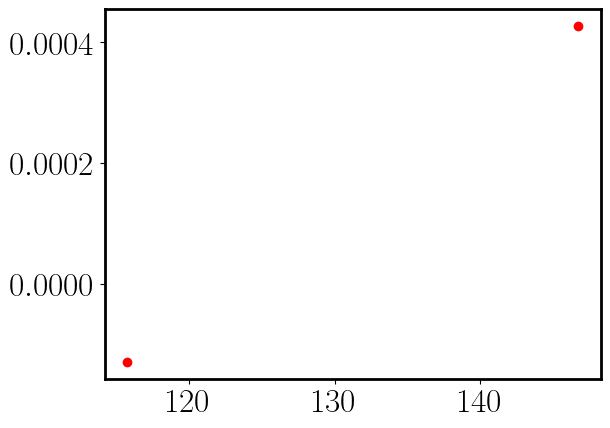

Wavelength_min = 115.80590295147574 nm, Wavelength_max = 146.70935467733867 nm
[[400, 0.0], [450, 0.45511712630108264], [460, 7.646427565613002], [470, 27.782046110036244], [480, 64.72299120699765], [490, 121.5310384460573], [500, 200.84326206442336]]


(array([400, 450, 460, 470, 480, 490, 500]),
 [0.0,
  0.45511712630108264,
  7.646427565613002,
  27.782046110036244,
  64.72299120699765,
  121.5310384460573,
  200.84326206442336])

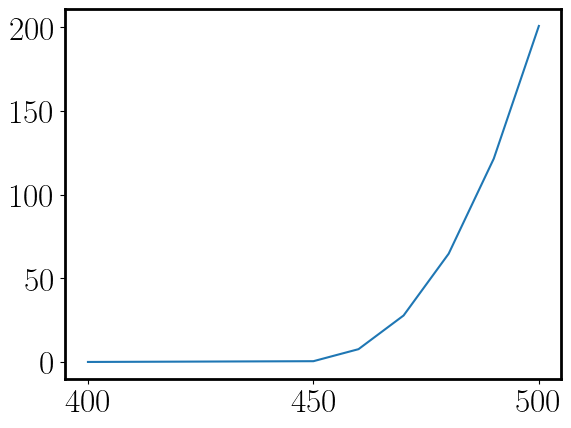

In [166]:
#Calculating the total Cerenkov yield (resonance Model Fit)

# t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# t = np.array([500]) #K.E of Proton  in MeV
t = 500
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd = np.linspace(106,700,2000)

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


# n_asymtoter = a_0j + a_j * lamd_uv**2
n_500 = 1.2278
n_uvr = 1.102
print("n_uvr = {}, n_500 = {}".format(n_uvr, n_500))


n_asymtoter = a_0j + a_j * lamd_uv**2
print("n_asymtote = {}".format(n_asymtoter))

cos_ang_min = 1/(beta * n_peakr)
print("cos_ang_min= {}".format(cos_ang_min))



# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))



#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


funclamd = n_jacksonr - y

idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

plt.plot(lamd[idx], funclamd[idx], 'ro')
plt.show()
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

n_jackson = lambda lamd: a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

func = lambda lamd,b: ((2 * np.pi * alpha) / (lamd**2 )) * (1- (1/(b**2 * n_jackson(lamd)*n_jackson(lamd))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# t = np.array([450,500,550,600]) # ,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([400,450,460,470,480,490,500]) #,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

cerenkovfinallist = []
cerenkovtsum500s = []
for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j)
#     print(make_betalist(j))
    mybetalist = make_betalist(j)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    for i in filtered_lst_res:  #[0:20]
        y= 1/i
        y = np.linspace(y,y,2000)   #wavelength of light 
        n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
        funclamd = n_jacksonr - y
        idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
        # print(lamd[idx])
        
        # if 1/i >= n_peakr:
        #     lmin = lamd_peakr
        #     lmax = lamd_peakr
            
        if n_500 < 1/i < n_peakr:   
            lmin = lamd[min(idx)]
            lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
        if n_uvr < 1/i <= n_500:
            lmin = max(lamd[min(idx)], 106.67)
            lmax = 500
            
        # if  1/i <= n_uvr:
        #     lmin = 106.67
        #     lmax = 500
    
        # print(j, i, lmin, lmax)
        
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(no_cerenkov_x[0])
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0]
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsum500s.append(cerenkovsum * 1e6) #conversion factor to standard units
    
    
ax.grid()

list3 = list(map(list, list(zip(t, cerenkovtsum500s))))
print(list3)


plt.plot(t, cerenkovtsum500s)
t, cerenkovtsum500s   #:.2f = 2 decimal places
    
# no_cerenkov_x
# n2_grace(100)
# make_betalist(500), 

# plt.plot(cerenkovnolist)
# cerenkovsum * 1e6
# lamdmax

n_uvr = 1.102, n_500 = 1.2278
n_asymtote = 1.222558964716
cos_ang_min= 0.969732876547658
Numerical Method: Wavelength_min = 115.80590295147574 nm, Wavelength_max = 146.70935467733867 nm


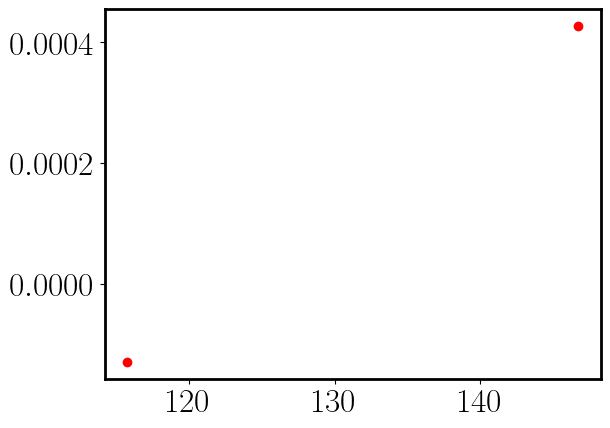

Wavelength_min = 115.80590295147574 nm, Wavelength_max = 146.70935467733867 nm
[[10.0, 0.0], [100.0, 0.0], [150.0, 0.0], [200.0, 0.0], [250.0, 0.0], [300.0, 0.0], [383.96, 0.0], [400.0, 0.0], [450.0, 0.45511712630108264], [500.0, 200.84326206442336], [550.0, 1011.0505052979913], [600.0, 2681.908354090805], [650.0, 5438.725878549042], [697.678, 9335.635908892826], [700.0, 9561.572746182997], [750.0, 15211.362518746628], [800.0, 22266.860843621893], [850.0, 30601.265118152893], [900.0, 40100.843015089195], [950.0, 50664.54131920603], [1000.0, 62201.43088341228], [1050.0, 74630.02964270659], [1100.0, 87876.99626742859], [1200.0, 116568.43171145365], [1300.0, 147819.82613932862], [1400.0, 181252.62329695717], [1500.0, 216548.68431879632], [1600.0, 253443.99984945654], [2000.0, 413095.5590486388], [2500.0, 630183.3589726503], [3000.0, 857935.8761637792]]


(array([  10.   ,  100.   ,  150.   ,  200.   ,  250.   ,  300.   ,
         383.96 ,  400.   ,  450.   ,  500.   ,  550.   ,  600.   ,
         650.   ,  697.678,  700.   ,  750.   ,  800.   ,  850.   ,
         900.   ,  950.   , 1000.   , 1050.   , 1100.   , 1200.   ,
        1300.   , 1400.   , 1500.   , 1600.   , 2000.   , 2500.   ,
        3000.   ]),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.45511712630108264,
  200.84326206442336,
  1011.0505052979913,
  2681.908354090805,
  5438.725878549042,
  9335.635908892826,
  9561.572746182997,
  15211.362518746628,
  22266.860843621893,
  30601.265118152893,
  40100.843015089195,
  50664.54131920603,
  62201.43088341228,
  74630.02964270659,
  87876.99626742859,
  116568.43171145365,
  147819.82613932862,
  181252.62329695717,
  216548.68431879632,
  253443.99984945654,
  413095.5590486388,
  630183.3589726503,
  857935.8761637792])

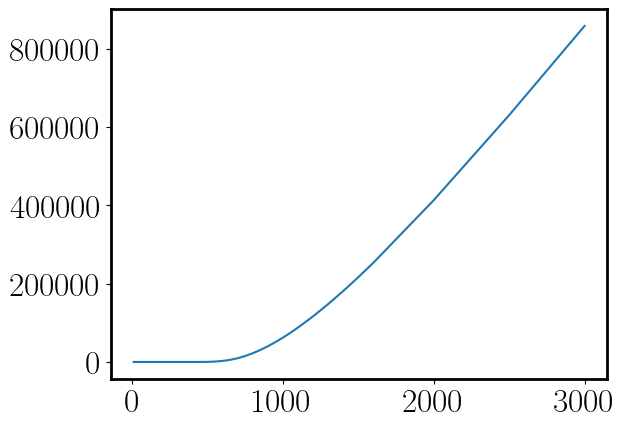

In [638]:
#Calculating the total Cerenkov yield (resonance Model Fit)

# t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# t = np.array([500]) #K.E of Proton  in MeV
t = 500
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta
y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd = np.linspace(106,700,2000)

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


# n_asymtoter = a_0j + a_j * lamd_uv**2
n_500 = 1.2278
n_uvr = 1.102
print("n_uvr = {}, n_500 = {}".format(n_uvr, n_500))


n_asymtoter = a_0j + a_j * lamd_uv**2
print("n_asymtote = {}".format(n_asymtoter))

cos_ang_min = 1/(beta * n_peakr)
print("cos_ang_min= {}".format(cos_ang_min))



# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))



#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


funclamd = n_jacksonr - y

idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

plt.plot(lamd[idx], funclamd[idx], 'ro')
plt.show()
print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

n_jackson = lambda lamd: a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

func = lambda lamd,b: ((2 * np.pi * alpha) / (lamd**2 )) * (1- (1/(b**2 * n_jackson(lamd)*n_jackson(lamd))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# t = np.array([450,500,550,600]) # ,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600,2000,2500,3000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

cerenkovfinallist = []
cerenkovtsum500 = []
for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j)
#     print(make_betalist(j))
    mybetalist = make_betalist(j)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    for i in filtered_lst_res:  #[0:20]
        y= 1/i
        y = np.linspace(y,y,2000)   #wavelength of light 
        n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
        funclamd = n_jacksonr - y
        idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
        # print(lamd[idx])
        
        # if 1/i >= n_peakr:
        #     lmin = lamd_peakr
        #     lmax = lamd_peakr
            
        if n_500 < 1/i < n_peakr:   
            lmin = lamd[min(idx)]
            lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
        if n_uvr < 1/i <= n_500:
            lmin = max(lamd[min(idx)], 106.67)
            lmax = 500
            
        if  1/i <= n_uvr:
            lmin = 106.67
            lmax = 500
    
        # print(j, i, lmin, lmax)
        
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(no_cerenkov_x[0])
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0]
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsum500.append(cerenkovsum * 1e6) #conversion factor to standard units
    
    
ax.grid()

list3 = list(map(list, list(zip(t, cerenkovtsum500))))
print(list3)


plt.plot(t, cerenkovtsum500)
t, cerenkovtsum500   #:.2f = 2 decimal places
    
# no_cerenkov_x
# n2_grace(100)
# make_betalist(500), 

# plt.plot(cerenkovnolist)
# cerenkovsum * 1e6
# lamdmax

n_uvr = 1.102, n_500 = 1.2278
n_asymtote = 1.222558964716
cos_ang_min= 0.969732876547658
[[10.0, 0.0], [100.0, 0.0], [150.0, 0.0], [200.0, 0.0], [250.0, 0.0], [300.0, 0.0], [383.96, 0.0], [400.0, 0.0], [450.0, 0.4558894845305867], [500.0, 200.83352476612558], [550.0, 1011.0340285042058], [600.0, 2681.8937246790847], [650.0, 5438.676125876847], [697.678, 9335.569108912588], [700.0, 9561.51131977113], [750.0, 15211.268994533999], [800.0, 22266.746703809637], [850.0, 30601.12751211887], [900.0, 40100.72108849113], [950.0, 50664.31307523232], [1000.0, 62201.18142701962], [1050.0, 74629.78429840952], [1100.0, 87876.90078761097], [1200.0, 116567.83579526386], [1300.0, 145940.93176141632], [1400.0, 145919.82526587846], [1500.0, 145928.78070510994], [1600.0, 145997.5327451657]]


(array([  10.   ,  100.   ,  150.   ,  200.   ,  250.   ,  300.   ,
         383.96 ,  400.   ,  450.   ,  500.   ,  550.   ,  600.   ,
         650.   ,  697.678,  700.   ,  750.   ,  800.   ,  850.   ,
         900.   ,  950.   , 1000.   , 1050.   , 1100.   , 1200.   ,
        1300.   , 1400.   , 1500.   , 1600.   ]),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4558894845305867,
  200.83352476612558,
  1011.0340285042058,
  2681.8937246790847,
  5438.676125876847,
  9335.569108912588,
  9561.51131977113,
  15211.268994533999,
  22266.746703809637,
  30601.12751211887,
  40100.72108849113,
  50664.31307523232,
  62201.18142701962,
  74629.78429840952,
  87876.90078761097,
  116567.83579526386,
  145940.93176141632,
  145919.82526587846,
  145928.78070510994,
  145997.5327451657])

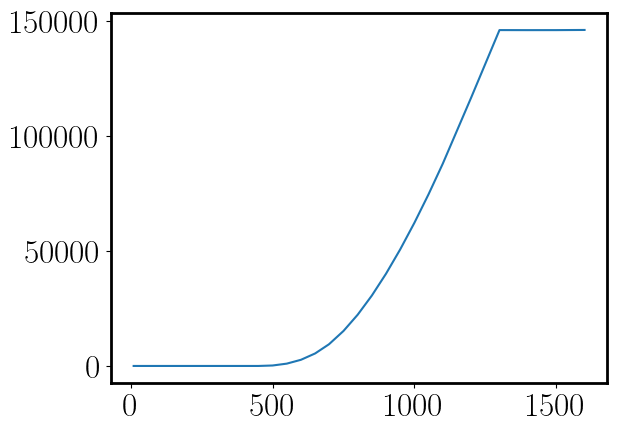

In [29]:
#Calculating the total Cerenkov yield (resonance Model Fit)
#TEST code
# t = 500 #K.E of Proton  in MeV
# t = np.array([10,20,50,100,200,250,300,400,500]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

t = 500 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


# n_asymtoter = a_0j + a_j * lamd_uv**2
n_500 = 1.2278
n_uvr = 1.102
print("n_uvr = {}, n_500 = {}".format(n_uvr, n_500))


n_asymtoter = a_0j + a_j * lamd_uv**2
print("n_asymtote = {}".format(n_asymtoter))

cos_ang_min = 1/(beta * n_peakr)
print("cos_ang_min= {}".format(cos_ang_min))



# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))



#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance


funclamd = n_jacksonr - y

# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
# print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

# plt.plot(lamd[idx], funclamd[idx], 'ro')
# plt.show()
# print("Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

n_jackson = lambda lamd: a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

func = lambda lamd,b: ((2 * np.pi * alpha) / (lamd**2 )) * (1- (1/(b**2 * n_jackson(lamd)*n_jackson(lamd))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# t = np.array([450,500,550,600]) # ,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

cerenkovfinallist = []
cerenkovtsum500r = []
for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j)
#     print(make_betalist(j))
    mybetalist = make_betalist(j)
    # filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    for i in mybetalist:  #[0:20]
        y= 1/i
        y = np.linspace(y,y,2000)   #wavelength of light 
        n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
        funclamd = n_jacksonr - y
        idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
        # print(lamd[idx])
        
        if 1/i >= n_peakr:
            lmin = lamd_peakr
            lmax = lamd_peakr
            
        if n_500 < 1/i < n_peakr:   
            lmin = lamd[min(idx)]
            lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
        if n_uvr < 1/i <= n_500:
            lmin = max(lamd[min(idx)], 106.67)
            lmax = 500
            
        if  1/i <= n_uvr:
            lmin = 106.67
            lmax = 106.67
    
        # print(j, i, lmin, lmax)
        
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(no_cerenkov_x[0])
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0]
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsum500r.append(cerenkovsum * 1e6) #conversion factor to standard units
    
    
ax.grid()

list3 = list(map(list, list(zip(t, cerenkovtsum500r))))
print(list3)


plt.plot(t, cerenkovtsum500r)
t, cerenkovtsum500r   #:.2f = 2 decimal places
    
# no_cerenkov_x
# n2_grace(100)
# make_betalist(500), 

# plt.plot(cerenkovnolist)
# cerenkovsum * 1e6
# lamdmax

In [149]:
t = 500 #K.E of Proton  in MeV
#Plot of n vs lambda in the LAr medium near Resonance 

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
y = 1/beta

cos_ang_min = 1/(beta * n_peakr)
thetamax = np.arccos(cos_ang_min)
thetamax_deg = thetamax*180/np.pi

cos_ang_max = 1 
thetamin = np.arccos(cos_ang_max)

print("cos_ang_min= {}, theta_max= {} degree, theta_min= {} degree".format(cos_ang_min, thetamax_deg, thetamin))



cos_ang_min= 0.969732876547658, theta_max= 14.132686901528965 degree, theta_min= 0.0 degree


C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\784461202.py:16: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\784461202.py:17: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\784461202.py:20: RuntimeWarning: invalid value encountered in sqrt
  lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
C:\U

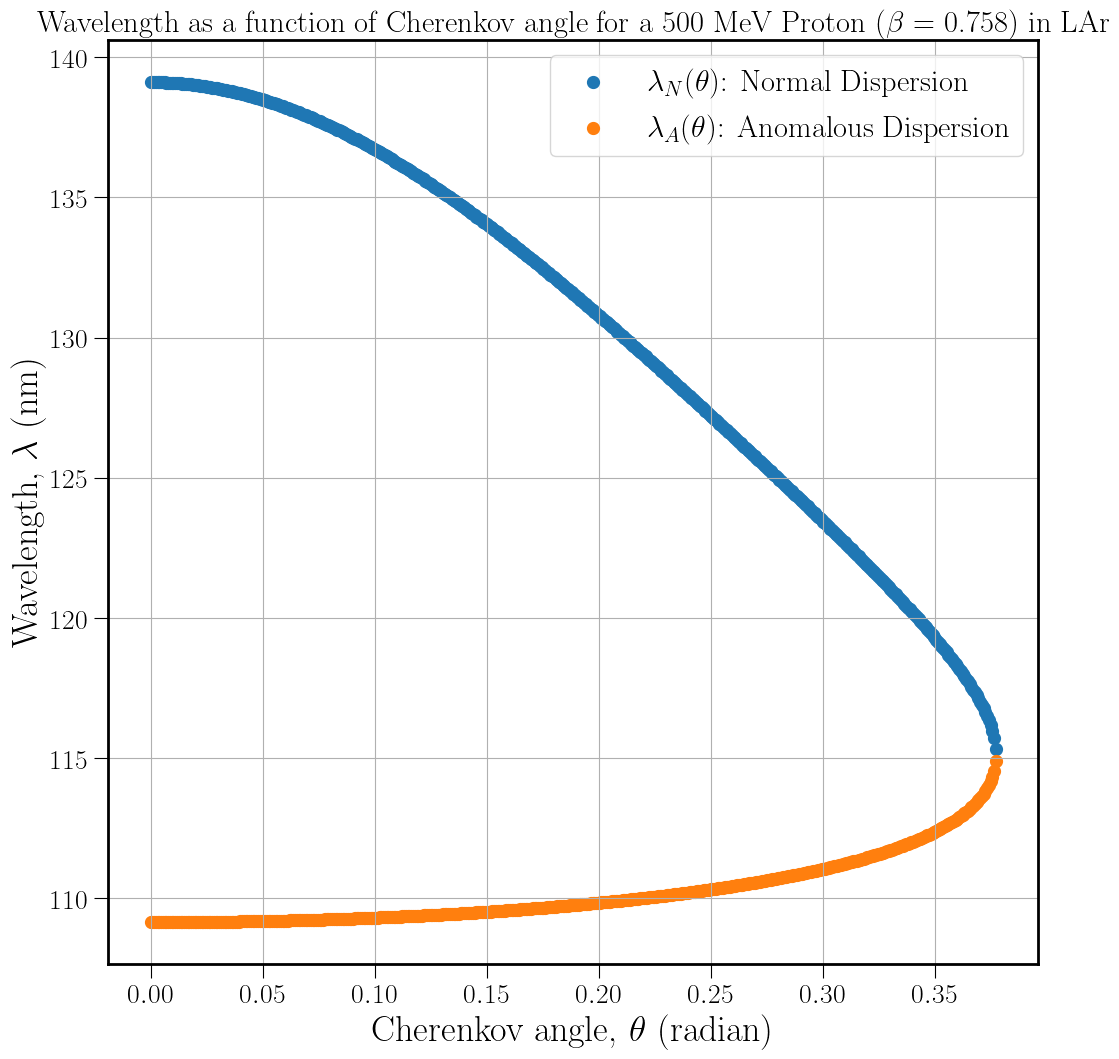

In [150]:
#Angular
#Wavelength Solutions (PVS)

#lambda(theta) when theta changes

# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])
# lamd = np.linspace(0,700,700)
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))


theta = np.linspace(0, np.pi/2, 2000)

b = 0.7579653181328908 #beta for T= 500 MeV

#Wavelength as a function of the angle: lambda(theta)
lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))

#term involving wavelengths: (lamd_uv^-1 - lamd_theta^-1)
lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
lamd_nterm = (((-b*a_pvs*np.cos(theta)) - ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p

func_angp = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_pterm**2)**2/(gamma**2 - lamd_pterm**2))) + ((2*a_0*a_pvs*b) * lamd_pterm * np.abs((gamma**2 + lamd_pterm**2)/(gamma**2 - lamd_pterm**2))) + ((b*a_pvs**2*lamd_pterm**2)/np.abs(gamma**2 - lamd_pterm**2))))
func_angn = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_nterm**2)**2/(gamma**2 - lamd_nterm**2))) + ((2*a_0*a_pvs*b) * lamd_nterm * np.abs((gamma**2 + lamd_nterm**2)/(gamma**2 - lamd_nterm**2))) + ((b*a_pvs**2*lamd_nterm**2)/np.abs(gamma**2 - lamd_nterm**2))))

func_angt = func_angp + func_angn

# print(b, lamd_thetap, lamd_thetan, lamd_pterm, lamd_nterm, func_angp, func_angn, sep='\n')

# print(theta, lamd_thetap) #, lamd_thetan, lamd_pterm, func_angp, func_angn
# print("{}, lamd_thetap= {:.5f}, lamd_thetan = {:.5f}, lamd_pterm  = {}, func_ang= {}".format(b, lamd_thetap, lamd_thetan, lamd_pterm, func_ang))
# lamd_pterm, lamd_nterm
#(0.00021947, 0.00061913), (0.00219235, 0.00077715)

#Plot of lambda vs theta in the LAr medium near Resonance  
theta = np.linspace(0, np.pi/2, 2000)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title("Wavelength as a function of Cherenkov angle for a 500 MeV Proton ($\\beta$ = 0.758) in LAr", fontsize= 22)
ax.scatter(theta, lamd_thetap, linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$: Normal Dispersion")
ax.scatter(theta, lamd_thetan, linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$: Anomalous Dispersion")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Cherenkov angle, $\\theta$ (radian)",fontsize=26)
ax.set_ylabel("Wavelength, $\\lambda$ (nm)",fontsize=26)
ax.grid()
ax.legend(fontsize=22)

# plt.ylim([0,300])
# plt.xlim([0,30])


# plt.savefig("wavelength_solutions_ourfit.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3109229153.py:24: RuntimeWarning: invalid value encountered in sqrt
  lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3109229153.py:25: RuntimeWarning: invalid value encountered in sqrt
  lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3109229153.py:64: RuntimeWarning: invalid value encountered in sqrt
  lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3109229153.py:65: RuntimeWarning: invalid value encountered in sqrt
  lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i 

(array([  10.   ,  100.   ,  150.   ,  200.   ,  250.   ,  300.   ,
         383.96 ,  400.   ,  450.   ,  500.   ,  550.   ,  600.   ,
         650.   ,  697.678,  700.   ,  750.   ,  800.   ,  850.   ,
         900.   ,  950.   , 1000.   , 1050.   , 1100.   , 1200.   ,
        1300.   , 1400.   , 1500.   , 1600.   , 2000.   , 2500.   ,
        3000.   ]),
 array([0.14486468, 0.42824876, 0.50668314, 0.56622157, 0.61367043,
        0.6526336 , 0.70465259, 0.71311572, 0.73709191, 0.75796532,
        0.77628968, 0.79249149, 0.80690583, 0.81923181, 0.81980026,
        0.83139144, 0.8418569 , 0.8513436 , 0.85997431, 0.86785245,
        0.87506571, 0.88168902, 0.88778668, 0.89862002, 0.9079289 ,
        0.91599153, 0.92302433, 0.92919798, 0.94766554, 0.9620614 ,
        0.97121809]),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.931795377574739,
  31.015168466649232,
  69.56733454236348,
  116.95194275721008,
  174.21466730294875,
  245.4118451962153,
  335.1968773053893,
  340.41008

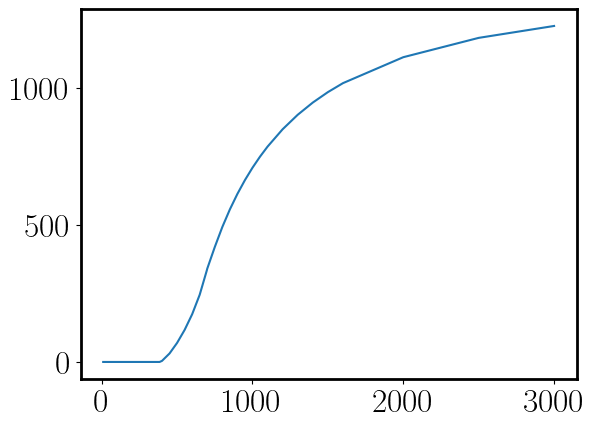

In [583]:
#Instantaneous Yield (lmax= 500) #PVS FIT

# t = 500 #K.E of Proton  in MeV
# t = np.array([385,400,450,500,600,700,800,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600,2000,2500,3000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

scint = 40000*t*0.275
scintback = np.sqrt(scint)

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# print(beta)
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

# print(beta)

cerenkovfinallist = []
cerenkovtsumpvs500inst = []

for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
    
    i  = np.sqrt(1 - (1/(1 + j/mp)**2)) #Relativistic Approach 

         
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
        lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
        lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
    if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
        lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))            
        lmax = 500
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
    no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(j, no_cerenkov_x[0]*1e7)
    cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err    
    cerenkovsum = np.nansum(no_cerenkov_x[0])  *  1e7 
    # print(j, cerenkovsum)
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsumpvs500inst.append(cerenkovsum) #conversion factor to standard units

plt.plot(t, cerenkovtsumpvs500inst)
t, beta, cerenkovtsumpvs500inst
    
# make_betalist(500)

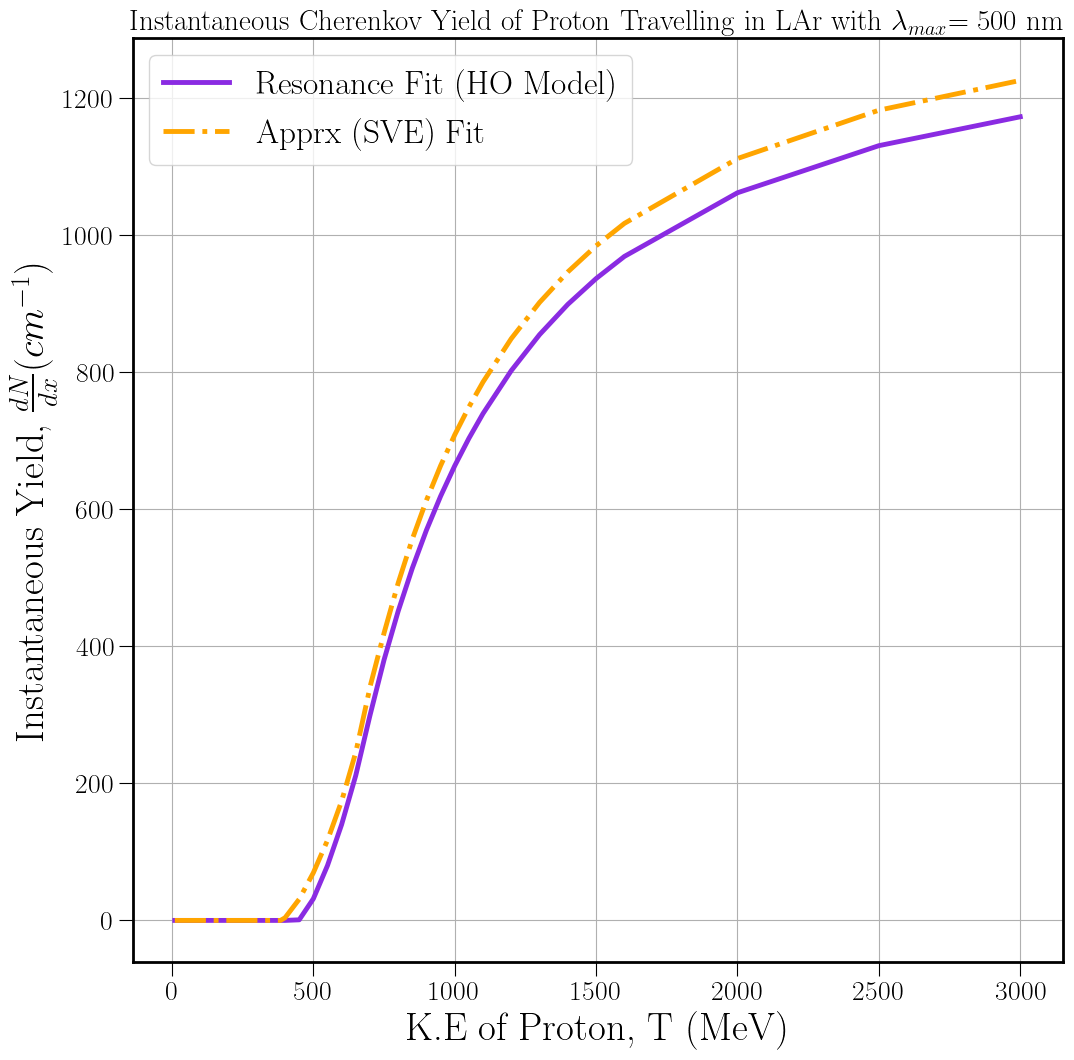

In [586]:
#Plot of Cerenkov photons emitted by Proton in the LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title(r"Instantaneous Cherenkov Yield of Proton Travelling in LAr with $\lambda_{max}$= 500 nm", fontsize=21)

ax.plot(t, cerenkovtsum500inst, linewidth = 3.5, color='blueviolet', label="Resonance Fit (HO Model)") #linestyle= 'dashdot', 
ax.plot(t, cerenkovtsumpvs500inst, ls= 'dashdot', linewidth = 3.5, color='orange', label= 'Apprx (SVE) Fit')

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("K.E of Proton, T (MeV)",fontsize=28)
ax.set_ylabel('Instantaneous Yield, $\\frac{dN}{dx} (cm^{-1})$',fontsize=28)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
plt.savefig("instantaneous_yield_comparison_absorptivefits.jpg", bbox_inches="tight")

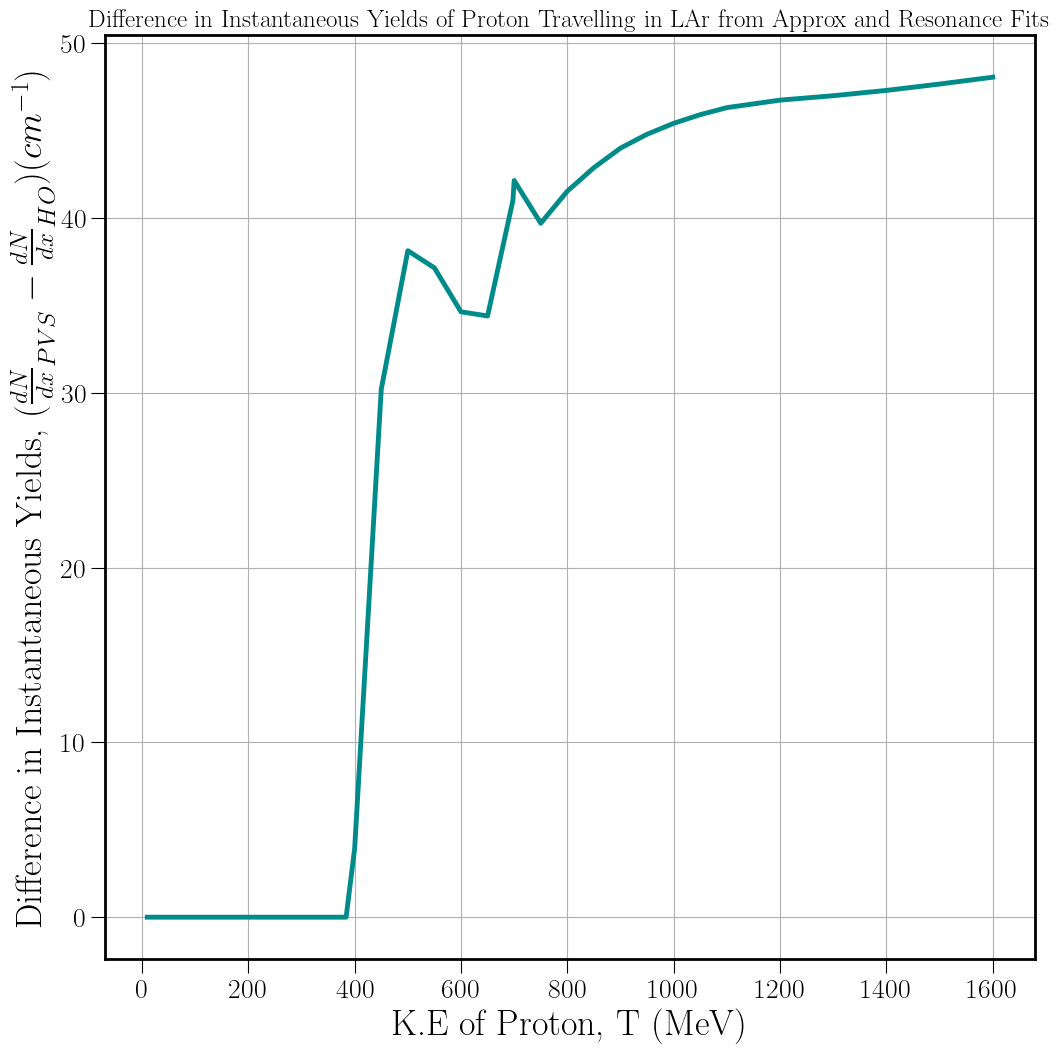

In [153]:

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title(r"Difference in Instantaneous Yields of Proton Travelling in LAr from Approx and Resonance Fits", fontsize=18)
# ax.plot(t, cerenkovtsum, linewidth = 3.5, color='b')
# ax.plot(t, cerenkovtsumpvs, ls='dashdot', linewidth = 3.5, color='orange')

ax.plot(t, np.subtract(cerenkovtsumpvs500inst,cerenkovtsum500inst), linewidth = 3.5, color='darkcyan')

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("K.E of Proton, T (MeV)",fontsize=26)
ax.set_ylabel('Difference in Instantaneous Yields, $(\\frac{dN}{dx}_{PVS} - \\frac{dN}{dx}_{HO}) (cm^{-1})$',fontsize=26)
ax.grid()
# ax.legend(fontsize=18)
# plt.xlim(440,1600)
# plt.ylim(0,5)
# plt.axhline(1,ls='--',c='blue',lw=3)

plt.savefig("difference_instyields_pvsminusres.jpg", bbox_inches="tight")

C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\2472877887.py:22: RuntimeWarning: invalid value encountered in sqrt
  lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\2472877887.py:23: RuntimeWarning: invalid value encountered in sqrt
  lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))


(array([  10.   ,  100.   ,  150.   ,  200.   ,  250.   ,  300.   ,
         383.96 ,  400.   ,  450.   ,  500.   ,  550.   ,  600.   ,
         650.   ,  697.678,  700.   ,  750.   ,  800.   ,  850.   ,
         900.   ,  950.   , 1000.   , 1050.   , 1100.   , 1200.   ,
        1300.   , 1400.   , 1500.   , 1600.   , 2000.   , 2500.   ,
        3000.   ]),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.789321534722043,
  227.76644918880726,
  932.306317713878,
  2302.814102679058,
  4522.40557836276,
  7819.086282652897,
  12276.639414263198,
  12534.30341429221,
  18829.765871542342,
  26574.730524393868,
  35638.09229989612,
  45898.634056565184,
  57251.12746202652,
  69598.82618394228,
  82857.03015762063,
  96949.89146573315,
  127369.62672541555,
  160387.2479383333,
  195615.21331981628,
  232735.42025059654,
  271482.2272436821,
  438780.6813707565,
  665834.5127859005,
  903836.3344228064])

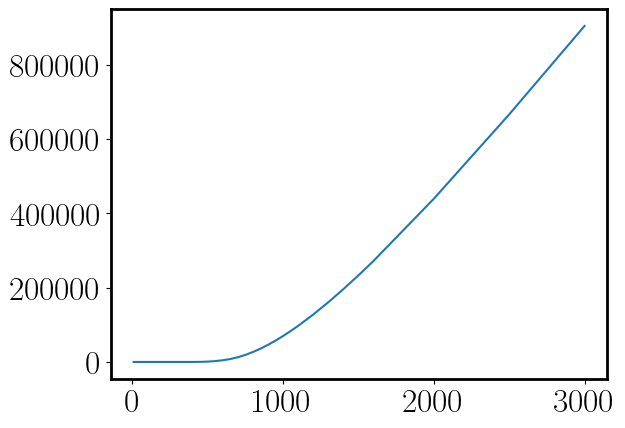

In [635]:
#Calculating the Total Yield (PVS Fit) lmax= 500

# t = 500 #K.E of Proton  in MeV
t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600,2000,2500,3000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600,]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
scint = 40000*t*0.275
scintback = np.sqrt(scint)

mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# print(beta)
#T = 90 K
# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))

#Formula: 
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2


integral = []
alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(100,200,500)   #wavelength of light 

func = lambda wl,b: ((2 * np.pi * alpha) / (wl**2 )) * (1- (1/(b**2 * n_pvs(wl)*n_pvs(wl))))
# funcv = np.vectorize(func)

# print(lamdmin, lamdmax, n2_pvs(120), func(120), beta)

y_list = []

cerenkovnolist = []

# absorption_avg = 0.0675 #in nm^-1
# dx = 0.1*1e7 #cm -> nm 

# print(beta)

cerenkovfinallist = []
cerenkovtsumpvs500 = []

for j in t: 
    cerenkovtlist = []
    cerenkovsum = 0
#     print(j) #OUTPUT
#     print(make_betalist(j))
    mybetalist = make_betalist(j)
    filtered_betalist = [x for x in mybetalist if x > 0.7046534357] 
#     print(j, np.shape(filtered_betalist))
#     myxlist = make_xlist(j)
    
#         print(j, filtered_betalist, filtered_xlist) #OUTPUT filtered_betalist, 

  
    for i in filtered_betalist:  #[0:20]
        
        
#         filtered_xlist = myxlist
#         print(filtered_xlist)

         
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) < 1:
            lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            lmax = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i + np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE
        if (i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) >= 1:
            lmin = (2*lamd_uv*((a_0 * i) - 1))/(2 * ((a_0 * i) - 1) + lamd_uv * (a_pvs * i - np.sqrt((a_pvs * i)**2 - 4 * ((a_0 * i) - 1)**2 * gamma**2)))
            lmax = 500
#             print(lmin, lmax, i* (a_0 + a_pvs*(lamd_uv**-1/(lamd_uv**-2 + gamma**2)))) #OUTPUT FOR WAVELENGTH RANGE 
        no_cerenkov_x = integrate.quad(func, lmin, lmax, args=(i,)) #Integral gives no of Cerenkov photons/nm 
#         print(j, no_cerenkov_x[0]*1e7)
        cerenkovtlist.append(no_cerenkov_x[0]) #indices 0,1 = int,err
        cerenkovsum += no_cerenkov_x[0] 
        
    cerenkovfinallist.append(cerenkovtlist)
    cerenkovtsumpvs500.append(cerenkovsum * 1e6) #conversion factor to standard units
    
# print(t , cerenkovtsumpvs500)    
plt.plot(t, cerenkovtsumpvs500)
# t, beta, cerenkovt1sum500
t , cerenkovtsumpvs500

# make_betalist(500)

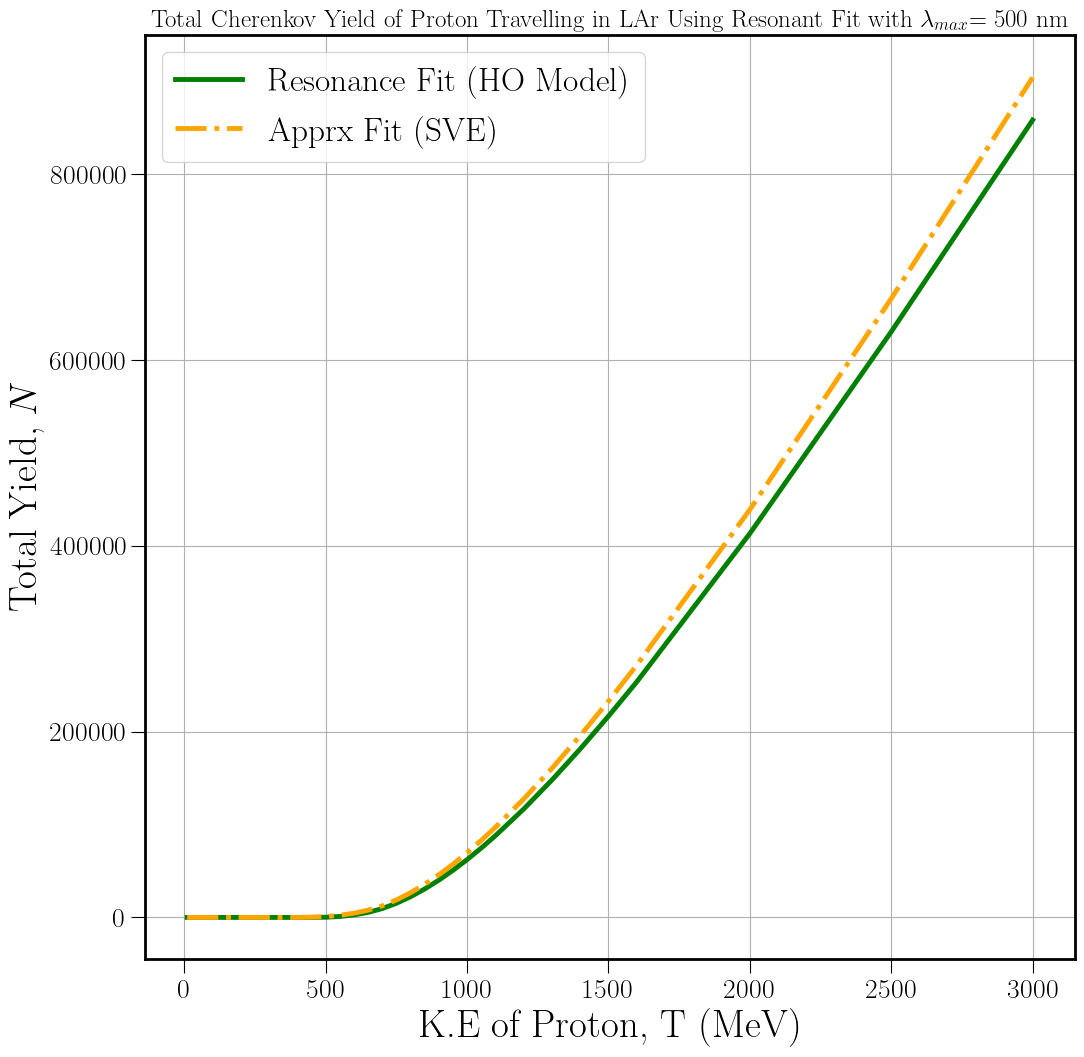

In [640]:
#Plot of Cerenkov photons emitted by Proton in the LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title(r"Total Cherenkov Yield of Proton Travelling in LAr Using Resonant Fit with $\lambda_{max}$= 500 nm", fontsize=18)

ax.plot(t, cerenkovtsum500, linewidth = 3.5, color='g', label="Resonance Fit (HO Model)") #linestyle= 'dashdot', 
# ax.plot(t, cerenkovtsum500r, linewidth = 3.5, color='deepskyblue', label="Resonance Model Fit (n_uv:cut)") #linestyle= 'dashdot', 

ax.plot(t, cerenkovtsumpvs500, ls= 'dashdot', linewidth = 3.5, color='orange', label= 'Apprx Fit (SVE)')

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("K.E of Proton, T (MeV)",fontsize=28)
ax.set_ylabel('Total Yield, $N$ ',fontsize=28)
ax.grid()
ax.legend(fontsize=24)
# plt.xlim(383,1000)
# plt.ylim(0,15000)
# plt.savefig("integrated_yield_resfit_lamdmax_500nm.jpg", bbox_inches="tight")
plt.savefig("total_yield_comparison_absorptivefits.jpg", bbox_inches="tight")

C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1218137296.py:10: RuntimeWarning: divide by zero encountered in divide
  ax.plot(t, np.divide(cerenkovtsumpvs500,cerenkovtsum500), linewidth = 3.5, color='green')
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1218137296.py:10: RuntimeWarning: invalid value encountered in divide
  ax.plot(t, np.divide(cerenkovtsumpvs500,cerenkovtsum500), linewidth = 3.5, color='green')


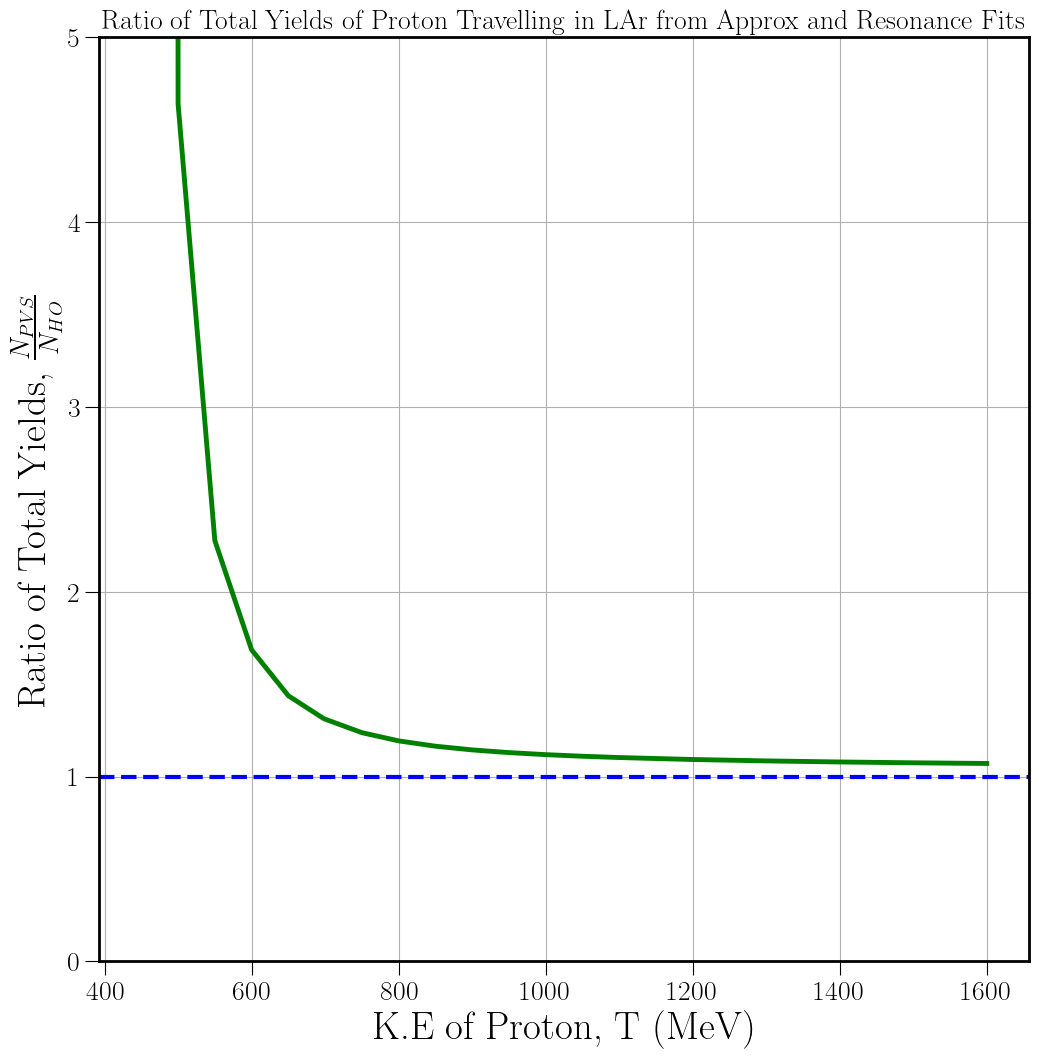

In [258]:
#Plot of Cerenkov photons emitted by Proton in the LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Ratio of Total Yields of Proton Travelling in LAr from Approx and Resonance Fits", fontsize=20)
# ax.plot(t, cerenkovtsum, linewidth = 3.5, color='b')
# ax.plot(t, cerenkovtsumpvs, ls='dashdot', linewidth = 3.5, color='orange')

ax.plot(t, np.divide(cerenkovtsumpvs500,cerenkovtsum500), linewidth = 3.5, color='green')

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("K.E of Proton, T (MeV)",fontsize=28)
ax.set_ylabel('Ratio of Total Yields, $\\frac{N_{PVS}}{N_{HO}}$',fontsize=28)
ax.grid()
# ax.legend(fontsize=18)
# plt.xlim(440,1600)
plt.ylim(0,5)
plt.axhline(1,ls='--',c='blue',lw=3)

plt.savefig("ratio_yields_pvsoverres.jpg", bbox_inches="tight")

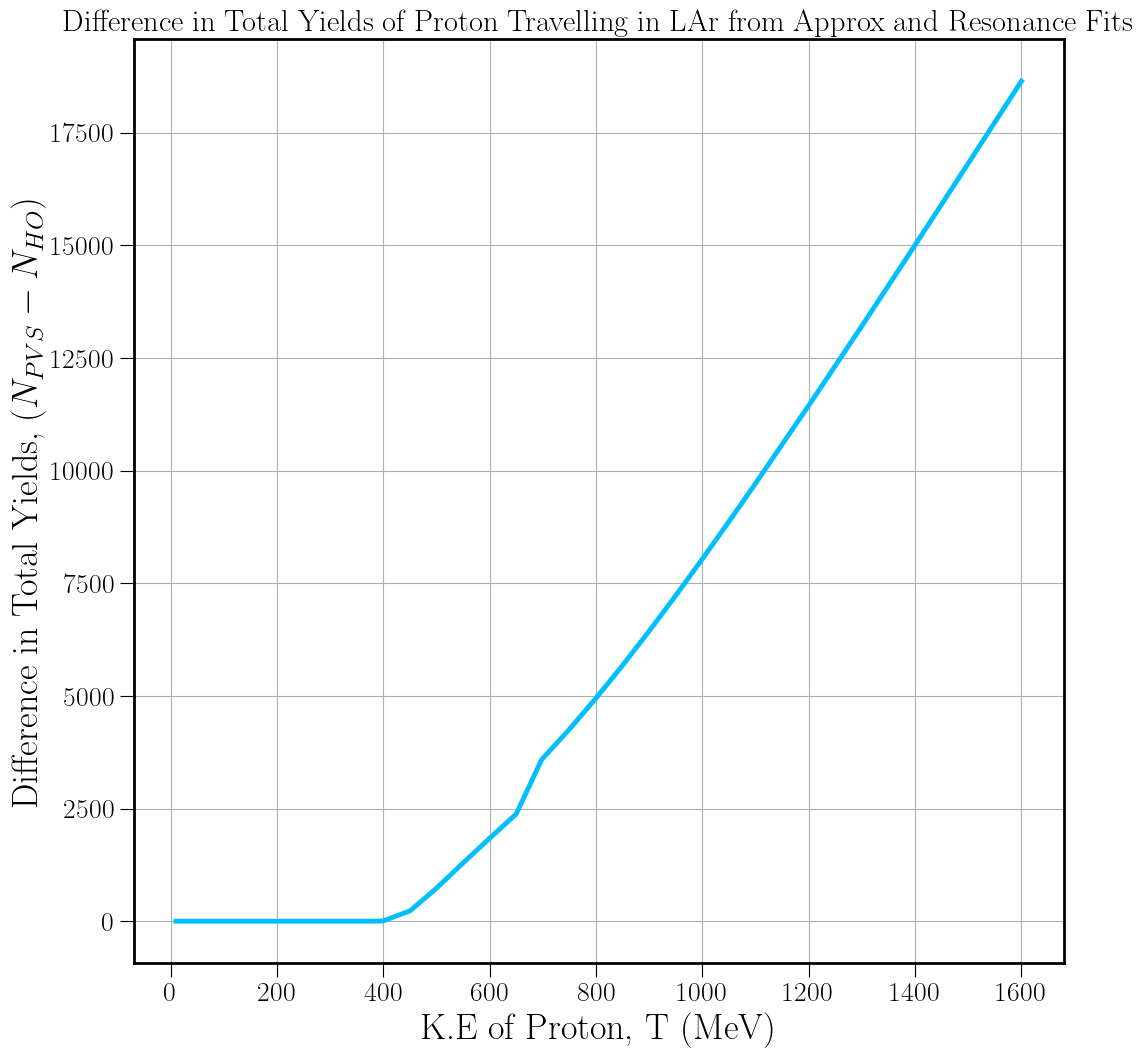

In [184]:
#Plot of Cerenkov photons emitted by Proton in the LAr medium. (no vs T)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Difference in Total Yields of Proton Travelling in LAr from Approx and Resonance Fits", fontsize=22)
# ax.plot(t, cerenkovtsum, linewidth = 3.5, color='b')
# ax.plot(t, cerenkovtsumpvs, ls='dashdot', linewidth = 3.5, color='orange')

ax.plot(t, np.subtract(cerenkovtsumpvs500,cerenkovtsum500), linewidth = 3.5, color='deepskyblue')

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("K.E of Proton, T (MeV)",fontsize=26)
ax.set_ylabel('Difference in Total Yields, $(N_{PVS} - N_{HO})$',fontsize=26)
ax.grid()
# ax.legend(fontsize=18)
# plt.xlim(440,1600)
# plt.ylim(0,5)
# plt.axhline(1,ls='--',c='blue',lw=3)

plt.savefig("difference_yields_pvsminusres.jpg", bbox_inches="tight")

# Wavelength Solutions

C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\496657288.py:16: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\496657288.py:17: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\496657288.py:20: RuntimeWarning: invalid value encountered in sqrt
  lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
C

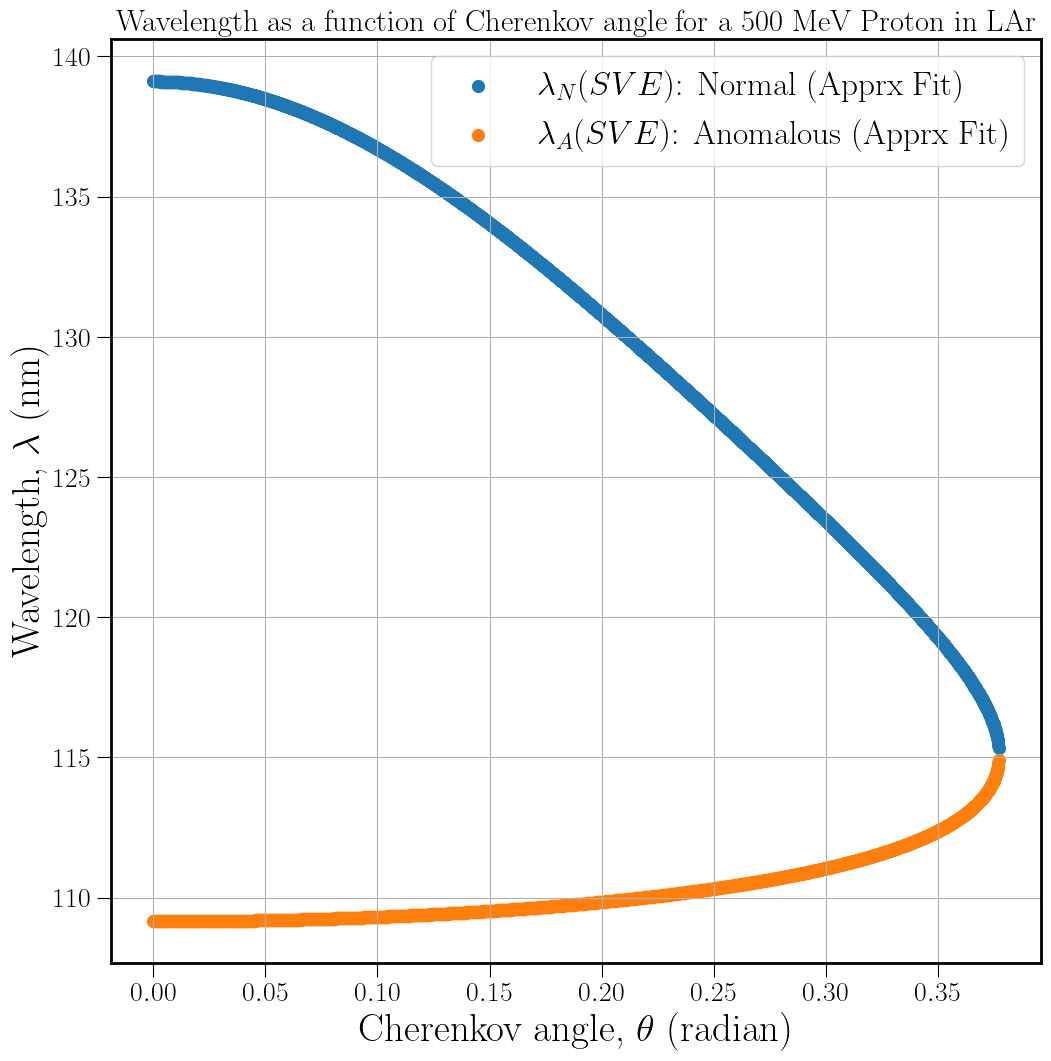

In [616]:
#Angular
#Wavelength Solutions (PVS)

#lambda(theta) when theta changes

# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])
lamd = np.linspace(90,700,10000)
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))


theta = np.linspace(0, np.pi/2, 10000)

b = 0.7579653181328908 #beta

#Wavelength as a function of the angle: lambda(theta)
lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))

#term involving wavelengths: (lamd_uv^-1 - lamd_theta^-1)
lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
lamd_nterm = (((-b*a_pvs*np.cos(theta)) - ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p

func_angp = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_pterm**2)**2/(gamma**2 - lamd_pterm**2))) + ((2*a_0*a_pvs*b) * lamd_pterm * np.abs((gamma**2 + lamd_pterm**2)/(gamma**2 - lamd_pterm**2))) + ((b*a_pvs**2*lamd_pterm**2)/np.abs(gamma**2 - lamd_pterm**2))))
func_angn = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_nterm**2)**2/(gamma**2 - lamd_nterm**2))) + ((2*a_0*a_pvs*b) * lamd_nterm * np.abs((gamma**2 + lamd_nterm**2)/(gamma**2 - lamd_nterm**2))) + ((b*a_pvs**2*lamd_nterm**2)/np.abs(gamma**2 - lamd_nterm**2))))

func_angt = func_angp + func_angn

# print(b, lamd_thetap, lamd_thetan, lamd_pterm, lamd_nterm, func_angp, func_angn, sep='\n')

# print(theta, lamd_thetap) #, lamd_thetan, lamd_pterm, func_angp, func_angn
# print("{}, lamd_thetap= {:.5f}, lamd_thetan = {:.5f}, lamd_pterm  = {}, func_ang= {}".format(b, lamd_thetap, lamd_thetan, lamd_pterm, func_ang))
# lamd_pterm, lamd_nterm
#(0.00021947, 0.00061913), (0.00219235, 0.00077715)

#Plot of lambda vs theta in the LAr medium near Resonance  
# theta = np.linspace(0, np.pi/2, 2000)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title("Wavelength as a function of Cherenkov angle for a 500 MeV Proton in LAr", fontsize= 22)
ax.scatter(theta, lamd_thetap, linewidth = 3.5, label= "$\\lambda_{N}(SVE)$: Normal (Apprx Fit)")
ax.scatter(theta, lamd_thetan, linewidth = 3.5, label= "$\\lambda_{A}(SVE)$: Anomalous (Apprx Fit)")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Cherenkov angle, $\\theta$ (radian)",fontsize=28)
ax.set_ylabel("Wavelength, $\\lambda$ (nm)",fontsize=28)
ax.grid()
ax.legend(fontsize=24)

# plt.ylim([0,300])
# plt.xlim([0,30])


# plt.savefig("wavelength_solutions_ourfit.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716
beta= 0.8418569002610763, cos_ang_min= 0.8730983710514503, cos_ang_max= 0.9716098512200885


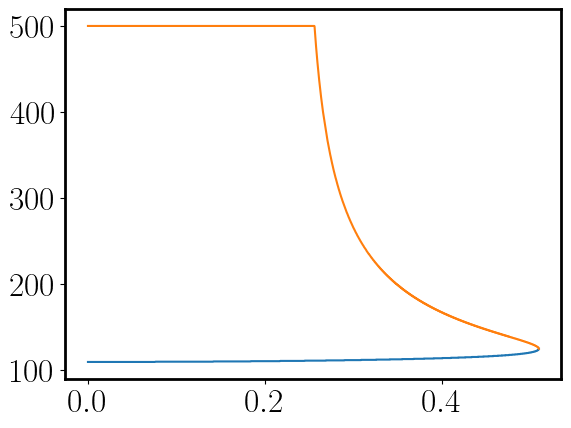

In [293]:
# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 800
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)

lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


# n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

#     funclamd = n_jacksonr - y

#     idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminrt = []
lamdmaxrt = []
    
# t = np.array([400, 500, 600, 650, 700, 750, 800, 850, 900]) #K>E in MeV 
# mp = 938  #Proton's mass in MeV
# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278


# for i in beta: 

cos_ang_min = 1/(i * n_peakr)
cos_ang_max = min(1/(i * n_asymtoter), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

print("beta= {}, cos_ang_min= {}, cos_ang_max= {}".format(i, cos_ang_min, cos_ang_max))
x_all = np.linspace(cos_ang_min, cos_ang_maxa, 2000)



for x in x_all: 
    
    if x >= cos_ang_min and x <= cos_ang_maxa:
        
        y= 1/(i*x)
        y = np.linspace(y,y,2000)   #wavelength of light 
        # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
        funclamd = n_jacksonr - y
        idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

    
        if 1/(i*x) >= n_peakr:
            lmin = lamd_peakr
            lmax = lamd_peakr
            
        if n_500 < 1/(i*x) < n_peakr:   
            lmin = lamd[min(idx)]
            lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
        if n_uvr < 1/(i*x) <= n_500:
            lmin = max(lamd[min(idx)], 106.67)
            lmax = 500            
    
        lamdminrt.append(lmin)
        lamdmaxrt.append(lmax)
    
    
plt.plot(np.arccos(x_all), lamdminrt)
plt.plot(np.arccos(x_all), lamdmaxrt)



K.E= [ 450  500  600  700  800  900 1000], beta= [0.73709191 0.75796532 0.79249149 0.81980026 0.8418569  0.85997431
 0.87506571]
n_uv = 1.10232, n_peak = 1.3605, n_500 = 1.2278, n_asymtote = 1.222558964716
beta= 0.7370919123190173, cos_ang_min= 0.9971943471253918, cos_ang_maxA= 1
theta_range= [0.07492617 0.07492243 0.07491868 ... 0.00105942 0.00074912 0.        ]
beta= 0.7579653181328908, cos_ang_min= 0.969732876547658, cos_ang_maxA= 1
theta_range= [0.24666192 0.24664952 0.24663712 ... 0.00347967 0.00246049 0.        ]
beta= 0.7924914946784183, cos_ang_min= 0.9274848919036427, cos_ang_maxA= 1
theta_range= [0.38316803 0.38314863 0.38312923 ... 0.005386   0.00380848 0.        ]
beta= 0.8198002603953367, cos_ang_min= 0.8965889909841142, cos_ang_maxA= 1
theta_range= [0.45879006 0.45876671 0.45874335 ... 0.00643185 0.004548   0.        ]
beta= 0.8418569002610763, cos_ang_min= 0.8730983710514503, cos_ang_maxA= 1
theta_range= [0.50927466 0.50924863 0.5092226  ... 0.00712502 0.00503815 0.     

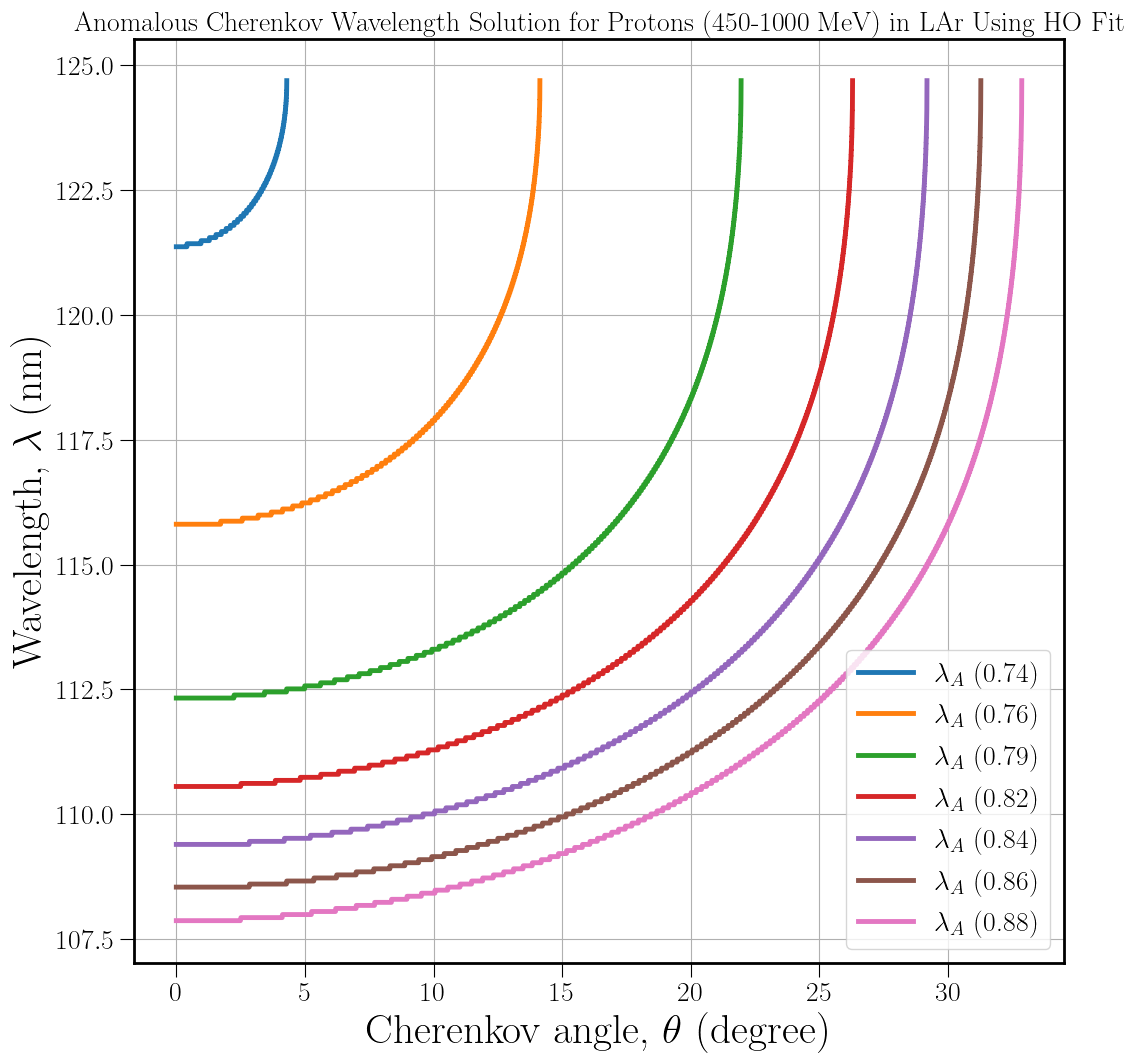

In [872]:
# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
# t = 800
# dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV

# i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 10000)
x_all = np.linspace(0, 1, 10000)
x = np.cos(theta)

lamd = np.linspace(90,700,10000)


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

#     funclamd = n_jacksonr - y

#     idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


lamd_alist = []
lamd_nlist = []
    
t = np.array([450, 500, 600, 700, 800, 900, 1000]) #K>E in MeV 
# t = np.array([500,600]) #K>E in MeV 
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
print("K.E= {}, beta= {}".format(t, beta))

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278

print("n_uv = {}, n_peak = {}, n_500 = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# ax.set_title(r"Wavelength as a Function of Cherenkov Angle for Protons (450-1000 MeV) in LAr Using HO Fit", fontsize=18)
# ax.set_title(r"Normal Cherenkov Wavelength Solution for Protons (450-1000 MeV) in LAr Using HO Fit", fontsize=20)
ax.set_title(r"Anomalous Cherenkov Wavelength Solution for Protons (450-1000 MeV) in LAr Using HO Fit", fontsize=20)


for i in beta: 

    cos_ang_min = 1/(i * n_peakr)
    cos_ang_max = min(1/(i * n_asymtoter), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

    cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
    cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

    print("beta= {}, cos_ang_min= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxa))
    x_all = np.linspace(cos_ang_min, cos_ang_maxa, 10000)
    
    print("theta_range= {}".format(np.arccos(x_all)))
    
    lamdminrts = []
    lamdmaxrts = []


    for x in x_all: 
    
        if x >= cos_ang_min and x <= cos_ang_maxa:

            y= 1/(i*x)
            y = np.linspace(y,y,10000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
            # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))


            if 1/(i*x) >= n_peakr:
                lmin = lamd_peakr
                lmax = lamd_peakr

            if n_500 < 1/(i*x) < n_peakr:   
                lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

            if n_uvr < 1/(i*x) <= n_500:
                lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            

        lamdminrts.append(lmin)
        lamdmaxrts.append(lmax)
        
    lamd_alist.append(lamdminrts) #normal
    lamd_nlist.append(lamdmaxrts) #anomalous
    
    # plt.plot(np.arccos(x_all)*(180/np.pi), lamdminrts) #in degrees
    # plt.plot(np.arccos(x_all)*(180/np.pi), lamdmaxrts) #in degrees

    
    # ax.plot(np.arccos(x_all)*(180/np.pi), lamdmaxrts, linewidth = 3.5, label= r"$\lambda_N$ ({:.2f})".format(i)) # {} MeV".format(i)) #in degrees
    ax.plot(np.arccos(x_all)*(180/np.pi), lamdminrts, linewidth = 3.5, label= r"$\lambda_A$ ({:.2f})".format(i)) # {} MeV".format(i)) #in degrees


    ax.tick_params(axis='both',which='major',labelsize=20,length=10)

    ax.set_xlabel("Cherenkov angle, $\\theta$ (degree)",fontsize=30)
    ax.set_ylabel("Wavelength, $\\lambda$ (nm)",fontsize=30)
    ax.grid()
    ax.legend(loc='best',fontsize=20) #loc='best' ,framealpha=None,shadow=True

    # plt.show()

# plt.savefig("lambda_r_vs_theta_HO_allT.jpg", bbox_inches="tight")

plt.savefig("lambda_anom_r_vs_theta_HO_allT_highres_dth10k.jpg", bbox_inches="tight")


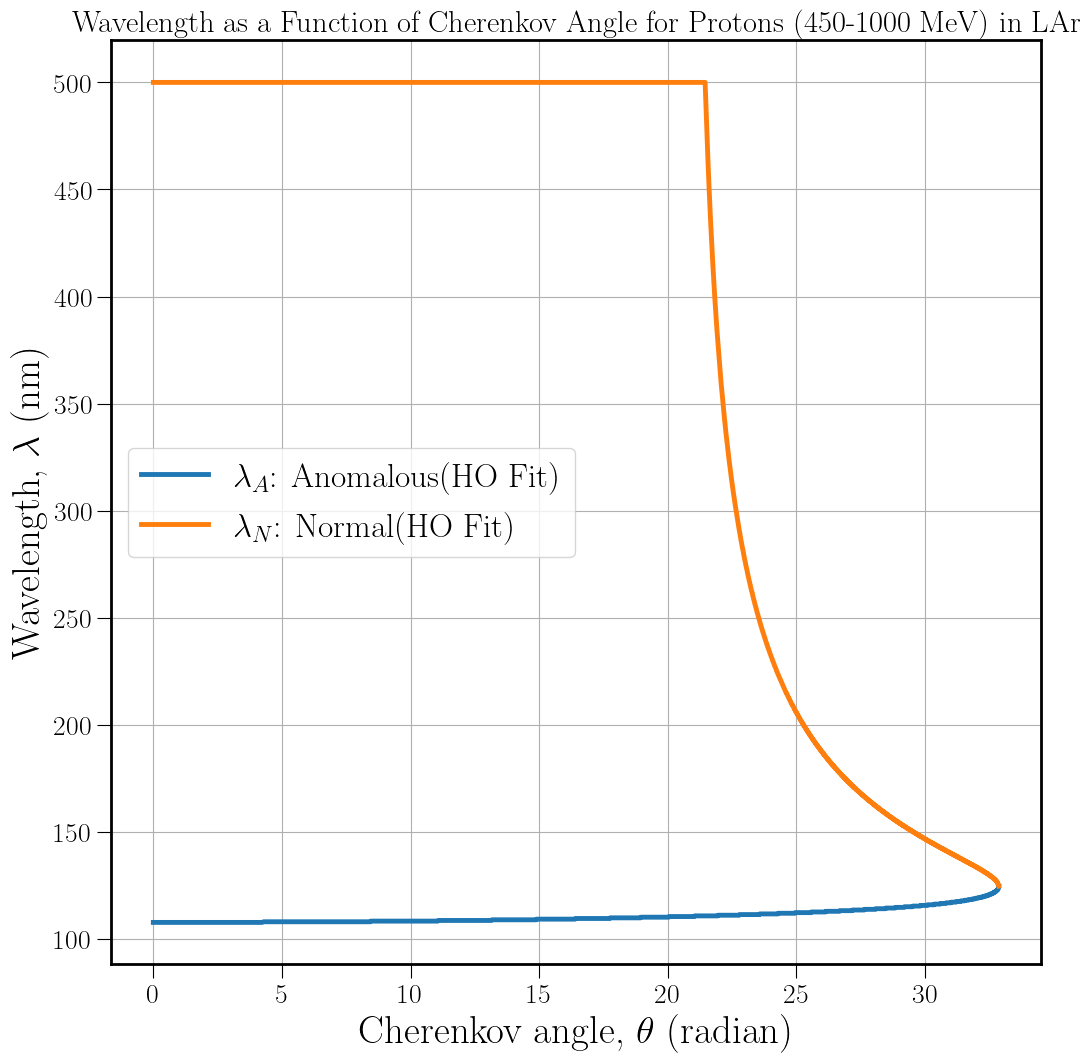

In [853]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title(r"Wavelength as a Function of Cherenkov Angle for Protons (450-1000 MeV) in LAr", fontsize=22)

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.plot(np.arccos(x_all)*(180/np.pi), lamd_, linewidth = 3.5, label= "$\\lambda_{A}$: Anomalous(HO Fit)") #in degrees
ax.plot(np.arccos(x_all)*(180/np.pi), lamdmaxrts, linewidth = 3.5, label= "$\\lambda_{N}$: Normal(HO Fit)") #in degrees


ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Cherenkov angle, $\\theta$ (degree)",fontsize=28)
ax.set_ylabel("Wavelength, $\\lambda$ (nm)",fontsize=28)
ax.grid()
ax.legend(loc='best',fontsize=24) #loc='best' ,framealpha=None,shadow=True
plt.savefig("lambda_r_vs_theta_HO_allT.jpg", bbox_inches="tight")

In [ ]:
#Plot of lambda vs theta in the LAr medium near Resonance (HO)

# t = np.array([450, 500, 600, 650, 700, 750, 800, 850, 900]) #K>E in MeV 
t = np.array([450, 500, 600, 700, 800, 900, 1000]) #K>E in MeV 
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
print("K.E= {}, beta= {}".format(t, beta))

# theta = np.linspace(0, np.pi/2, 2000)
# x_all = np.linspace(0, 1, 2000)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.set_title("Wavelength as a Function of Cherenkov Angle for Protons in LAr For the Resonance Model Fit", fontsize= 22)

ax.scatter(np.arccos(x_all), lamd_nlist[0], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 450 MeV")              #.format(t[0]))
ax.scatter(np.arccos(x_all), lamd_alist[0], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 450 MeV")             #.format(t[0]))

ax.scatter(np.arccos(x_all), lamd_nlist[1], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 500 MeV")
ax.scatter(np.arccos(x_all), lamd_alist[1], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 500 MeV")

ax.scatter(np.arccos(x_all), lamd_nlist[2], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 600 MeV")
ax.scatter(np.arccos(x_all), lamd_alist[2], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 600 MeV")

ax.scatter(np.arccos(x_all), lamd_nlist[3], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 700 MeV")
ax.scatter(np.arccos(x_all), lamd_alist[3], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 700 MeV")

# ax.scatter(np.arccos(x_all), lamd_nlist[4], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 800 MeV")
# ax.scatter(np.arccos(x_all), lamd_alist[4], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 800 MeV")

# ax.scatter(np.arccos(x_all), lamd_nlist[5], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 900 MeV")
# ax.scatter(np.arccos(x_all), lamd_alist[5], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 900 MeV")

# ax.scatter(np.arccos(x_all), lamd_nlist[6], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 1000 MeV")
# ax.scatter(np.arccos(x_all), lamd_alist[6], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 1000 MeV")

# ax.scatter(np.arccos(x_all), lamd_nlist[7], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 450 MeV")
# ax.scatter(np.arccos(x_all), lamd_alist[7], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 450 MeV")

# ax.scatter(np.arccos(x_all), lamd_nlist[8], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 450 MeV")
# ax.scatter(np.arccos(x_all), lamd_alist[8], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 450 MeV")

# ax.scatter(np.arccos(x_all), lamd_nlist[9], linewidth = 3.5, label= "$\\lambda_{N}(\\theta)$ for T = 450 MeV")
# ax.scatter(np.arccos(x_all), lamd_alist[9], linewidth = 3.5, label= "$\\lambda_{A}(\\theta)$ for T = 450 MeV")


ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Cherenkov Angle, $\\theta$ (Radian)",fontsize=26)
ax.set_ylabel("Wavelength, $\\lambda$ (nm)",fontsize=26)
ax.grid()
ax.legend(fontsize=16)


# plt.ylim([100,500])
# plt.xlim([0,30])
# plt.savefig("lambda_r_vs_theta_HO_allT.jpg", bbox_inches="tight")

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


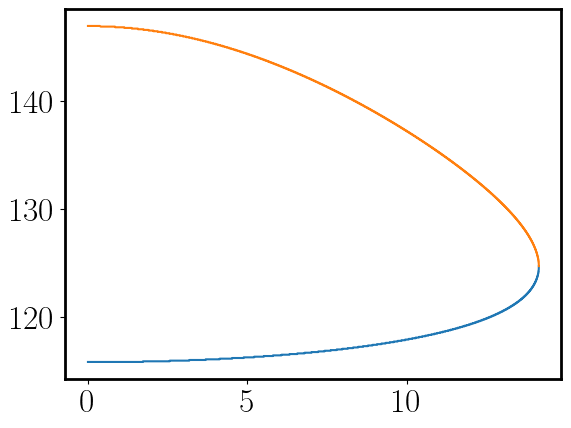

In [748]:
# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 500
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 10000)
x_all = np.linspace(0, 1, 10000)
x = np.cos(theta)

lamd = np.linspace(90,700,10000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


cerenkovangnsum = []
cerenkovangasum = []
cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]
cerenkovangasum = [0 for x in x_all]

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

#     funclamd = n_jacksonr - y

#     idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278


cos_ang_min = 1/(i * n_peakr)
cos_ang_max = min(1/(i * n_asymtoter), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_max= {}".format(i, cos_ang_min, cos_ang_max))
x_all = np.linspace(cos_ang_min, cos_ang_maxa, 10000)

    
        
            # print(lamd[idx])

for x in x_all: 
    
    if x >= cos_ang_min and x <= cos_ang_maxa:
        
        y= 1/(i*x)
        y = np.linspace(y,y,10000)   #wavelength of light 
        # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
        funclamd = n_jacksonr - y
        idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

    
        if 1/(i*x) >= n_peakr:
            lmin = lamd_peakr
            lmax = lamd_peakr
            
        if n_500 < 1/(i*x) < n_peakr:   
            lmin = lamd[min(idx)]
            lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
        if n_uvr < 1/(i*x) <= n_500:
            lmin = max(lamd[min(idx)], 106.67)
            lmax = 500            
    

        
        lamdminr.append(lmin)
        lamdmaxr.append(lmax)
    
    
plt.plot(np.arccos(x_all)*180/np.pi, lamdminr)
plt.plot(np.arccos(x_all)*180/np.pi, lamdmaxr)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1425072650.py:16: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1425072650.py:17: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1425072650.py:20: RuntimeWarning: invalid value encountered in sqrt
  lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_

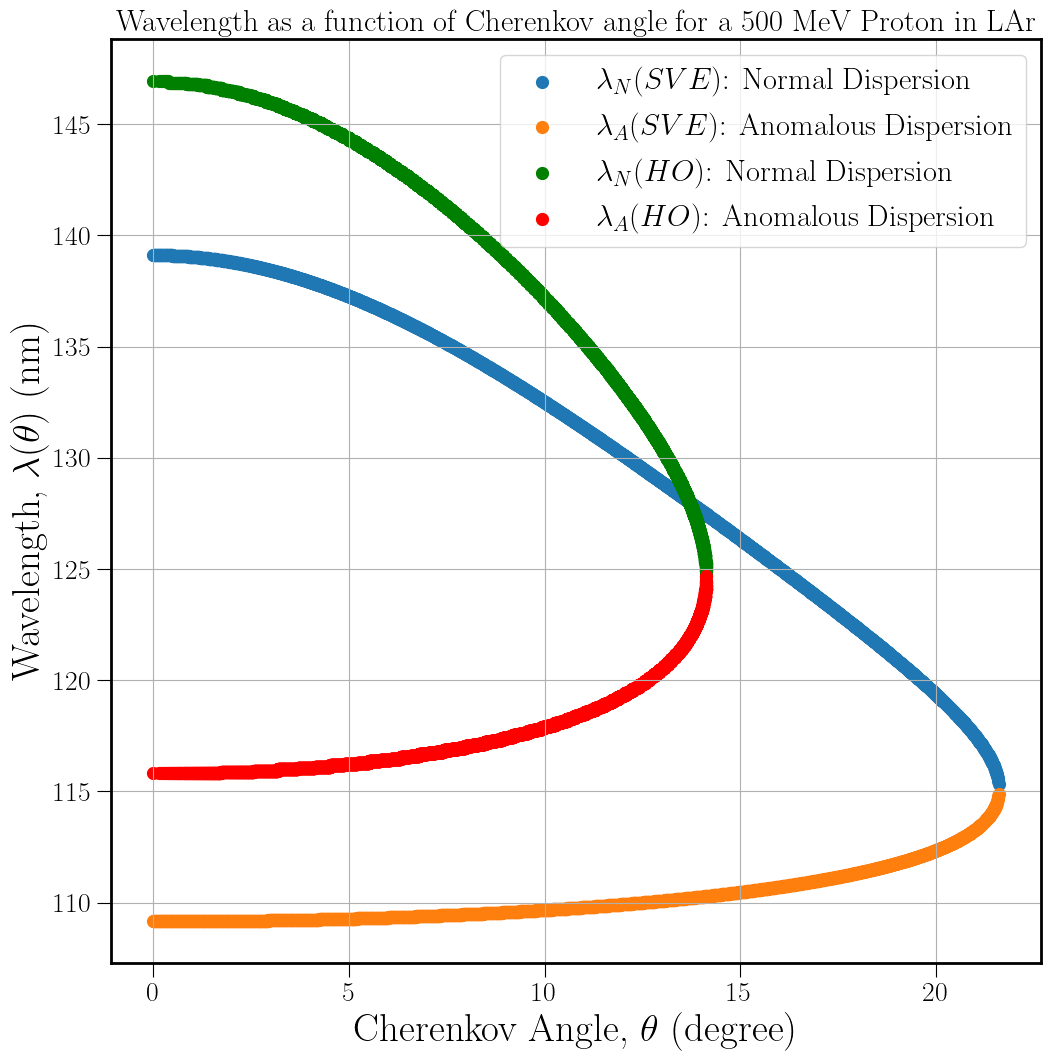

In [751]:
#Angular
#Wavelength Solutions (PVS)

#lambda(theta) when theta changes

# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])
# lamd = np.linspace(0,700,700)
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

thetadeg = theta * 180/np.pi
# theta = np.linspace(0, np.pi/2, 2000)

b = 0.7579653181328908 #beta

#Wavelength as a function of the angle: lambda(theta)
lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))

#term involving wavelengths: (lamd_uv^-1 - lamd_theta^-1)
lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
lamd_nterm = (((-b*a_pvs*np.cos(theta)) - ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p

func_angp = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_pterm**2)**2/(gamma**2 - lamd_pterm**2))) + ((2*a_0*a_pvs*b) * lamd_pterm * np.abs((gamma**2 + lamd_pterm**2)/(gamma**2 - lamd_pterm**2))) + ((b*a_pvs**2*lamd_pterm**2)/np.abs(gamma**2 - lamd_pterm**2))))
func_angn = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_nterm**2)**2/(gamma**2 - lamd_nterm**2))) + ((2*a_0*a_pvs*b) * lamd_nterm * np.abs((gamma**2 + lamd_nterm**2)/(gamma**2 - lamd_nterm**2))) + ((b*a_pvs**2*lamd_nterm**2)/np.abs(gamma**2 - lamd_nterm**2))))

func_angt = func_angp + func_angn

# print(b, lamd_thetap, lamd_thetan, lamd_pterm, lamd_nterm, func_angp, func_angn, sep='\n')

# print(theta, lamd_thetap) #, lamd_thetan, lamd_pterm, func_angp, func_angn
# print("{}, lamd_thetap= {:.5f}, lamd_thetan = {:.5f}, lamd_pterm  = {}, func_ang= {}".format(b, lamd_thetap, lamd_thetan, lamd_pterm, func_ang))
# lamd_pterm, lamd_nterm
#(0.00021947, 0.00061913), (0.00219235, 0.00077715)

#Plot of lambda vs theta in the LAr medium near Resonance  
# theta = np.linspace(0, np.pi/2, 2000)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title("Wavelength as a function of Cherenkov angle for a 500 MeV Proton in LAr", fontsize= 22) #($\\beta$ = 0.758) 

#Apprx PVS fit WL solution
ax.scatter(thetadeg, lamd_thetap, linewidth = 3.5, label= "$\\lambda_{N}(SVE)$: Normal Dispersion")
ax.scatter(thetadeg, lamd_thetan, linewidth = 3.5, label= "$\\lambda_{A}(SVE)$: Anomalous Dispersion")

#Exact HO fit WL solution
ax.scatter(np.arccos(x_all)*180/np.pi, lamdmaxr, c= 'g', linewidth = 3.5, label= "$\\lambda_{N}(HO)$: Normal Dispersion")
ax.scatter(np.arccos(x_all)*180/np.pi, lamdminr, c= 'r', linewidth = 3.5, label= "$\\lambda_{A}(HO)$: Anomalous Dispersion")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Cherenkov Angle, $\\theta$ (degree)",fontsize=28)
ax.set_ylabel("Wavelength, $\\lambda (\\theta)$ (nm)",fontsize=28)
ax.grid()
ax.legend(fontsize=22)

# plt.ylim([0,300])
# plt.xlim([0,30])

# plt.savefig("wavelength_solutions_ourhofit_500MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
# plt.savefig("wavelength_solutions_HOvsPVS.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta = 0.8198002603953367, n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


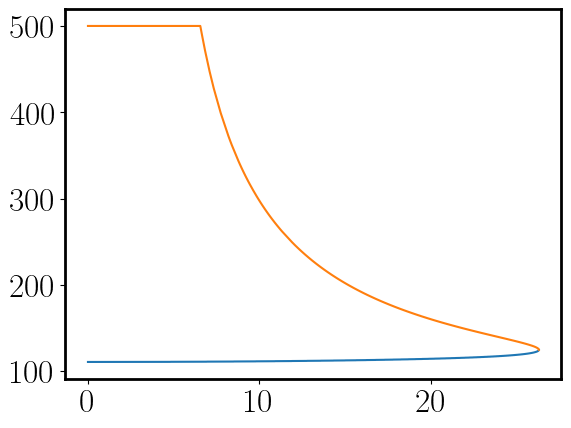

In [755]:
# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 700
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 10000)
x_all = np.linspace(0, 1, 10000)
x = np.cos(theta)

lamd = np.linspace(90,700,10000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("beta = {}, n_uv = {}, n_peak = {}, n_asymtote = {}".format(i, n_uvr, n_peakr, n_asymtoter))


cerenkovangnsum = []
cerenkovangasum = []
cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]
cerenkovangasum = [0 for x in x_all]

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

#     funclamd = n_jacksonr - y

#     idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278


cos_ang_min = 1/(i * n_peakr)
cos_ang_max = min(1/(i * n_asymtoter), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_max= {}".format(i, cos_ang_min, cos_ang_max))
x_all = np.linspace(cos_ang_min, cos_ang_maxa, 10000)

    
        
            # print(lamd[idx])

for x in x_all: 
    
    if x >= cos_ang_min and x <= cos_ang_maxa:
        
        y= 1/(i*x)
        y = np.linspace(y,y,10000)   #wavelength of light 
        # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
        funclamd = n_jacksonr - y
        idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

    
        if 1/(i*x) >= n_peakr:
            lmin = lamd_peakr
            lmax = lamd_peakr
            
        if n_500 < 1/(i*x) < n_peakr:   
            lmin = lamd[min(idx)]
            lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
        if n_uvr < 1/(i*x) <= n_500:
            lmin = max(lamd[min(idx)], 106.67)
            lmax = 500            
    

        
        lamdminr.append(lmin)
        lamdmaxr.append(lmax)
    
    
plt.plot(np.arccos(x_all)*180/np.pi, lamdminr)
plt.plot(np.arccos(x_all)*180/np.pi, lamdmaxr)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\640757776.py:16: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\640757776.py:17: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\640757776.py:20: RuntimeWarning: invalid value encountered in sqrt
  lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
C

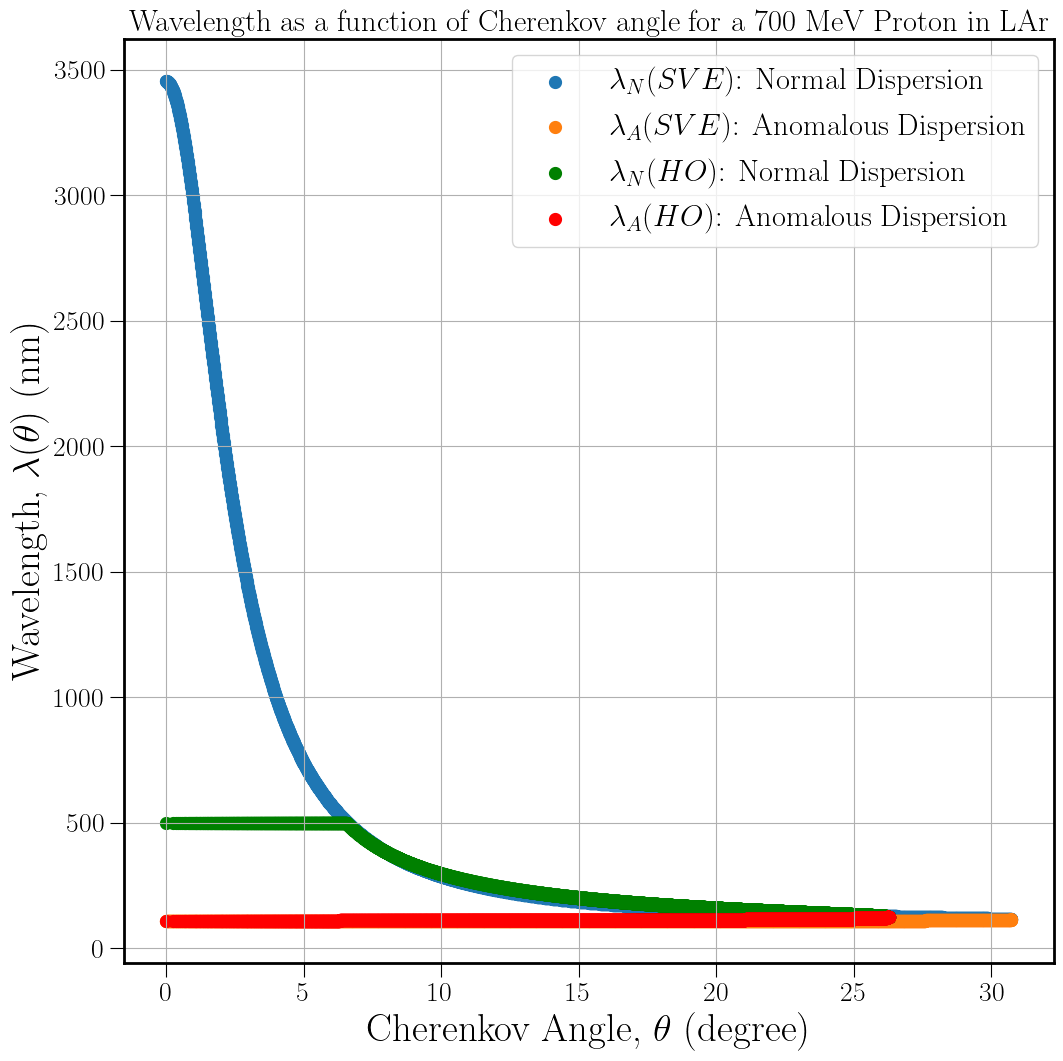

In [756]:
#Angular
#Wavelength Solutions (PVS)

#lambda(theta) when theta changes

# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])
# lamd = np.linspace(0,700,700)
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

thetadeg = theta * 180/np.pi
# theta = np.linspace(0, np.pi/2, 2000)

b = 0.8198002603953367 #beta 600 MeV

#Wavelength as a function of the angle: lambda(theta)
lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))

#term involving wavelengths: (lamd_uv^-1 - lamd_theta^-1)
lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
lamd_nterm = (((-b*a_pvs*np.cos(theta)) - ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p

func_angp = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_pterm**2)**2/(gamma**2 - lamd_pterm**2))) + ((2*a_0*a_pvs*b) * lamd_pterm * np.abs((gamma**2 + lamd_pterm**2)/(gamma**2 - lamd_pterm**2))) + ((b*a_pvs**2*lamd_pterm**2)/np.abs(gamma**2 - lamd_pterm**2))))
func_angn = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_nterm**2)**2/(gamma**2 - lamd_nterm**2))) + ((2*a_0*a_pvs*b) * lamd_nterm * np.abs((gamma**2 + lamd_nterm**2)/(gamma**2 - lamd_nterm**2))) + ((b*a_pvs**2*lamd_nterm**2)/np.abs(gamma**2 - lamd_nterm**2))))

func_angt = func_angp + func_angn

# print(b, lamd_thetap, lamd_thetan, lamd_pterm, lamd_nterm, func_angp, func_angn, sep='\n')

# print(theta, lamd_thetap) #, lamd_thetan, lamd_pterm, func_angp, func_angn
# print("{}, lamd_thetap= {:.5f}, lamd_thetan = {:.5f}, lamd_pterm  = {}, func_ang= {}".format(b, lamd_thetap, lamd_thetan, lamd_pterm, func_ang))
# lamd_pterm, lamd_nterm
#(0.00021947, 0.00061913), (0.00219235, 0.00077715)

#Plot of lambda vs theta in the LAr medium near Resonance  
# theta = np.linspace(0, np.pi/2, 2000)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title("Wavelength as a function of Cherenkov angle for a 700 MeV Proton in LAr", fontsize= 22) #($\\beta$ = 0.758) 

#Apprx PVS fit WL solution
ax.scatter(thetadeg, lamd_thetap, linewidth = 3.5, label= "$\\lambda_{N}(SVE)$: Normal Dispersion")
ax.scatter(thetadeg, lamd_thetan, linewidth = 3.5, label= "$\\lambda_{A}(SVE)$: Anomalous Dispersion")

#Exact HO fit WL solution
ax.scatter(np.arccos(x_all)*180/np.pi, lamdmaxr, c= 'g', linewidth = 3.5, label= "$\\lambda_{N}(HO)$: Normal Dispersion")
ax.scatter(np.arccos(x_all)*180/np.pi, lamdminr, c= 'r', linewidth = 3.5, label= "$\\lambda_{A}(HO)$: Anomalous Dispersion")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Cherenkov Angle, $\\theta$ (degree)",fontsize=28)
ax.set_ylabel("Wavelength, $\\lambda (\\theta)$ (nm)",fontsize=28)
ax.grid()
ax.legend(fontsize=22)

# plt.ylim([0,300])
# plt.xlim([0,30])

# plt.savefig("wavelength_solutions_ourhofit_500MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
plt.savefig("wavelength_solutions_HOvsPVS_700MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1937034328.py:36: RuntimeWarning: invalid value encountered in sqrt
  n_grace = np.sqrt(a_0g + (a_uvg*lamd**2/(lamd**2-lamd_uv**2))) #+ (a_irg*lamd**2/(lamd**2-lamd_ir**2)))) #(ignoring the 3rd term)
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1937034328.py:63: RuntimeWarning: invalid value encountered in sqrt
  n_babics = np.sqrt(1+(3*x/(3-x)))


[135.89296263 135.89295812 135.89294458 ... 108.65731093 108.65731062
 108.65731052]


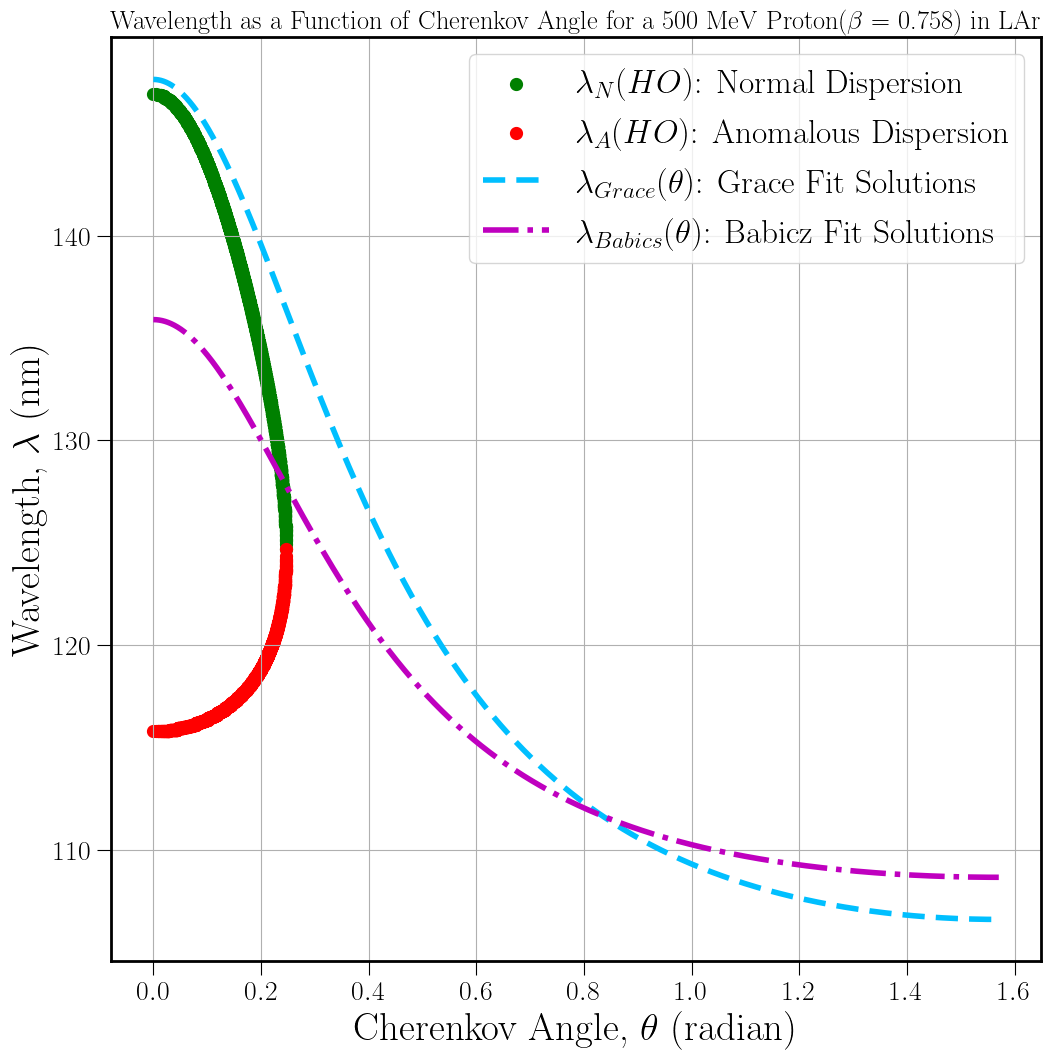

In [633]:
#Angular Distribution for Babics(2020) Fit: 500 MeV
#lambda(theta) for different betas

alpha = 1/137 #Fine-structure (EM coupling) constant 

mp = 938  #Proton's mass in MeV
# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# t = np.array([400, 500, 600, 650, 700]) #K>E in MeV 

beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 124.68 #where n is max 

# theta = np.linspace(0, np.pi/2, 10000)
# x = np.cos(theta)
# x_all = np.linspace(0, 1, 10000)
# lamd = np.linspace(90,700,10000)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

b = 0.7579653181328908 #beta-> T = 500,700,800 MeV



#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

# n_grace = complex(n1,n2)
n_grace = np.sqrt(a_0g + (a_uvg*lamd**2/(lamd**2-lamd_uv**2))) #+ (a_irg*lamd**2/(lamd**2-lamd_ir**2)))) #(ignoring the 3rd term)

# b1 = 0.7579653181328908 #beta
# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])

# lamd_thetalist = []
# func_angtlist = []
# func_ang = 2* np.pi * 1e6 * (alpha/a_uvg) * ((b * a_0g * (lamd_theta**2 - lamd_uv**2)/(lamd_theta**3 * lamd_uv**2)) + (b * a_uvg /(lamd_theta * lamd_uv**2)) -  ((lamd_theta**2 - lamd_uv**2)/(b * lamd_theta**3 * lamd_uv**2)))                                      

# for b in beta: 
# b = 0.7579653181328908 #beta-> T = 500,700,800 MeV

lamd_thetag = np.sqrt((a_0g*b**2*np.cos(theta)**2 - 1)/((a_0g + a_uvg)*b**2*np.cos(theta)**2 - 1)) * lamd_uv



#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008

# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])

x = (a_0b + (a_uvb*lamd**2/(lamd**2-lamd_uv**2)) + (a_irb*lamd**2/(lamd**2-lamd_ir**2))) #(ignoring the 3rd term)
# x = a_0b + a_uvb + a_irb
n_babics = np.sqrt(1+(3*x/(3-x)))


# for b in beta: 
# b = 0.7579653181328908 #beta

lamd_thetab = np.sqrt(((a_0b - 3) + (b**2 * np.cos(theta)**2 * (3 + 2*a_0b))) / ((b**2 * np.cos(theta)**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv
print(lamd_thetab)   
# func_ang = 2*np.pi*1e6*(alpha/a_uvg)*((b*a_0g*(lamd_theta**2-lamd_uv**2)/(lamd_theta**3*lamd_uv**2)) + (b*a_uvg/(lamd_theta*lamd_uv**2)) -  ((lamd_theta**2-lamd_uv**2)/(b*lamd_theta**3*lamd_uv**2)))                                      

#Plot of lambda vs theta in the LAr medium near Resonance  

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

# #TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title("Wavelength as a Function of Cherenkov Angle for a 500 MeV Proton($\\beta$ = 0.758) in LAr", fontsize= 19)

#Apprx PVS fit WL solution
# ax.scatter(theta, lamd_thetap, linewidth = 3.5, label= "$\\lambda_{N}(SVE)$: Normal Dispersion")
# ax.scatter(theta, lamd_thetan, linewidth = 3.5, label= "$\\lambda_{A}(SVE)$: Anomalous Dispersion")

#Exact HO fit WL solution
ax.scatter(np.arccos(x_all), lamdmaxr, c= 'g', linewidth = 3.5, label= "$\\lambda_{N}(HO)$: Normal Dispersion")
ax.scatter(np.arccos(x_all), lamdminr, c= 'r', linewidth = 3.5, label= "$\\lambda_{A}(HO)$: Anomalous Dispersion")

ax.plot(theta, lamd_thetag, linewidth = 4, dashes=[4,2], color='deepskyblue', label= "$\\lambda_{Grace}(\\theta)$: Grace Fit Solutions")
ax.plot(theta, lamd_thetab, linewidth = 4, ls='dashdot', color='m', label= "$\\lambda_{Babics}(\\theta)$: Babicz Fit Solutions")

# ax.scatter(theta, lamd_theta, color='g', label= "$\\lambda_{Grace}(\\theta)$: Grace Fit Solutions")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Cherenkov Angle, $\\theta$ (radian)",fontsize=28)
ax.set_ylabel("Wavelength, $\lambda$ (nm)",fontsize=28)
ax.grid()
ax.legend(fontsize=24, loc= 'best')

# plt.ylim([0,300])
# plt.xlim([0,30])

# plt.savefig("wavelength_solutions_BabicsnGrace.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
# plt.savefig("wavelength_solutions_BabicznGracevsOurs.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

# IAD 

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.2278
beta= 0.7579653181328908, cos_ang_min= 0.969732876547658, cos_ang_maxN= 1, cos_ang_maxA= 1


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\2966001258.py:152: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\2966001258.py:191: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


[1.00000000e+00 9.99999691e-01 9.99998765e-01 ... 1.57158147e-03
 7.85790978e-04 6.12323400e-17] [0.0, 0.011274694576296035, 0.04509887578123632, 0.1014728360037871, 0.18039706257219026, 0.28187223776681586, 0.4058992388073414, 0.552479137887239, 0.721613202184619, 0.9133028938595609, 1.1275498701068676, 1.364355983170983, 1.6237232803494246, 1.9056540040577294, 2.2101505918403355, 2.5372156764105407, 2.886852085693171, 3.2590628428598274, 3.6538511663810413, 4.071220470060864, 4.5111743631025805, 4.973716650144666, 5.458851331327883, 5.966582602359008, 6.4969148545488675, 7.049852674901805, 7.625400846171343, 8.223564346924658, 8.844348351626035, 9.487758230706778, 10.15379955065009, 10.84247807406036, 11.55379975975754, 12.287770762864131, 13.044397434878608, 13.82368632380242, 14.581111628988651, 15.403234515609563, 16.247971377055435, 17.11532952589402, 18.005316471095554, 18.91793991811911, 19.85320776903606, 20.81112812265641, 21.79170927462533, 22.79495971756109, 23.820888141177

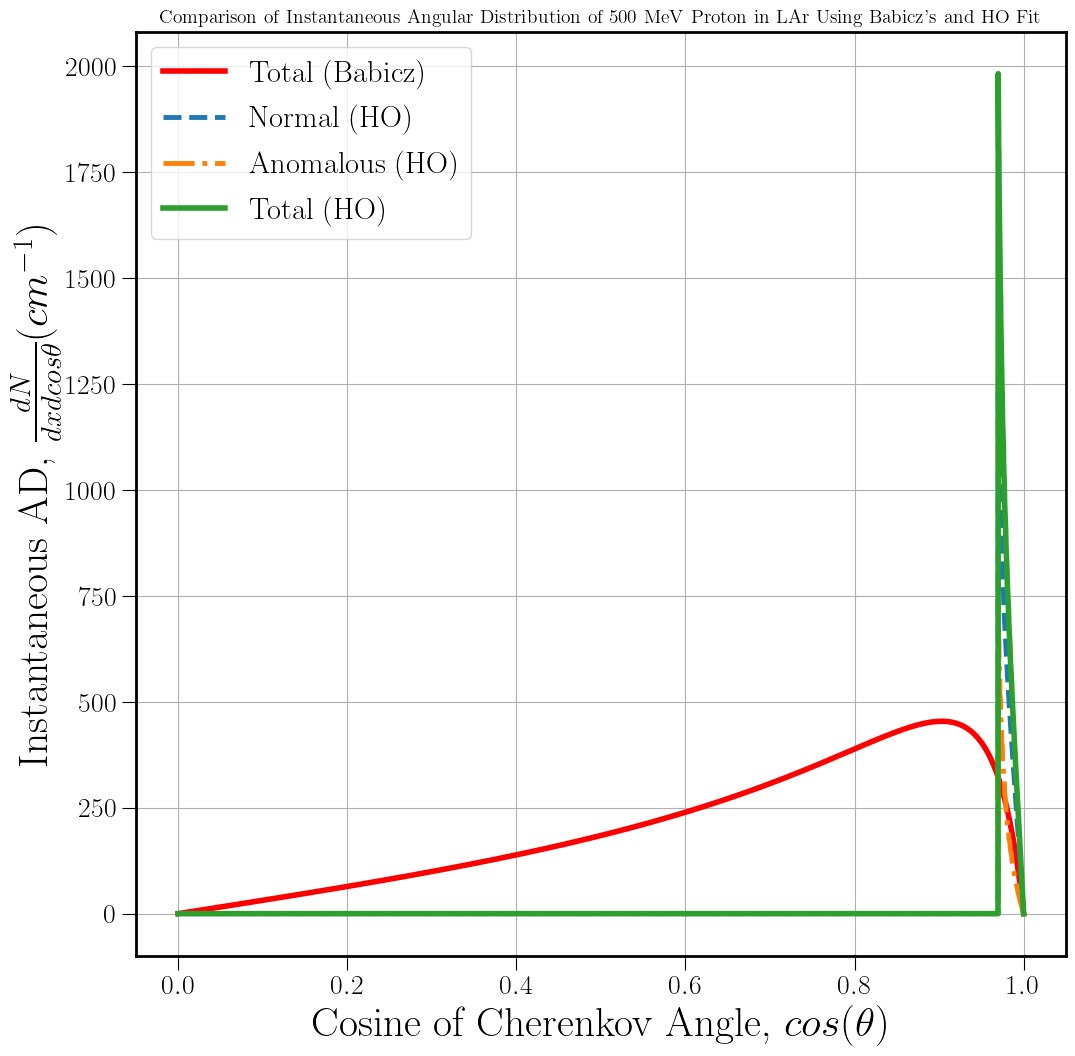

In [43]:
#Instantaneous AD with HO fit: all T (Data Saving Version: dtheta 2000)

# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 500
# dx = 0.1 #cm

# Choose a filename, ending in .npz
filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p500_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p600_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p700_ho.npz'

filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p500_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p600_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p700_babicz.npz'



alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach #Took Beta = i for instantaneous AD
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
# x_all = np.linspace(0, 1, 2000)
x_all = np.cos(theta)

lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))

lamd_peak = 115.11 #where n is max 


#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
# lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_uv = 108.657 #in nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 



# # for b in beta: 
# b = 0.7579653181328908 #beta #500 MeV 


# # cerenkovangnsum = []
# # cerenkovangasum = []
# # cerenkovangtsum = []

# cerenkov_alln =  [] #[[] for j in t] #normal
# cerenkov_alla =  [] #[[] for j in t] #anomalous

# cerenkov_all =  [] #[[] for j in t] #total
# scint_all =  []  #[[] for j in t]

# # beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # # print(beta)

# # for j in t: #range(len(t)) 

# cerenkovanglist = []
# cerenkovangsum = [0 for x in x_all]
# cerenkovangnsum = [0 for x in x_all]
# cerenkovangasum = [0 for x in x_all]


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    

cos_ang_min = 1/(i * n_peakr)
cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

for x in x_all: 
        
    def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

    def func_angn(x):  #Normal AD_
        
        if x >= cos_ang_min and x <= cos_ang_maxn:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_500 < 1/(i*x) < n_peakr:   
                # lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_500:
                # lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            
    
            d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
            lamdmaxr.append(lmax)
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
        else: 
            return 0 #To avaid getting negative contribution 

    func_angnc = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
    # cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
            
    
    def func_anga(x):  #Anomalous AD
        if x >= cos_ang_min and x <= cos_ang_maxa:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_uvr < 1/(i*x) < n_peakr:   
                lmin = max(lamd[min(idx)], 106.67)
                # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_uvr:
                lmin = 106.67
                # lmax = 500            
    
            lamdminr.append(lmin)
            d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
        else: 
            return 0 #To avaid getting negative contribution 

    func_angac = [func_anga(x) for x in x_all]       
           
    # cerenkovangasum = np.add(func_angac, cerenkovangasum) 
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
    
        
    func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]  # func_angtc = func_angnc + func_angac 
    
    # # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
    np.savez(filename1, theta=theta, costheta=x_all, itotalho=func_angtc, inormalho=func_angnc, ianomalousho=func_angac) #ke=t_arr, 

print(x_all, func_angtc)

# plt.plot(x_all, lamdminr)
# plt.plot(x_all, lamdmaxr)

# plt.plot(x_all, func_angnc)
# plt.plot(x_all, func_angac)
        
# plt.plot(x_all, func_angtc)

# plt.xlim(0.8,1)

print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr using HO fit: {:.3f}" .format(t, sum(func_angtc)/2000) )#, sum(cerenkovangsum)/5000  * (dx/0.1)


#Babicz

# x = (a_0b + (a_uvb*lamd**2/(lamd**2-lamd_uv**2)) + (a_irb*lamd**2/(lamd**2-lamd_ir**2))) #(ignoring the 3rd term)
# # x = a_0b + a_uvb + a_irb
# n_babics = np.sqrt(1+(3*x/(3-x)))

for x in x_all: 

#     cos_ang_minb = 0
#     cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/i , 1)
# # 
#     # print(cos_ang_minb, cos_ang_maxb)

    
    # def func_angbz(x):
#         if x >= cos_ang_minb and x <= cos_ang_maxb:
#             return (2*np.pi*1e7) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (i * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/i)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
#         else: 
#             return 0 #To avaid getting negative contribution 

        
    def func_angbz(x):
        lamd_thetab = np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv
        return (2*np.pi*1e7) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (i * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/i)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
#     print(lamd_thetab, func_angb)
    func_angbz = [func_angbz(x) for x in x_all]
    np.savez(filename2, theta=theta, costheta=x_all, itotalb=func_angbz) #ke=t_arr, #Save data to .npz file

# print(x_all, func_angbz)

print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t, sum(func_angbz)/2000) )#, sum(cerenkovangsum)/5000  * (dx/0.1)


#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

#Plotting:   
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# ax.set_title("Instantaneous Angular Distribution of a 500 MeV Proton in LAr Using Babicz's Fit", fontsize= 20)
ax.set_title("Comparison of Instantaneous Angular Distribution of 500 MeV Proton in LAr Using Babicz's and HO Fit", fontsize= 14)


ax.plot(x_all, func_angbz, linewidth= 4, color= 'r', label= "Total (Babicz)")     #func_angp = f(lamd_pterm): Green plot

#HO fit
ax.plot(x_all, func_angnc, ls='dashed', linewidth= 3.5, label='Normal (HO)') #.format(float(j))) #normal
ax.plot(x_all, func_angac, ls='dashdot', linewidth= 3.5, label='Anomalous (HO)') #.format(float(j))) #anomalous

ax.plot(x_all, func_angtc, linewidth= 4, label='Total (HO)') #.format(float(j))) #total

ax.set_xlabel("Cosine of Cherenkov Angle, $cos(\\theta)$ ",fontsize=30)
ax.set_ylabel("Instantaneous AD, $\\frac{dN}{dx dcos\\theta} (cm^{-1})$",fontsize=30)
ax.grid()
ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.legend(fontsize=22)

# plt.ylim([0,0.0004])
# plt.xlim([0.96,1])

# plt.savefig("angdist_dcostheta_total_betap758_Babicz_lamdmin108p65.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
# plt.savefig("angdist_inst_dcostheta_500MeV_babiczvsho_comparisonplot.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

beta = 0.7579653181328908, n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.2278
beta= 0.7579653181328908, cos_ang_min= 0.969732876547658, cos_ang_maxN= 1, cos_ang_maxA= 1


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\2136631353.py:152: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\2136631353.py:191: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


[1.00000000e+00 9.99999951e-01 9.99999803e-01 ... 6.28444178e-04
 3.14222105e-04 6.12323400e-17] [0.0, 0.0018097038151415796, 0.007238817758522618, 0.01628734933622701, 0.02895531105434328, 0.04524272043120188, 0.06514959997096012, 0.08867597719621094, 0.11582188462565987, 0.14658735978233695, 0.18097244519978506, 0.21897718840383967, 0.26060164193308427, 0.30584586332065195, 0.3547099151106333, 0.40719386485211084, 0.46329778509727315, 0.5230217533995418, 0.5863658523157785, 0.653330169412573, 0.7239147972644039, 0.7981198334375625, 0.8759453805188614, 0.9573915460873704, 1.042458442745184, 1.1311461880851073, 1.2234549047092345, 1.3193847202312563, 1.4189357672706389, 1.5221081834508818, 1.6289021114079663, 1.7393176987784589, 1.853355098216123, 1.971014467380047, 2.0922959689349923, 2.2171997705619333, 2.3457260449441812, 2.4778749697799816, 2.613646727774767, 2.753041506653775, 2.8960594991380413, 3.0427009029794263, 3.192965920928498, 3.346854760753287, 3.500048606211522, 3.660987

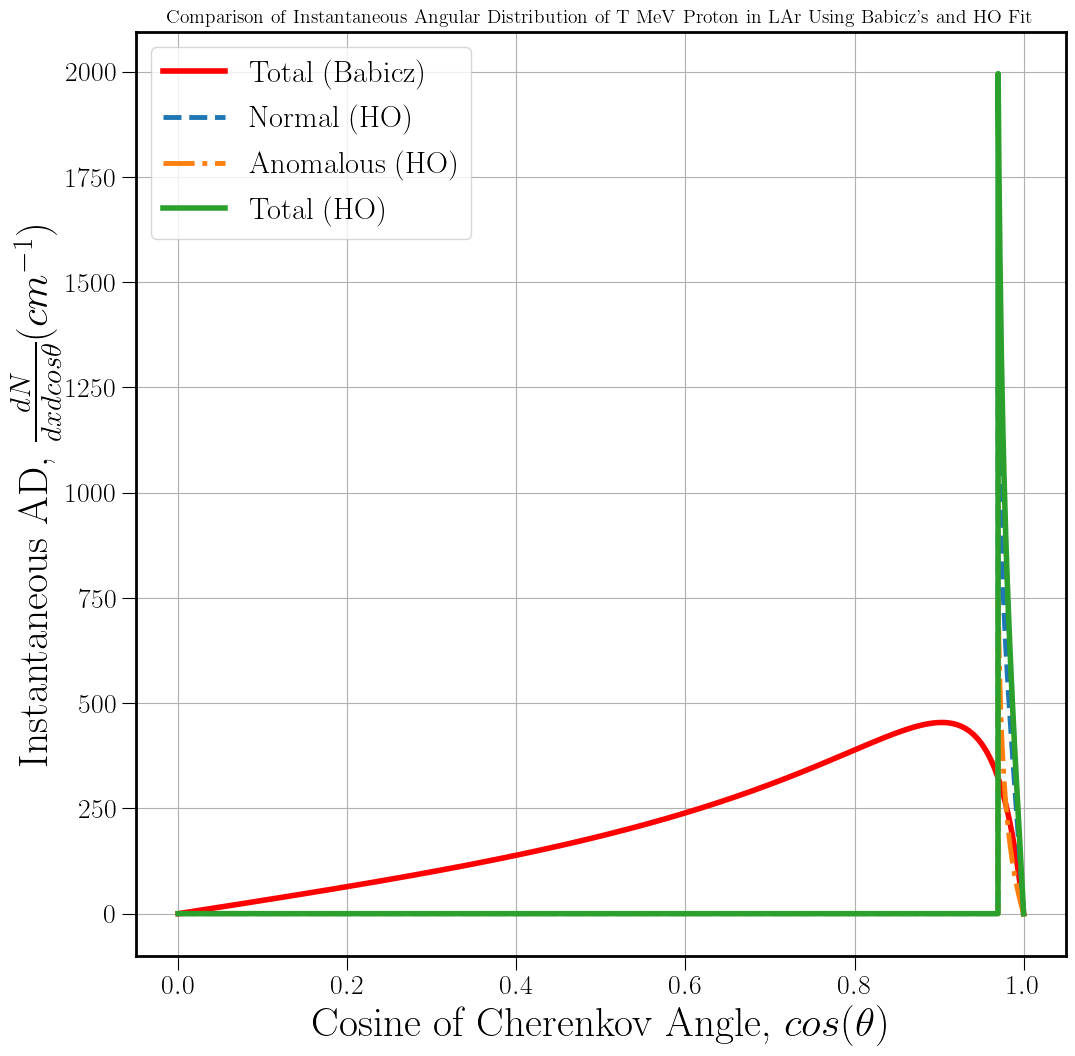

In [39]:
#Instantaneous AD with HO fit: all T (Data Saving Version)

# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 500
# dx = 0.1 #cm

# Choose a filename, ending in .npz
filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p500_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p600_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p700_ho.npz'

filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p500_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p600_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p700_babicz.npz'



alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach #Took Beta = i for instantaneous AD
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 5000)
# x_all = np.linspace(0, 1, 5000)
x_all = np.cos(theta)

lamd = np.linspace(90,700,5000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278

print("beta = {}, n_uv = {}, n_peak = {}, n_asymtote = {}".format(i, n_uvr, n_peakr, n_500, n_asymtoter))

lamd_peak = 115.11 #where n is max 


#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
# lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_uv = 108.657 #in nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 



# # for b in beta: 
# b = 0.7579653181328908 #beta #500 MeV 


# # cerenkovangnsum = []
# # cerenkovangasum = []
# # cerenkovangtsum = []

# cerenkov_alln =  [] #[[] for j in t] #normal
# cerenkov_alla =  [] #[[] for j in t] #anomalous

# cerenkov_all =  [] #[[] for j in t] #total
# scint_all =  []  #[[] for j in t]

# # beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # # print(beta)

# # for j in t: #range(len(t)) 

# cerenkovanglist = []
# cerenkovangsum = [0 for x in x_all]
# cerenkovangnsum = [0 for x in x_all]
# cerenkovangasum = [0 for x in x_all]


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    

cos_ang_min = 1/(i * n_peakr)
cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

for x in x_all: 
        
    def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

    def func_angn(x):  #Normal AD_
        
        if x >= cos_ang_min and x <= cos_ang_maxn:
            
            y= 1/(i*x)
            y = np.linspace(y,y,5000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_500 < 1/(i*x) < n_peakr:   
                # lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_500:
                # lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            
    
            d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
            lamdmaxr.append(lmax)
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
        else: 
            return 0 #To avaid getting negative contribution 

    func_angnc = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
    # cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
            
    
    def func_anga(x):  #Anomalous AD
        if x >= cos_ang_min and x <= cos_ang_maxa:
            
            y= 1/(i*x)
            y = np.linspace(y,y,5000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_uvr < 1/(i*x) < n_peakr:   
                lmin = max(lamd[min(idx)], 106.67)
                # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_uvr:
                lmin = 106.67
                # lmax = 500            
    
            lamdminr.append(lmin)
            d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
        else: 
            return 0 #To avaid getting negative contribution 

    func_angac = [func_anga(x) for x in x_all]       
           
    # cerenkovangasum = np.add(func_angac, cerenkovangasum) 
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
    
        
    func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]  # func_angtc = func_angnc + func_angac 
    
    # # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
    np.savez(filename1, theta=theta, costheta=x_all, itotalho=func_angtc, inormalho=func_angnc, ianomalousho=func_angac) #ke=t_arr, 

print(x_all, func_angtc)

# plt.plot(x_all, lamdminr)
# plt.plot(x_all, lamdmaxr)

# plt.plot(x_all, func_angnc)
# plt.plot(x_all, func_angac)
        
# plt.plot(x_all, func_angtc)

# plt.xlim(0.8,1)

print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr using HO fit: {:.3f}" .format(t, sum(func_angtc)/5000) )#, sum(cerenkovangsum)/5000  * (dx/0.1)


#Babicz

# x = (a_0b + (a_uvb*lamd**2/(lamd**2-lamd_uv**2)) + (a_irb*lamd**2/(lamd**2-lamd_ir**2))) #(ignoring the 3rd term)
# # x = a_0b + a_uvb + a_irb
# n_babics = np.sqrt(1+(3*x/(3-x)))

for x in x_all: 

#     cos_ang_minb = 0
#     cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/i , 1)
# # 
#     # print(cos_ang_minb, cos_ang_maxb)

    
    # def func_angbz(x):
#         if x >= cos_ang_minb and x <= cos_ang_maxb:
#             return (2*np.pi*1e7) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (i * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/i)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
#         else: 
#             return 0 #To avaid getting negative contribution 

        
    def func_angbz(x):
        lamd_thetab = np.sqrt(((a_0b - 3) + (i**2 * x**2 * (3 + 2*a_0b))) / ((i**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv
        return (2*np.pi*1e7) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (i * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/i)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
#     print(lamd_thetab, func_angb)
    func_angbz = [func_angbz(x) for x in x_all]
    np.savez(filename2, theta=theta, costheta=x_all, itotalb=func_angbz) #ke=t_arr, #Save data to .npz file

# print(x_all, func_angbz)

print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t, sum(func_angbz)/5000) )#, sum(cerenkovangsum)/5000  * (dx/0.1)


#TeX up labels and text: 

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

#Plotting:   
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# ax.set_title("Instantaneous Angular Distribution of a 500 MeV Proton in LAr Using Babicz's Fit", fontsize= 20)
ax.set_title("Comparison of Instantaneous Angular Distribution of T MeV Proton in LAr Using Babicz's and HO Fit", fontsize= 14)


ax.plot(x_all, func_angbz, linewidth= 4, color= 'r', label= "Total (Babicz)")     #func_angp = f(lamd_pterm): Green plot

#HO fit
ax.plot(x_all, func_angnc, ls='dashed', linewidth= 3.5, label='Normal (HO)') #.format(float(j))) #normal
ax.plot(x_all, func_angac, ls='dashdot', linewidth= 3.5, label='Anomalous (HO)') #.format(float(j))) #anomalous

ax.plot(x_all, func_angtc, linewidth= 4, label='Total (HO)') #.format(float(j))) #total

ax.set_xlabel("Cosine of Cherenkov Angle, $cos(\\theta)$ ",fontsize=30)
ax.set_ylabel("Instantaneous AD, $\\frac{dN}{dx dcos\\theta} (cm^{-1})$",fontsize=30)
ax.grid()
ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.legend(fontsize=22)

# plt.ylim([0,0.0004])
# plt.xlim([0.96,1])

# plt.savefig("angdist_dcostheta_total_betap758_Babicz_lamdmin108p65.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
# plt.savefig("angdist_inst_dcostheta_500MeV_babiczvsho_comparisonplot_dth5000.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

['theta', 'costheta', 'itotalho', 'inormalho', 'ianomalousho']
['theta', 'costheta', 'itotalb']


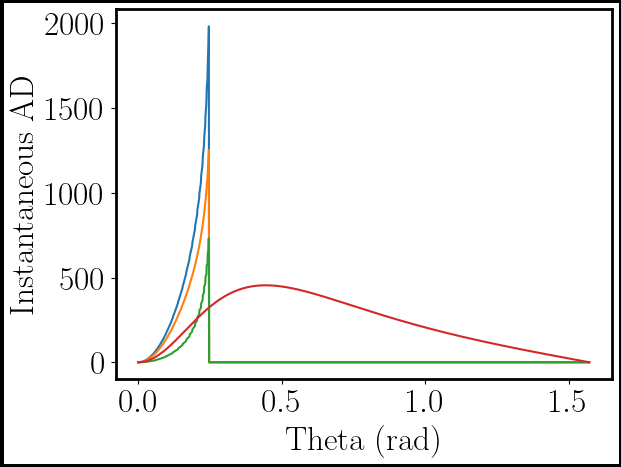

In [57]:
# # Load the saved file
# npzfile = np.load(filename)

# print(npzfile.files) #name of the columns

# Choose a filename, ending in .npz
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p500_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p600_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p700_ho.npz'

# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p500_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p600_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\IAD_data_for_PID\\iCherenkovdata_p700_babicz.npz'

# Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
    # np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

    # np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

# Load the saved file
npzfile1 = np.load(filename1)
npzfile2 = np.load(filename2)

print(npzfile1.files) #name of the columns
print(npzfile2.files) #name of the columns

# Extract the arrays using the argument names you fed to "np.savez"
# ke = npzfile['t_arr']
theta = npzfile1['theta']
costheta = npzfile1['costheta']
itotalho = npzfile1['itotalho']
inormalho = npzfile1['inormalho']
ianomalousho = npzfile1['ianomalousho']
# scint = npzfile1['scint']

itotalb = npzfile2['itotalb']

# Create the plot using the loaded arrays

fig, ax = plt.subplots(edgecolor='black', linewidth=5)
# axis.plot(costheta, totalho)
ax.plot(theta, itotalho)
ax.plot(theta, inormalho)
ax.plot(theta, ianomalousho)
ax.plot(theta, itotalb)

ax.set_xlabel('Theta (rad)')
ax.set_ylabel('Instantaneous AD')

# axis.plot(costheta, scint)
# axis.plot(costheta, totalho+scint)
plt.savefig("angdist_inst_dtheta_500MeV_babiczvsho_comparisonplot.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
plt.show()

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.2278
beta= 0.7579653181328908, cos_ang_min= 0.969732876547658, cos_ang_maxN= 1, cos_ang_maxA= 1


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\822991109.py:127: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\822991109.py:166: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


[0.00000000e+00 2.00040008e-04 4.00080016e-04 ... 9.99599920e-01
 9.99799960e-01 1.00000000e+00] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

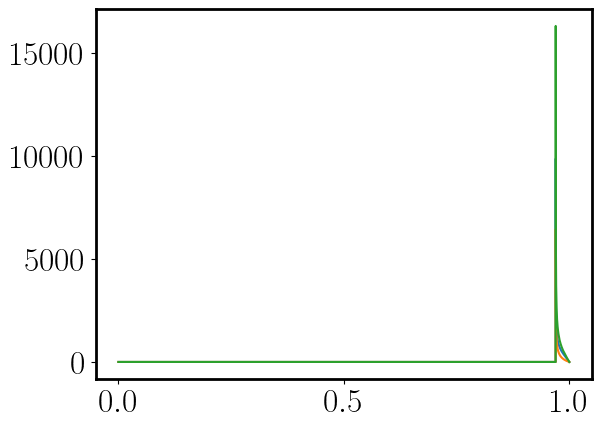

In [29]:
#Instantaneous AD with HO fit: 500 MeV 

# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 500
# dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 5000)
x_all = np.linspace(0, 1, 5000)
x = np.cos(theta)

lamd = np.linspace(90,700,5000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


# cerenkovangnsum = []
# cerenkovangasum = []
# cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]
cerenkovangasum = [0 for x in x_all]

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    

cos_ang_min = 1/(i * n_peakr)
cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

for x in x_all: 
        
    def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))
    
           
    # print(j, i, lamdminr, lamdmaxr)
    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

    def func_angn(x):  #Normal AD_
        
        if x >= cos_ang_min and x <= cos_ang_maxn:
            
            y= 1/(i*x)
            y = np.linspace(y,y,5000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_500 < 1/(i*x) < n_peakr:   
                # lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_500:
                # lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            
    
            d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
            lamdmaxr.append(lmax)
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
        else: 
            return 0 #To avaid getting negative contribution 

    func_angnc500 = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
    # cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
            
    
    def func_anga(x):  #Anomalous AD
        if x >= cos_ang_min and x <= cos_ang_maxa:
            
            y= 1/(i*x)
            y = np.linspace(y,y,5000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_uvr < 1/(i*x) < n_peakr:   
                lmin = max(lamd[min(idx)], 106.67)
                # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_uvr:
                lmin = 106.67
                # lmax = 500            
    
            lamdminr.append(lmin)
            d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
        else: 
            return 0 #To avaid getting negative contribution 

    func_angac500 = [func_anga(x) for x in x_all]       
           
    # cerenkovangasum = np.add(func_angac, cerenkovangasum) 
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
    
        
    func_angtc500 = [(func_angn(x) + func_anga(x)) for x in x_all]  
            # func_angtc = func_angnc + func_angac 
print(x_all, func_angtc500)

# plt.plot(x_all, lamdminr)
# plt.plot(x_all, lamdmaxr)

plt.plot(x_all, func_angnc500)
plt.plot(x_all, func_angac500)
        
plt.plot(x_all, func_angtc500)
    
print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr using HO fit: {:.3f}" .format(t, sum(func_angtc500)/5000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


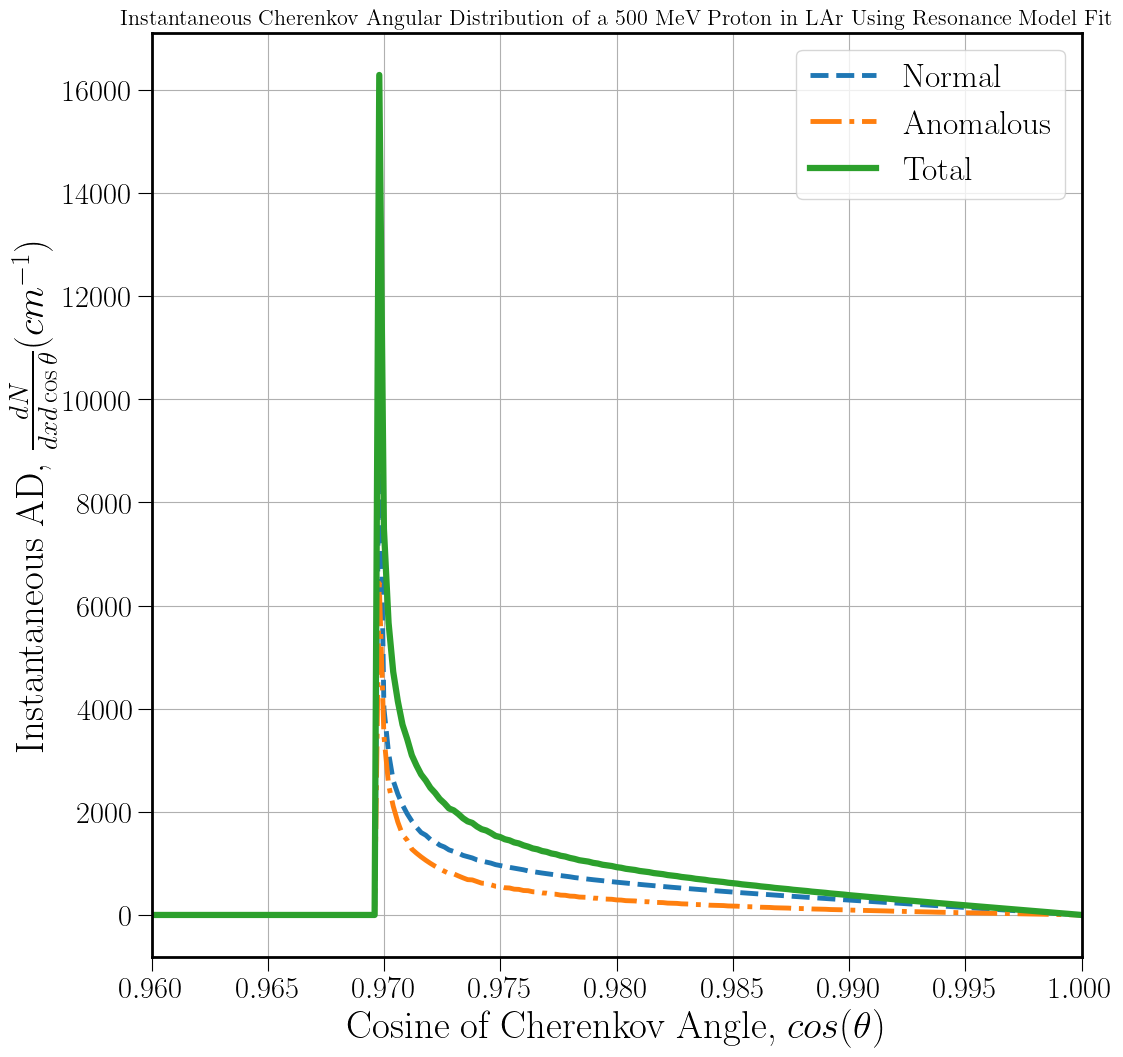

In [652]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Instantaneous Cherenkov Angular Distribution of a 500 MeV Proton in LAr Using HO Model Fit", fontsize= 16) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Instantaneous AD, $\frac{dN}{dx d\cos\theta} (cm^{-1})$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

ax.plot(x_all, func_angnc500, ls='dashed', linewidth= 3.5, label='Normal') #.format(float(j))) #normal
ax.plot(x_all, func_angac500, ls='dashdot', linewidth= 3.5, label='Anomalous') #.format(float(j))) #anomalous

ax.plot(x_all, func_angtc500, linewidth= 4.5, label='Total') #.format(float(j))) #total
    
# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# plt.ylim(0,0.2e7)
plt.xlim(0.96,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=24) #loc='best' ,framealpha=None,shadow=True
# plt.savefig('AD_Cherenkov_HOmodel_500MeV.jpg', bbox_inches= "tight") 
    

C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\138095765.py:30: RuntimeWarning: invalid value encountered in sqrt
  n_babics = np.sqrt(1+(3*x/(3-x)))


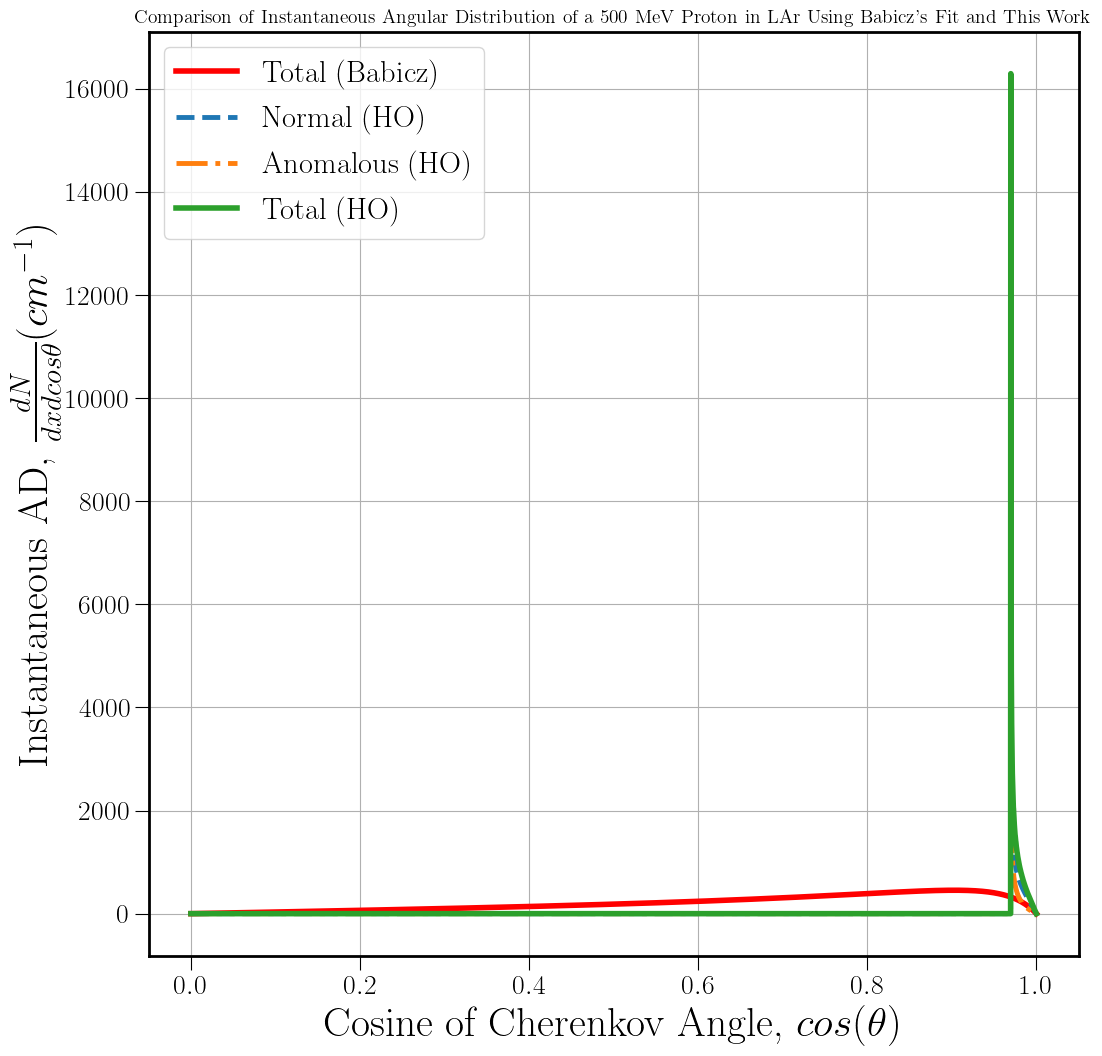

In [900]:
# Babicz Instantaneous AD with lambda_min = 108.657 nm

#AD: BABICS FIT 

alpha = 1/137 #Fine-structure (EM coupling) constant 

lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
# lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_uv = 108.657 #in nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

theta = np.linspace(0, np.pi/2, 5000)
x_all = np.linspace(0, 1, 5000)

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t= 500
mp = 938  #Proton's mass in MeV
# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

x = (a_0b + (a_uvb*lamd**2/(lamd**2-lamd_uv**2)) + (a_irb*lamd**2/(lamd**2-lamd_ir**2))) #(ignoring the 3rd term)
# x = a_0b + a_uvb + a_irb
n_babics = np.sqrt(1+(3*x/(3-x)))

# plt.plot(lamd, n_babics)

# for b in beta: 
b = 0.7579653181328908 #beta

for i in theta: 
    
    lamd_thetab = np.sqrt(((a_0b - 3) + (b**2 * np.cos(theta)**2 * (3 + 2*a_0b))) / ((b**2 * np.cos(theta)**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv
       
    func_angb2 = (2*np.pi*1e7) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
#     print(lamd_thetab, func_angb)
print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz' fit: {:.3f}" .format(t, sum(func_angb2)/5000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# ax.set_title("Instantaneous Angular Distribution of a 500 MeV Proton in LAr Using Babicz's Fit", fontsize= 20)
ax.set_title("Comparison of Instantaneous Angular Distribution of a 500 MeV Proton in LAr Using Babicz's Fit and This Work", fontsize= 14)

# func_angt = func_angp + func_angn

# ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{Normal}$")    #func_angp = f(lamd_pterm): Blue plot
# ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{Anomalous}$")     #func_angp = f(lamd_pterm): Orange plot
# ax.scatter(np.cos(theta), 2*pi*1e7*func_angt, linewidth= 3.5, color= 'g', label= "$(\\frac{dN}{dx dcos\\theta})_{Total}$")     #func_angp = f(lamd_pterm): Green plot

ax.plot(np.cos(theta), func_angb2, linewidth= 4, color= 'r', label= "Total (Babicz)")     #func_angp = f(lamd_pterm): Green plot

#HO fit
ax.plot(x_all, func_angnc500, ls='dashed', linewidth= 3.5, label='Normal (HO)') #.format(float(j))) #normal
ax.plot(x_all, func_angac500, ls='dashdot', linewidth= 3.5, label='Anomalous (HO)') #.format(float(j))) #anomalous

ax.plot(x_all, func_angtc500, linewidth= 4, label='Total (HO)') #.format(float(j))) #total

ax.set_xlabel("Cosine of Cherenkov Angle, $cos(\\theta)$ ",fontsize=30)
ax.set_ylabel("Instantaneous AD, $\\frac{dN}{dx dcos\\theta} (cm^{-1})$",fontsize=30)
ax.grid()
ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.legend(fontsize=22)

# plt.ylim([0,0.0004])
# plt.xlim([0.96,1])

# plt.savefig("angdist_dcostheta_total_betap758_Babicz_lamdmin108p65.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
# plt.savefig("angdist_inst_dcostheta_betap758_babiczvsho_comparisonplot.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716
beta= 0.8198002603953367, cos_ang_min= 0.8965889909841142, cos_ang_maxN= 0.9934918734597551, cos_ang_maxA= 1


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\571725807.py:129: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\571725807.py:165: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

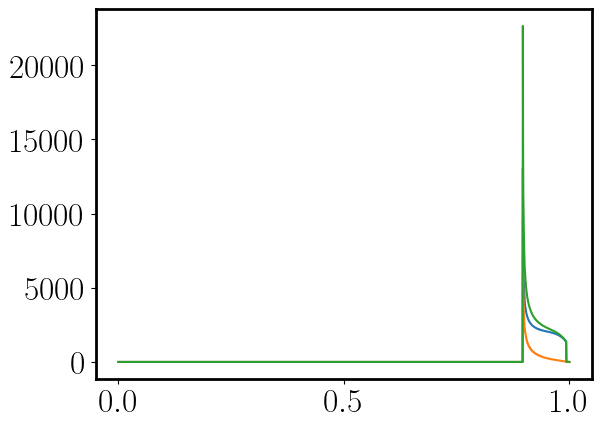

In [43]:
#Instantaneous AD with HO fit: 700 MeV 

# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 700
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)

lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


# cerenkovangnsum = []
# cerenkovangasum = []
# cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]
cerenkovangasum = [0 for x in x_all]

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    

cos_ang_min = 1/(i * n_peakr)

cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

for x in x_all: 
        
    def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))
    
    lamdminr.append(lmin)
    lamdmaxr.append(lmax)
        
    # print(j, i, lamdminr, lamdmaxr)
    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

    def func_angn(x):  #Normal AD_
        
        if x >= cos_ang_min and x <= cos_ang_maxn:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_500 < 1/(i*x) < n_peakr:   
                # lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_500:
                # lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            
    
            d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
        else: 
            return 0 #To avaid getting negative contribution 

    func_angnc700 = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
    # cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
            
    
    def func_anga(x):  #Anomalous AD
        if x >= cos_ang_min and x <= cos_ang_maxa:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_uvr < 1/(i*x) < n_peakr:   
                lmin = max(lamd[min(idx)], 106.67)
                # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_uvr:
                lmin = 106.67
                # lmax = 500            
    
            d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
        else: 
            return 0 #To avaid getting negative contribution 

    func_angac700 = [func_anga(x) for x in x_all]       
           
    # cerenkovangasum = np.add(func_angac, cerenkovangasum) 
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
    
        
    func_angtc700 = [(func_angn(x) + func_anga(x)) for x in x_all]  
            # func_angtc = func_angnc + func_angac 
print(x_all, func_angtc700)

plt.plot(x_all, func_angnc700)
plt.plot(x_all, func_angac700)
        
plt.plot(x_all, func_angtc700)
    
print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t, (sum(func_angtc700) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


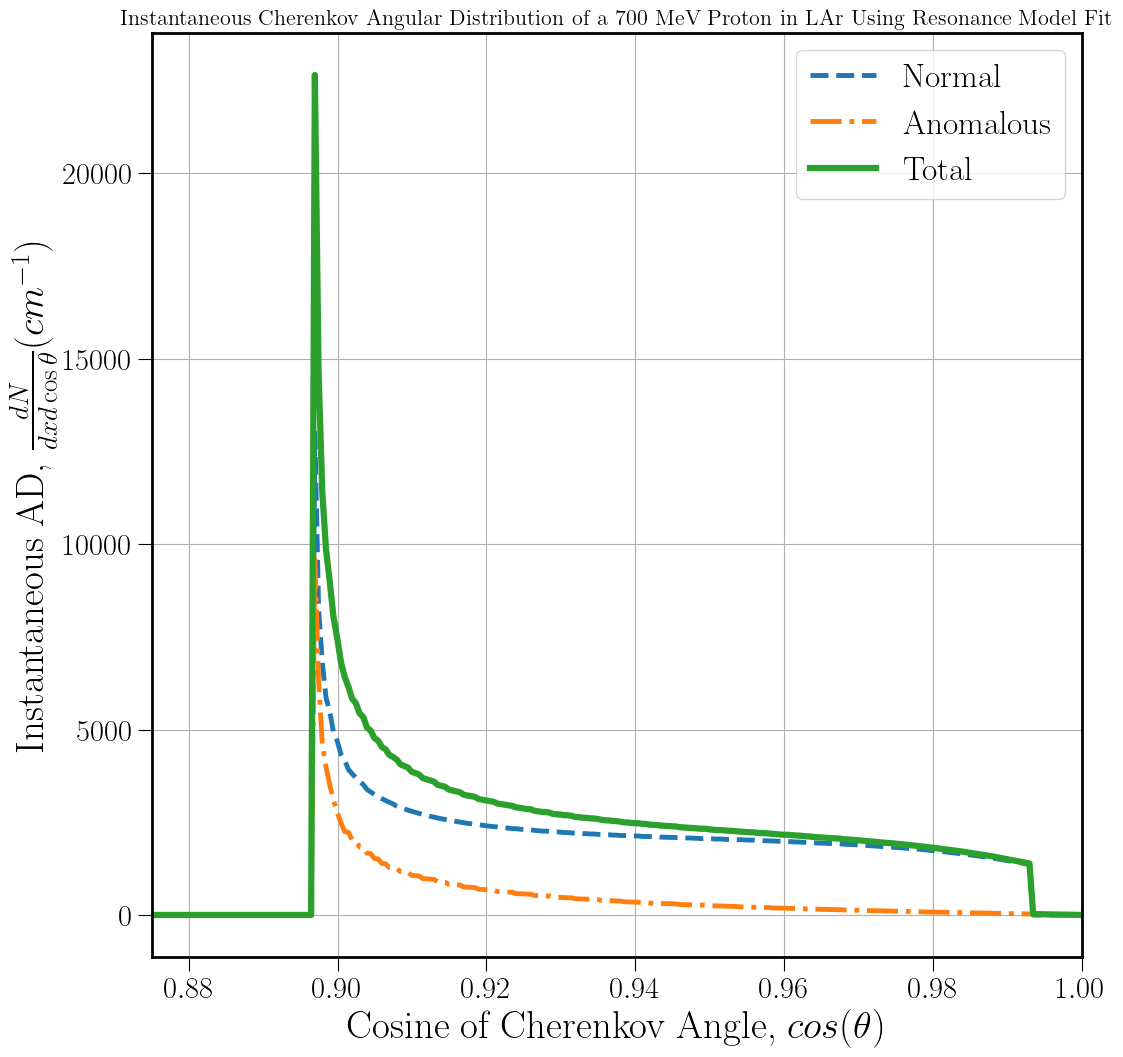

In [379]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Instantaneous Cherenkov Angular Distribution of a 700 MeV Proton in LAr Using Resonance Model Fit", fontsize= 16) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Instantaneous AD, $\frac{dN}{dx d\cos\theta} (cm^{-1})$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

ax.plot(x_all, func_angnc700, ls='dashed', linewidth= 3.5, label='Normal') #.format(float(j))) #normal
ax.plot(x_all, func_angac700, ls='dashdot', linewidth= 3.5, label='Anomalous') #.format(float(j))) #anomalous

ax.plot(x_all, func_angtc700, linewidth= 4.5, label='Total') #.format(float(j))) #total
    
# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# plt.ylim(0,0.2e7)
plt.xlim(0.875,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=24) #loc='best' ,framealpha=None,shadow=True
plt.savefig('AD_Cherenkov_HOmodel_700MeV.jpg', bbox_inches= "tight") 
    

In [40]:
lamd = 500
n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
print(n_jacksonr)


1.2278313552591598


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716
beta= 0.8418569002610763, cos_ang_min= 0.8730983710514503, cos_ang_maxN= 0.9674623992633149, cos_ang_maxA= 1


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3044926284.py:129: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3044926284.py:165: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

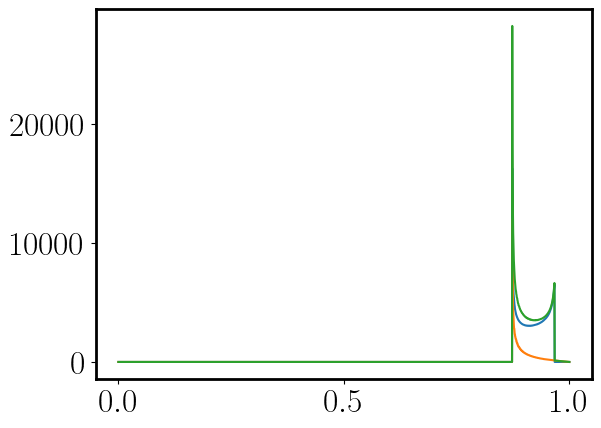

In [46]:
#Instantaneous AD with HO fit: 800 MeV 

# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 800
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)

lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


# cerenkovangnsum = []
# cerenkovangasum = []
# cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]
cerenkovangasum = [0 for x in x_all]

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    

cos_ang_min = 1/(i * n_peakr)

cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

for x in x_all: 
        
    def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))
    
    lamdminr.append(lmin)
    lamdmaxr.append(lmax)
        
    # print(j, i, lamdminr, lamdmaxr)
    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

    def func_angn(x):  #Normal AD_
        
        if x >= cos_ang_min and x <= cos_ang_maxn:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_500 < 1/(i*x) < n_peakr:   
                # lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_500:
                # lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            
    
            d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
        else: 
            return 0 #To avaid getting negative contribution 

    func_angnc800 = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
    # cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
            
    
    def func_anga(x):  #Anomalous AD
        if x >= cos_ang_min and x <= cos_ang_maxa:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_uvr < 1/(i*x) < n_peakr:   
                lmin = max(lamd[min(idx)], 106.67)
                # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_uvr:
                lmin = 106.67
                # lmax = 500            
    
            d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
        else: 
            return 0 #To avaid getting negative contribution 

    func_angac800 = [func_anga(x) for x in x_all]       
           
    # cerenkovangasum = np.add(func_angac, cerenkovangasum) 
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
    
        
    func_angtc800 = [(func_angn(x) + func_anga(x)) for x in x_all]  
            # func_angtc = func_angnc + func_angac 
print(x_all, func_angtc800)

plt.plot(x_all, func_angnc800)
plt.plot(x_all, func_angac800)
        
plt.plot(x_all, func_angtc800)
    
print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t, (sum(func_angtc800) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


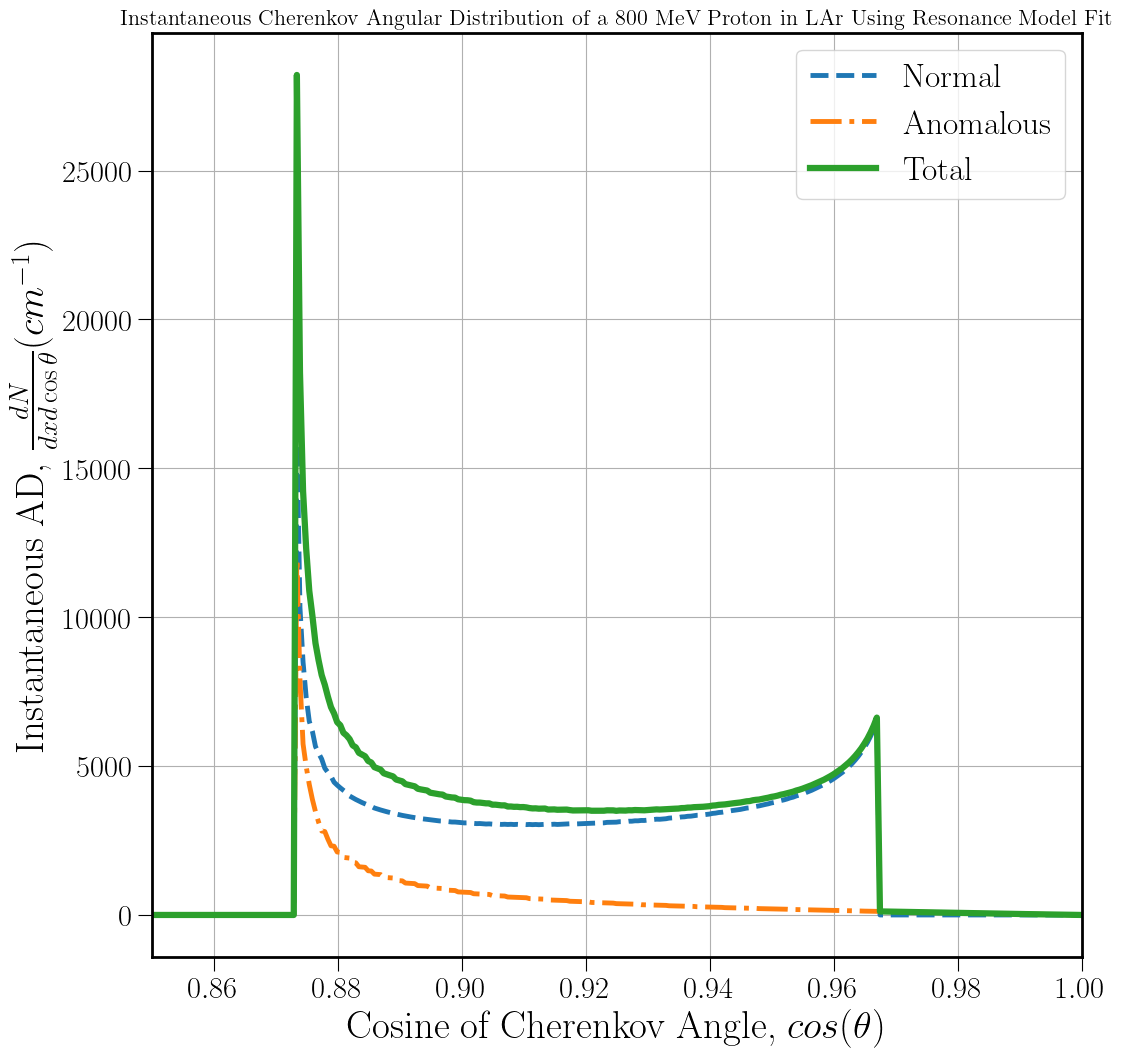

In [382]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Instantaneous Cherenkov Angular Distribution of a 800 MeV Proton in LAr Using Resonance Model Fit", fontsize= 16) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Instantaneous AD, $\frac{dN}{dx d\cos\theta} (cm^{-1})$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

ax.plot(x_all, func_angnc800, ls='dashed', linewidth= 3.5, label='Normal') #.format(float(j))) #normal
ax.plot(x_all, func_angac800, ls='dashdot', linewidth= 3.5, label='Anomalous') #.format(float(j))) #anomalous

ax.plot(x_all, func_angtc800, linewidth= 4.5, label='Total') #.format(float(j))) #total
    
# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# plt.ylim(0,0.2e7)
plt.xlim(0.85,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=24) #loc='best' ,framealpha=None,shadow=True
plt.savefig('AD_Cherenkov_HOmodel_800MeV.jpg', bbox_inches= "tight") 
    

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\1759024218.py:98: RuntimeWarning: divide by zero encountered in scalar divide
  y= 1/(i*x)
C:\Users\hrrah\anaconda3\Lib\site-packages\numpy\core\function_base.py:138: RuntimeWarning: invalid value encountered in scalar subtract
  delta = stop - start
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\1759024218.py:160: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\1759024218.py:196: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com

[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

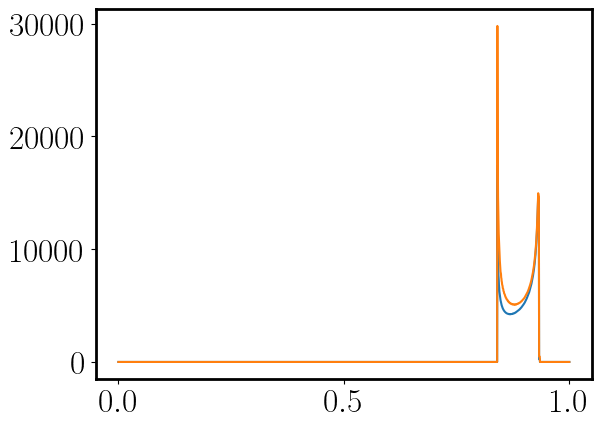

In [106]:
# AD Instantaneous HO/ Jackson fit 1000 MeV

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 1000
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)

lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


cerenkovangnsum = []
cerenkovangasum = []
cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]
cerenkovangasum = [0 for x in x_all]

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

#     funclamd = n_jacksonr - y

#     idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    
theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
        

cos_ang_min = 1/(i * n_peakr)
cos_ang_max = min(1/(i * n_asymtoter), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_max= {}".format(i, cos_ang_min, cos_ang_max))

    
        
            # print(lamd[idx])

for x in x_all: 
    
    y= 1/(i*x)
    y = np.linspace(y,y,2000)   #wavelength of light 
    n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
    funclamd = n_jacksonr - y
    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

    
#     if 1/(i*x) > n_peakr:
#         lmin = lamd_peakr
#         lmax = lamd_peakr
            
#     if n_asymtoter < 1/(i*x) < n_peakr:   
#         lmin = lamd[min(idx)]
#         lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
#     if 1/(i*x) <= n_asymtoter:
#         lmin = max(lamd[min(idx)], 106.67)
#         lmax = 500            
    
    # print(i, x, lmin, lmax)
        
    def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

        
        # d_norm = np.abs(derivative(n2_j, lamd[max(idx)], dx=1e-6)) #value of derivative at a given point
        # d_anom = np.abs(derivative(n2_j, lamd[min(idx)], dx=1e-6)) #value of derivative at a given point
    
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))
    
    lamdminr.append(lmin)
    lamdmaxr.append(lmax)
        
    # print(j, i, lamdminr, lamdmaxr)
    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

    def func_angn(x):  #Normal AD_
        if x >= cos_ang_min and x <= cos_ang_max:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
            if 1/(i*x) > n_peakr:
                lmin = lamd_peakr
                lmax = lamd_peakr
            
            if n_asymtoter < 1/(i*x) < n_peakr:   
                lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_asymtoter:
                lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            
    
            d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
        else: 
            return 0 #To avaid getting negative contribution 

    func_angnc = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
    # cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
            
    
    def func_anga(x):  #Anomalous AD
        if x >= cos_ang_min and x <= cos_ang_max:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
            if 1/(i*x) > n_peakr:
                lmin = lamd_peakr
                lmax = lamd_peakr
            
            if n_asymtoter < 1/(i*x) < n_peakr:   
                lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_asymtoter:
                lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            
    
            d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
        else: 
            return 0 #To avaid getting negative contribution 

    func_angac = [func_anga(x) for x in x_all]       
    # plt.plot(x_all, func_angac)
           
    # cerenkovangasum = np.add(func_angac, cerenkovangasum) 
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
    
        
    func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]  
            # func_angtc = func_angnc + func_angac 
print(x_all, func_angtc)

plt.plot(x_all, func_angnc)
    
plt.plot(x_all, func_angtc)
    
# plt.plot(np.arccos(x_all), lamdminr)
# plt.plot(np.arccos(x_all), lamdmaxr)

# cerenkov_alln.append(func_angnc)
# cerenkov_alla.append(func_angac)
# cerenkov_all.append(func_angtc)
# # #         scint_all[j].append(scint)

print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t, ((func_angtc) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

# plt.plot(x_all, cerenkov_alln)
# # plt.plot(x, cerenkov_alla)
# plt.plot(x_all, cerenkov_all)
# # plt.scatter(x_all, func_angtc)
# t, cerenkovangnsum #, cerenkovangasum



n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716
beta= 0.8750657141671857, cos_ang_min= 0.8399642179740788, cos_ang_maxN= 0.9307471237609825, cos_ang_maxA= 1


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\4064872078.py:129: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\4064872078.py:165: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

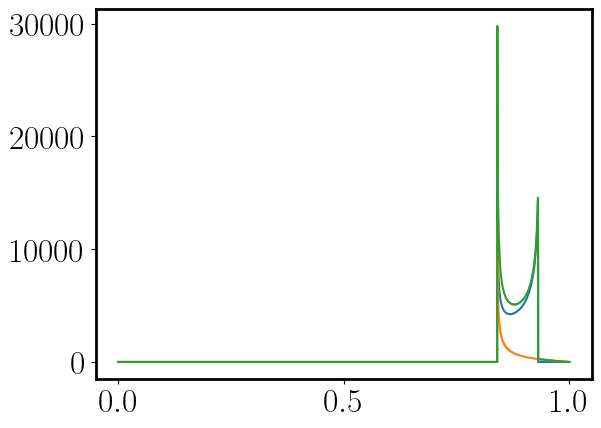

In [68]:
#Instantaneous AD with HO fit: 800 MeV 

# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 1000
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)

lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


# cerenkovangnsum = []
# cerenkovangasum = []
# cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]
cerenkovangasum = [0 for x in x_all]

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    

cos_ang_min = 1/(i * n_peakr)

cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

for x in x_all: 
        
    def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))
    
    lamdminr.append(lmin)
    lamdmaxr.append(lmax)
        
    # print(j, i, lamdminr, lamdmaxr)
    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

    def func_angn(x):  #Normal AD_
        
        if x >= cos_ang_min and x <= cos_ang_maxn:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_500 < 1/(i*x) < n_peakr:   
                # lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_500:
                # lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            
    
            d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
        else: 
            return 0 #To avaid getting negative contribution 

    func_angnc = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
    # cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
            
    
    def func_anga(x):  #Anomalous AD
        if x >= cos_ang_min and x <= cos_ang_maxa:
            
            y= 1/(i*x)
            y = np.linspace(y,y,2000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_uvr < 1/(i*x) < n_peakr:   
                lmin = max(lamd[min(idx)], 106.67)
                # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_uvr:
                lmin = 106.67
                # lmax = 500            
    
            d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
        else: 
            return 0 #To avaid getting negative contribution 

    func_angac = [func_anga(x) for x in x_all]       
           
    # cerenkovangasum = np.add(func_angac, cerenkovangasum) 
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
    
        
    func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]  
            # func_angtc = func_angnc + func_angac 
print(x_all, func_angtc)

plt.plot(x_all, func_angnc)
plt.plot(x_all, func_angac)
        
plt.plot(x_all, func_angtc)
    
print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t, (sum(func_angtc) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


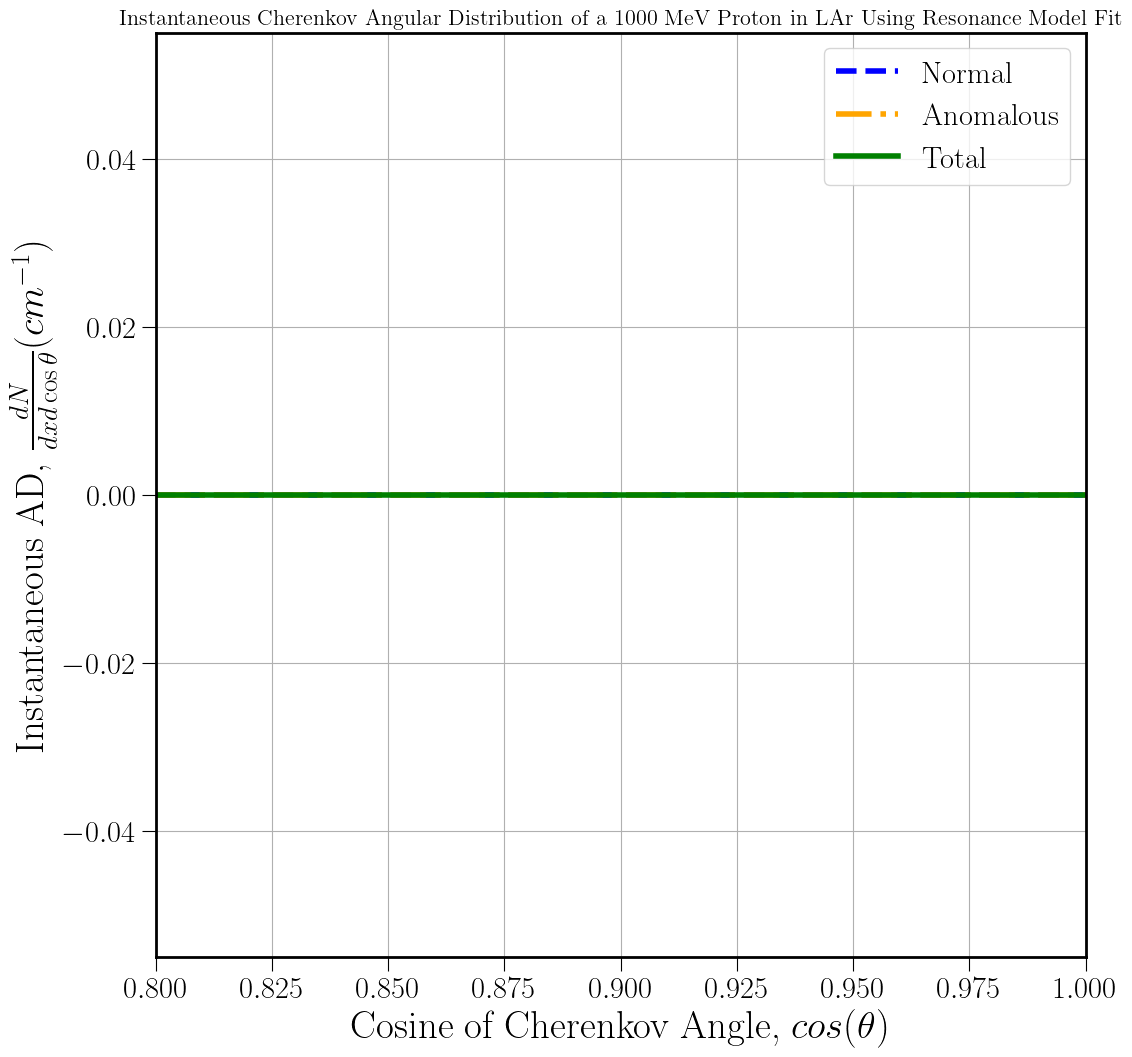

In [383]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Instantaneous Cherenkov Angular Distribution of a 1000 MeV Proton in LAr Using Resonance Model Fit", fontsize= 16) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Instantaneous AD, $\frac{dN}{dx d\cos\theta} (cm^{-1})$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

ax.plot(x_all, func_angnc, ls='dashed', linewidth= 4, c='b', label='Normal'.format(float(j))) #normal
ax.plot(x_all, func_angac, ls='dashdot', linewidth= 4, c='orange', label='Anomalous'.format(float(j))) #anomalous

ax.plot(x_all, func_angtc, linewidth= 4, c= 'g', label='Total'.format(float(j))) #total
    
# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# plt.ylim(0,0.2e7)
plt.xlim(0.80,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=22) #loc='best' ,framealpha=None,shadow=True
# plt.savefig('AD_Cherenkov_HOmodel_1000MeV.jpg', bbox_inches= "tight") 
    

# AD

In [62]:
#Defining a function to calculate the betalist for some given initial K.E of Proton in LAr
#Calculating range of Proton of different initial KE travelling in LAr: 

t_arr = np.array([383.96156,385,400,450,500,550,600,650,700,750,800,850,900,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

rho = 1.38 #density of LAr in kg/m^3 at 89K temperature  
me = 9.11e-31 #Electron's mass in Kg.
io = 23.6e-6  #Average Ionization Potential of LAr in MeV
k =  0.307  #Constant in MeV.cm^2/g 
zb = 18  #Atomic No of Ar (absorber)
a = 39.948  #Mass no of Ar (absorber)
zs = 1 #charge of the particle 
c = 3e8
e = me*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)
mp = 938 #Proton's mass in MeV/c^2 
k1 = k*rho*zb*zs**2/a
k2 = 2*e/io 

# lamd = np.linspace(100,200,925)   #wavelength of light 


#def make_first_list(t):


def make_betalist(t,x,dx):
    ''' t = t_list input from data'''
    
    
    xlist = []
    tlist = [] 
    tslope = []
    betalist = []
    
#     x = 0 #in cm 
#     dx = 0.01 #in cm 
    
    while t>0: 
        
        beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
        t_slope = (((k1*np.log(k2*(beta**2/(1-beta**2))))/beta**2) - k1)
        t = t - (t_slope * dx)
        tslope.append(t_slope)
        tlist.append(t)
        betalist.append(beta)

        x=x+dx    
        xlist.append(x)
        
#       print(t, beta, xlist)
         
    #Linear Interpolation: 

    if (len(tlist)>1)  and (len(xlist)>1):
    
        tnp1 = tlist[-1]
        tnp2 = tlist[-2]
        xnp1 = xlist[-1]
        xnp2 = xlist[-2]
        
        rang = xnp2 - (tnp2 * ((xnp1-xnp2)/(tnp1 - tnp2))) #Range of Proton: Relativistic approach 
#         print(betalist)
        
        return betalist  #range


betalist_500 = make_betalist(500,0,0.01)
# print(betalist_500)


In [40]:
#Integrated AD with HO fit: 500 MeV 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([500])
# t = 500
dx = 0.01 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
# a_0 = 1.18416
# a_pvs = 0.000325985
# gamma = 0.000693652
# n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 5000)
x_all = np.linspace(0, 1, 5000)
x = np.cos(theta)
dx = 0.01

lamd = np.linspace(90,700,5000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


# cerenkov_alln =  [] #[[] for j in t] #normal
# cerenkov_alla =  [] #[[] for j in t] #anomalous

# cerenkov_all =  [] #[[] for j in t] #total
# scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []
    
# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# cerenkovfinallist = []
# cerenkovtsum500 = []

for j in t: 

    cerenkovangnsum500 = [0 for x in x_all]
    cerenkovangasum500 = [0 for x in x_all]

    cerenkovangtsum500 = [0 for x in x_all]
   
    mybetalist = make_betalist(j,0,0.01)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    
    for i in filtered_lst_res:  #[0:20]

        cos_ang_min = 1/(i * n_peakr)
        cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
        cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        def func_angn(x):  #Normal AD_
        
            if x >= cos_ang_min and x <= cos_ang_maxn:
            
                y= 1/(i*x)
                y = np.linspace(y,y,5000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
           
                    
                # if 1/(i*x) > n_peakr:
                # lmin = lamd_peakr
                # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    # lmin = lamd[min(idx)]
                    lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                    # if 1/(i*x) <= n_500:
                    #     # lmin = max(lamd[min(idx)], 106.67)
                    #     lmax = 500            

                    # lamdminr.append(lmin)
                lamdmaxr.append(lmax)
        
                    # print(j, i, lamdminr, lamdmaxr)
                    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
            else: 
                return 0 #To avaid getting negative contribution 

        func_angnc500t = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
            
    
        def func_anga(x):  #Anomalous AD
        
            if x >= cos_ang_min and x <= cos_ang_maxa:
            
                y= 1/(i*x)
                y = np.linspace(y,y,5000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
                # if 1/(i*x) > n_peakr:
                # lmin = lamd_peakr
                # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    lmin = max(lamd[min(idx)], 106.67)
                    # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                    
                lamdminr.append(lmin)
                    # lamdmaxr.append(lmax)
        
    # print(j, i, lamdminr, lamdmaxr)
    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
            else: 
                return 0 #To avaid getting negative contribution 

        func_angac500t = [func_anga(x) for x in x_all]       
           
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
           
        func_angtc500t = [(func_angn(x) + func_anga(x)) for x in x_all]
            
        cerenkovangnsum500 = np.add(func_angnc500t, cerenkovangnsum500) 
        cerenkovangasum500 = np.add(func_angac500t, cerenkovangasum500) 
        cerenkovangtsum500 = np.add(func_angtc500t, cerenkovangtsum500)
            # func_angtc = func_angnc + func_angac 

    print(x_all, cerenkovangtsum500)

    plt.plot(x_all, cerenkovangnsum500)
    plt.plot(x_all, cerenkovangasum500)
        
    plt.plot(x_all, cerenkovangtsum500)
    
    print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t, (sum(cerenkovangtsum500) * (dx/0.1))/5000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125984\3676766353.py:137: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125984\3676766353.py:176: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


[0.00000000e+00 2.00040008e-04 4.00080016e-04 ... 9.99599920e-01
 9.99799960e-01 1.00000000e+00] [   0.            0.            0.         ... 3260.31025937 1528.9636503
    0.        ]
Total Cerenkov photons emitted by a [500] Mev Proton in LAr: 196.048


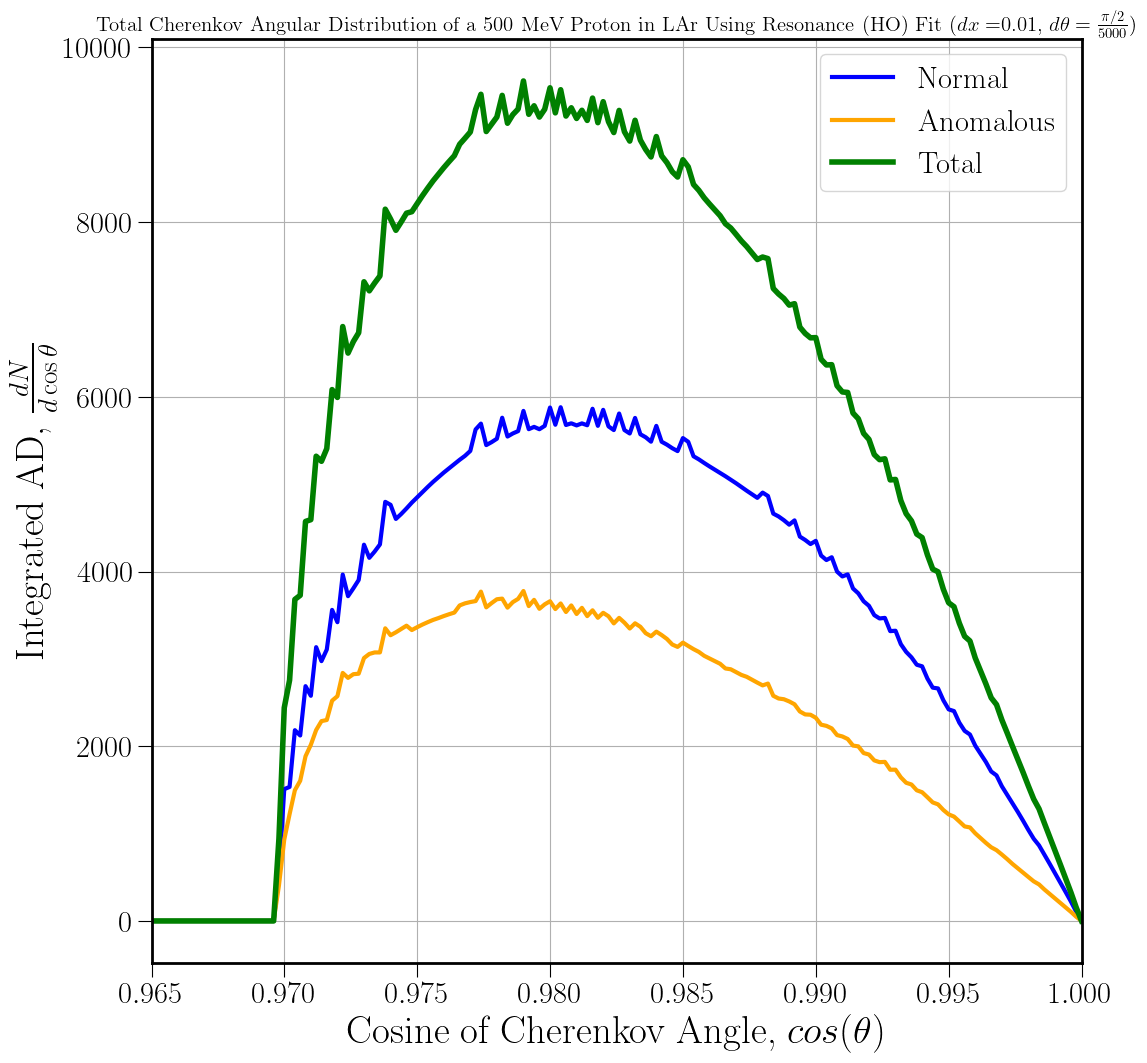

In [893]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Total Cherenkov Angular Distribution of a 500 MeV Proton in LAr Using Resonance (HO) Fit ($dx=$0.01, $d\theta=\frac{\pi/2}{5000}$)", fontsize= 15) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

ax.plot(x_all, cerenkovangnsum500*(dx/0.1), linewidth= 3, c='b', label='Normal'.format(float(j))) #normal
ax.plot(x_all, cerenkovangasum500*(dx/0.1), linewidth= 3, c='orange', label='Anomalous'.format(float(j))) #anomalous

ax.plot(x_all, cerenkovangtsum500*(dx/0.1), linewidth= 4, c= 'g', label='Total'.format(float(j))) #total
    
# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# plt.ylim(0,0.2e7)
plt.xlim(0.965,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=22) #loc='best' ,framealpha=None,shadow=True
# plt.savefig('AD_Total_Cherenkov_HOmodel_500MeV_dxp1dth2k.jpg', bbox_inches= "tight") 
# plt.savefig('AD_Total_Cherenkov_HOmodel_500MeV_dxp01dth5k.jpg', bbox_inches= "tight") 
    

Total Cherenkov photons emitted by a 500 Mev Proton in LAr using Babicz's fit: 10321.590


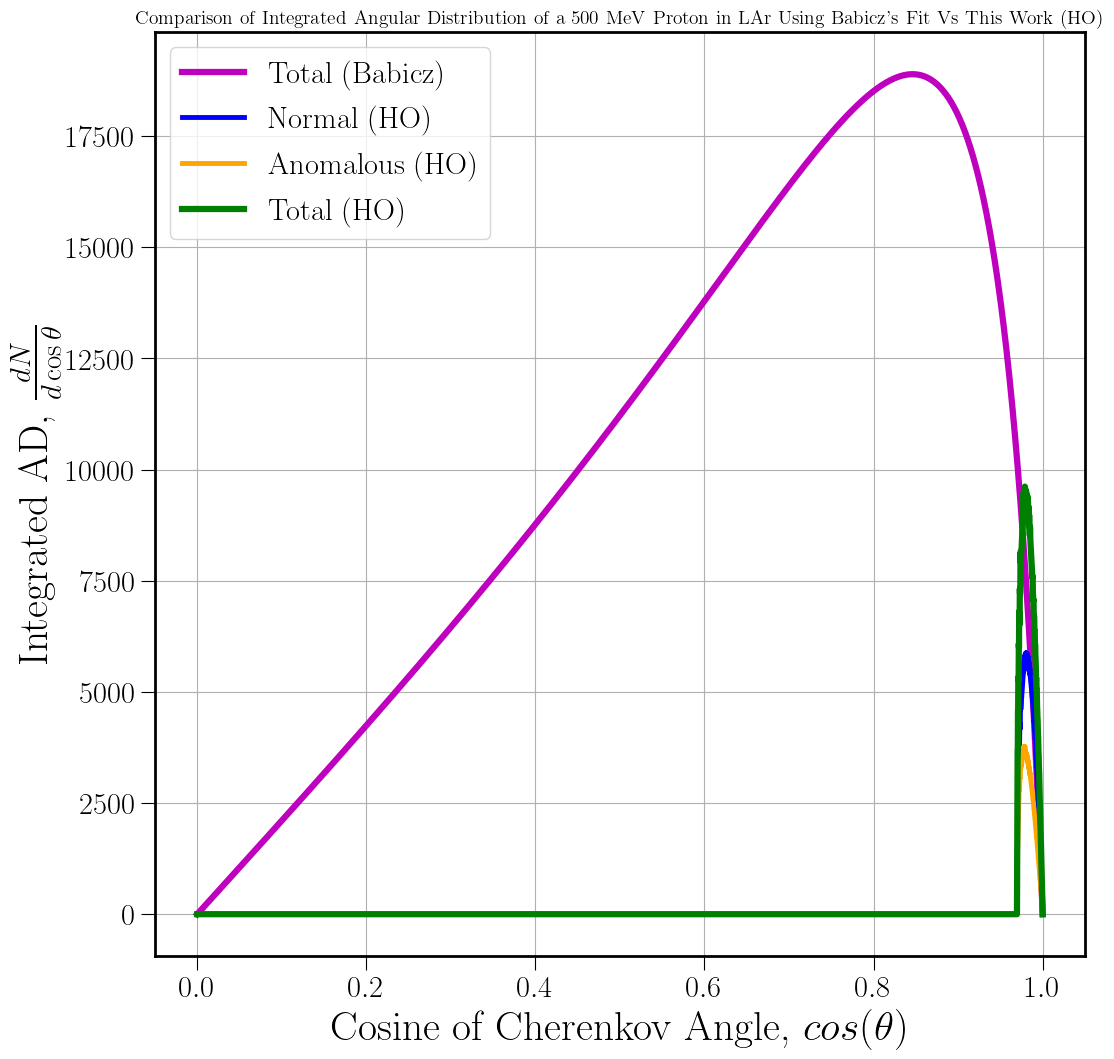

In [898]:
#Integrated Angular Distribution of Cerenkov Radiation (Babicz Fit)

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
# lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_uv = 108.657 #in nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

theta = np.linspace(0, np.pi/2, 5000)
x_all = np.linspace(0, 1, 5000)
x = np.cos(theta)
dx = 0.1

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.68,700,750,800,850,900,950,1000]) #,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# t = np.array([200,400,500,600,678.78,700,750]) #,800,900,1000 #,500 #,550,600,650,697.678,700,750,800,850,900,950,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([700,750]) #,800,900,1000 #,500 #,550,600,650,697.678,700,750,800,850,900,950,1000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# t = np.array([383.962,400,500]) #,600,650,700,750,800,815,820,850]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([700,750,800,805,810])

t = np.array([500])

#Scintillation 
cerenkovangsum = []

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Comparison of Integrated Angular Distribution of a 500 MeV Proton in LAr Using Babicz's Fit Vs This Work (HO)", fontsize= 14)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=30)
#     ax.grid()
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

for j in t: 

    cerenkovanglistb = []
    cerenkovangsumb = [0 for x in x_all]
    
    mybetalist = make_betalist(j,0,0.1)
#     print(j, mybetalist)
#     filtered_betalist = [x for x in mybetalist if x > 0.7046534357] 
#     print(j, np.shape(filtered_betalist), filtered_betalist)

    scintp = 40000*j*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
    scint = np.linspace(scintp, scintp, 2000)


    for b in mybetalist: 
        
            
#         cos_ang_min = 1/(b*n_max)
#         print(j,b)
        cos_ang_minb = 0
        cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)
    
        def func_ang_babics(x):
            
            lamd_thetab = np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv

            func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
#             func_ang_babics = ((2*np.pi*4/10) * (alpha/(9 * a_0b * a_uvb * lamd_thetab**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) - (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))/b) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(1/2))  
#             print(j,b,lamd_theta,func_ang_grace)
            if x >= cos_ang_minb and x <= cos_ang_maxb:
                return func_ang_babics #total ang distr
            else: 
                return 0 #To avaid getting negative contribution 
# #     print(b)

           
        func_ang_babicsc = [func_ang_babics(x) for x in x_all]  
        
#         print(func_ang_babicsc) #, cerenkovangsumg
        
# cerenkovanglist.append(func_angtc) #indices 0,1 = int,err
        cerenkovangsumb = np.add(func_ang_babicsc, cerenkovangsumb)
#         print(cerenkovangsumb)
        
        
#     print("Total Cherenkov photons emitted by a {} Mev Proton in LAr using Grace fit: {:.3f}" .format(j, (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
    print("Total Cherenkov photons emitted by a {} Mev Proton in LAr using Babicz's fit: {:.3f}" .format(j, (np.nansum(cerenkovangsumb) * (dx/0.1))/5000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
    
    ax.plot(x_all, cerenkovangsumb, linewidth= 4.5, color= 'm', label= "Total (Babicz)")
    
    #HO fit: 
    ax.plot(x_all, cerenkovangnsum500*(0.01/0.1), linewidth= 3.5, c='b', label='Normal (HO)'.format(float(j))) #normal
    ax.plot(x_all, cerenkovangasum500*(0.01/0.1), linewidth= 3.5, c='orange', label='Anomalous (HO)'.format(float(j))) #anomalous

    ax.plot(x_all, cerenkovangtsum500*(0.01/0.1), linewidth= 4.5, c= 'g', label='Total (HO)'.format(float(j))) #total

# #     ax.plot(x_all, scint)  #40000*500*0.275
#     plt.show()
# #     plt.plot(x_all, scint)
# #     plt.yscale("log")

#     plt.xlim(0.8,1)
# #     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
#     plt.ylim(0,0.2e7)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=22) #loc='best' ,framealpha=None,shadow=True
# plt.savefig('AD_Cherenkov_Babicz_dxp1dth2000_10to1600MeV.jpg', bbox_inches= "tight") #_10to1000MeV

# plt.savefig('AD_Cherenkov_Babicz_dxp1dth2000_500MeV.jpg', bbox_inches= "tight")    
# plt.savefig('angdist_total_dcostheta_babiczvsho_500MeV_comparisonplot.jpg', bbox_inches= "tight")    

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1720739699.py:136: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1720739699.py:175: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00] [    0.             0.             0.         ... 54842.71297723
 27365.8869716      0.        ]
Total Cerenkov photons emitted by a [1500] Mev Proton in LAr (HO Fit): 216045.326


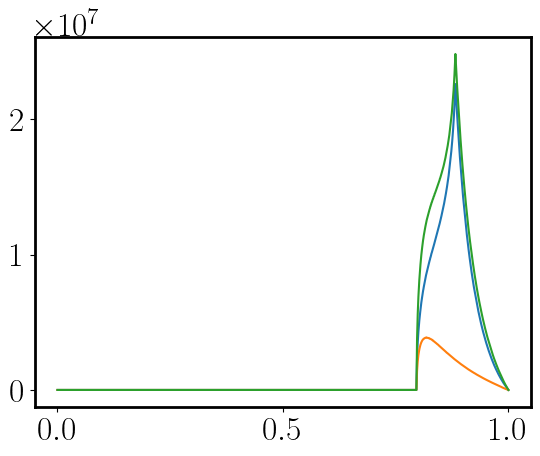

In [245]:
#Integrated AD with HO fit: 500 MeV 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t = np.array([1500])
# t = 500
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
# a_0 = 1.18416
# a_pvs = 0.000325985
# gamma = 0.000693652
# n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.01

lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


# cerenkov_alln =  [] #[[] for j in t] #normal
# cerenkov_alla =  [] #[[] for j in t] #anomalous

# cerenkov_all =  [] #[[] for j in t] #total
# scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []
    
# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# cerenkovfinallist = []
# cerenkovtsum500 = []

for j in t: 

    cerenkovangnsumhot = [0 for x in x_all]
    cerenkovangasumhot = [0 for x in x_all]

    cerenkovangtsumhot = [0 for x in x_all]
   
    mybetalist = make_betalist(j,0,0.01)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    
    for i in filtered_lst_res:  #[0:20]

        cos_ang_min = 1/(i * n_peakr)
        cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
        cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        def func_angn(x):  #Normal AD_
        
            if x >= cos_ang_min and x <= cos_ang_maxn:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
           
                    
                # if 1/(i*x) > n_peakr:
                # lmin = lamd_peakr
                # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    # lmin = lamd[min(idx)]
                    lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                    # if 1/(i*x) <= n_500:
                    #     # lmin = max(lamd[min(idx)], 106.67)
                    #     lmax = 500            

                    # lamdminr.append(lmin)
                lamdmaxr.append(lmax)
        
                    # print(j, i, lamdminr, lamdmaxr)
                    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
            else: 
                return 0 #To avaid getting negative contribution 

        func_angnchot = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
            
    
        def func_anga(x):  #Anomalous AD
        
            if x >= cos_ang_min and x <= cos_ang_maxa:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
                # if 1/(i*x) > n_peakr:
                # lmin = lamd_peakr
                # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    lmin = max(lamd[min(idx)], 106.67)
                    # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                    
                lamdminr.append(lmin)
                    # lamdmaxr.append(lmax)
        
    # print(j, i, lamdminr, lamdmaxr)
    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
            else: 
                return 0 #To avaid getting negative contribution 

        func_angachot = [func_anga(x) for x in x_all]       
           
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
           
        func_angtchot = [(func_angn(x) + func_anga(x)) for x in x_all]
            
        cerenkovangnsumhot = np.add(func_angnchot, cerenkovangnsumhot) 
        cerenkovangasumhot = np.add(func_angachot, cerenkovangasumhot) 
        cerenkovangtsumhot = np.add(func_angtchot, cerenkovangtsumhot)
            # func_angtc = func_angnc + func_angac 

    print(x_all, cerenkovangtsumhot)

    plt.plot(x_all, cerenkovangnsumhot)
    plt.plot(x_all, cerenkovangasumhot)
        
    plt.plot(x_all, cerenkovangtsumhot)
    
    print("Total Cerenkov photons emitted by a {} Mev Proton in LAr (HO Fit): {:.3f}" .format(t, (sum(cerenkovangtsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


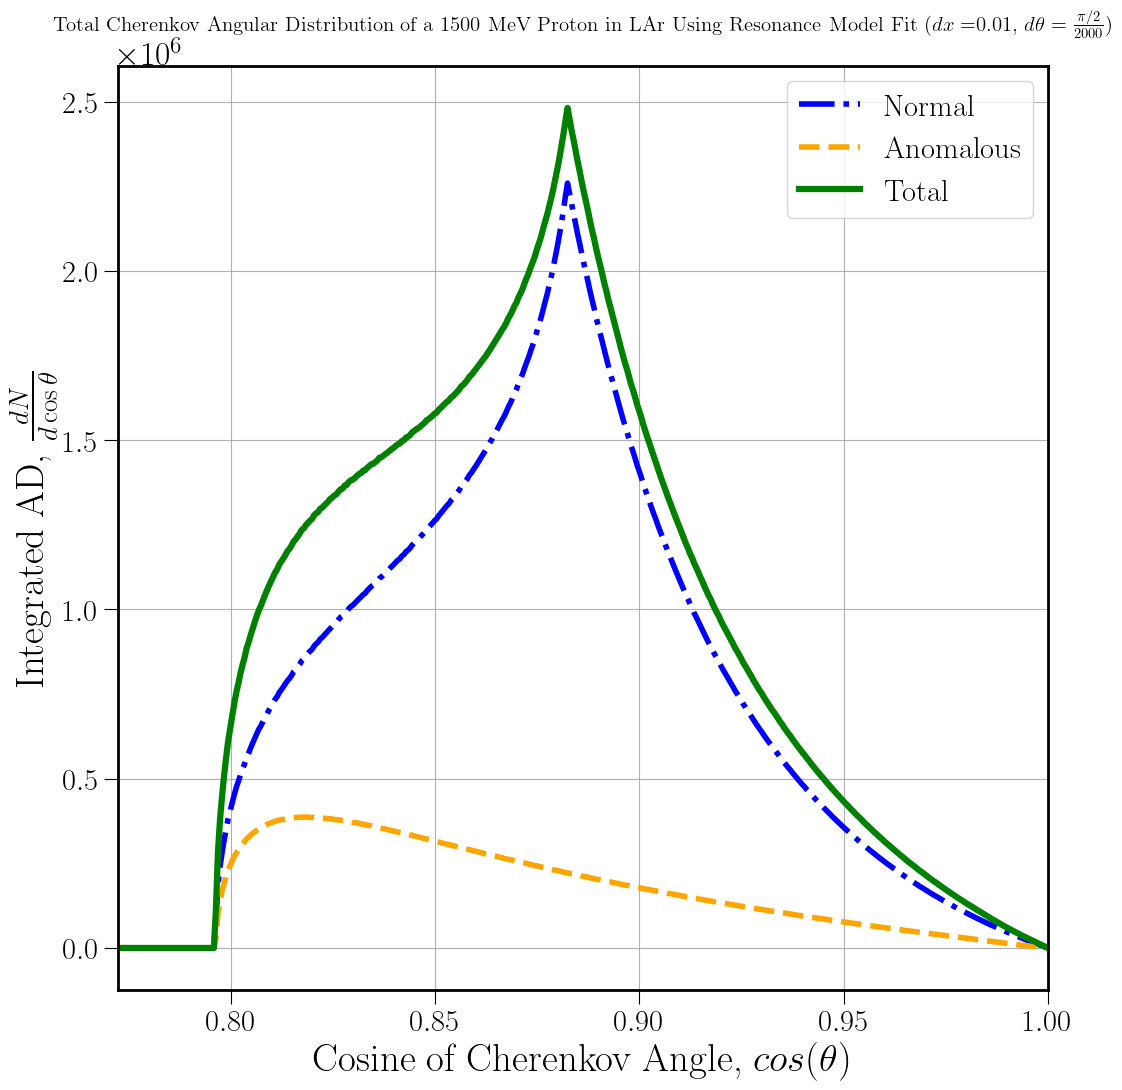

In [247]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

# plt.rc("text", usetex=True)
# plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
# plt.rc('font', size=24) 
# plt.rc('font', family='serif')

# #     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams["font.weight"] = "bold"     
# #     plt.rcParams["axes.labelweight"] = "bold"
# plt.rc('axes', linewidth=2)


ax.set_title(r"Total Cherenkov Angular Distribution of a 1500 MeV Proton in LAr Using Resonance Model Fit ($dx=$0.01, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 15) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

ax.plot(x_all, cerenkovangnsumhot*(dx/0.1), ls='dashdot', linewidth= 4, c='b', label='Normal'.format(float(j))) #normal
ax.plot(x_all, cerenkovangasumhot*(dx/0.1), ls='dashed', linewidth= 4, c='orange', label='Anomalous'.format(float(j))) #anomalous

ax.plot(x_all, cerenkovangtsumhot*(dx/0.1), linewidth= 4.5, c= 'g', label='Total'.format(float(j))) #total
    
plt.xlim([0.97/(n_peakr*filtered_lst_res[0]), 1])
# plt.ylim(0,0.2e7)
# plt.xlim(0.965,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=22) #loc='best' ,framealpha=None,shadow=True
# plt.savefig('AD_Total_Cherenkov_HOmodel_500MeV_dxp1dth2k.jpg', bbox_inches= "tight") 
plt.savefig('AD_Total_Cherenkov_HOmodel_1500MeV_dxp01dth2k.jpg', bbox_inches= "tight") 
    

C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1724153887.py:146: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1724153887.py:188: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 450 Mev Proton in LAr: 0.389
Total Cerenkov photons emitted by a 500 Mev Proton in LAr: 200.542
Total Cerenkov photons emitted by a 600 Mev Proton in LAr: 2670.212
Total Cerenkov photons emitted by a 700 Mev Proton in LAr: 9486.070
Total Cerenkov photons emitted by a 800 Mev Proton in LAr: 22241.969
Total Cerenkov photons emitted by a 1000 Mev Proton in LAr: 62094.038
Total Cerenkov photons emitted by a 1200 Mev Proton in LAr: 116259.639
Total Cerenkov photons emitted by a 1500 Mev Proton in LAr: 216147.885
Total Cerenkov photons emitted by a 2000 Mev Proton in LAr: 412182.522
Total Cerenkov photons emitted by a 2500 Mev Proton in LAr: 628821.502
Total Cerenkov photons emitted by a 3000 Mev Proton in LAr: 856484.543
[[450, 0.3893988858512326], [500, 200.54196066548536], [600, 2670.2120077632144], [700, 9486.069895733595], [800, 22241.96917969575], [1000, 62094.038447192426], [1200, 116259.63945778129], [1500, 216147.88484624555], [2000, 412182.522033

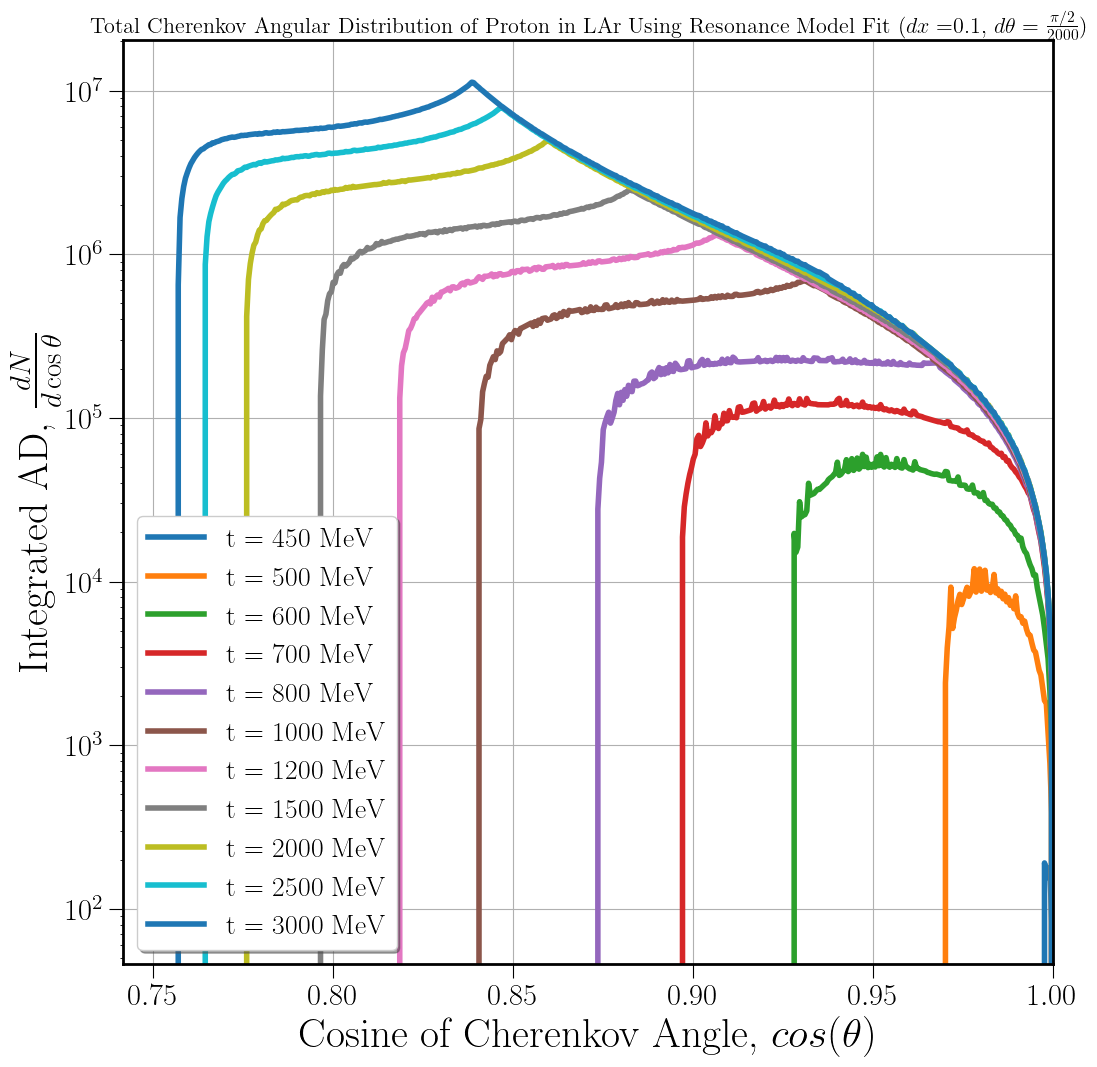

In [791]:
#Integrated AD with HO fit: T MeV 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([440,450,460,470,475,480,490,500])
# t = 500
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd = np.linspace(90,700,2000)

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.1

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278


# print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


cerenkovanglist = []

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []
    

t = np.array([450,500,600,700,800,1000,1200,1500,2000,2500,3000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)



fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title(r"Total Cherenkov Angular Distribution of Proton in LAr Using Resonance Model Fit ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 16) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=30)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)
ax.grid()



cerenkovfinallistho = []
cerenkovtsumallts = []

for j in t: 
    cerenkovtlist = []
    # cerenkovsum = 0
    cerenkovangnsumallt = [0 for x in x_all]
    cerenkovangasumallt = [0 for x in x_all]

    cerenkovangtsumallt = [0 for x in x_all]

#     print(j)
#     print(make_betalist(j))
    
    mybetalist = make_betalist(j,0,0.1)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    
    for i in filtered_lst_res:  #[0:20]

        cos_ang_min = 1/(i * n_peakr)
        cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
        cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        
        def func_angn(x):  #Normal AD_
        
            if x >= cos_ang_min and x <= cos_ang_maxn:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
           
                    
                # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    # lmin = lamd[min(idx)]
                    lmax = lamd[max(idx)] #lamd[idx[1]]
            
                # if 1/(i*x) <= n_500:
                    # lmin = max(lamd[min(idx)], 106.67)
                    # lmax = 500            

                # lamdminr.append(lmin)
                lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
            else: 
                return 0 #To avaid getting negative contribution 

        func_angnc = [func_angn(x) for x in x_all]  
        # print(x_all, func_angnc)
        # plt.plot(x_all, func_angnc)
            
            
    
        def func_anga(x):  #Anomalous AD
        
            if x >= cos_ang_min and x <= cos_ang_maxa:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
               # if 1/(i*x) > n_peakr:
                   # lmin = lamd_peakr
                   # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    lmin = lamd[min(idx)]  #, 106.67)
                   # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                # if 1/(i*x) <= n_uvr:
                    # lmin = 106.67
                    #     # lmax = 500        
                    
                lamdminr.append(lmin)
                # lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
            else: 
                return 0 #To avaid getting negative contribution 

        func_angac = [func_anga(x) for x in x_all]       
           
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
           
        func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]
            
        cerenkovangnsumallt = np.add(func_angnc, cerenkovangnsumallt) 
        cerenkovangasumallt = np.add(func_angac, cerenkovangasumallt) 
        cerenkovangtsumallt = np.add(func_angtc, cerenkovangtsumallt)
            # func_angtc = func_angnc + func_angac 
    cerenkovfinallistho.append(cerenkovtlist)
    cerenkovtsumallts.append(sum(cerenkovangtsumallt) * (dx/0.1)/2000) #conversion factor to standard units
    # print(x_all, cerenkovangtsum)

    # plt.plot(x_all, cerenkovangnsum)
    # plt.plot(x_all, cerenkovangasum)
        
        # ax.plot(x_all, cerenkovangnsum, label='t = {} MeV'.format(float(j)))

    print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(j, sum(cerenkovangtsumallt) * (dx/0.1)/2000)) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
    # ax.grid()

    ax.plot(x_all, cerenkovangtsumallt* (dx/0.1), lw= 4, label='t = {} MeV'.format(j))
    
    plt.yscale("log")
    
    # plt.xlim(0.74,1)
    plt.xlim([0.98/(n_peakr*filtered_lst_res[0]), 1])

list_ad = list(map(list, list(zip(t, cerenkovtsumallts))))
print(list_ad)
    
#     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=20,framealpha=None,shadow=True) #loc='best'fig = plt.figure(figsize=(12,12))
# plt.savefig('AD_HO_resonancefit_allTsnew_dxp1dth2k_logplot.jpg', bbox_inches="tight")
# print(t, sum(cerenkovangtsumallt) * (dx/0.1)/2000)


# AD/Scintillation

In [824]:
##### OVERAll FUNCTION ###### #####

from scipy.misc import derivative


def get_cerenkov(x=0,dx=0.1,plotx1=0.82,plotx2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    alpha = 1/137
    mp = 938  #Proton's mass in MeV
    # beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
    # y = 1/beta
    # y = np.linspace(y,y,2000)   #wavelength of light 

    mp = 938  #Proton's mass in MeV

    lamd_uv = 106.6 #lambda_UV = 106.6 nm
    lamd_ir = 908.3 #lambda_IR = 908.3 nm 
    lamd = np.linspace(90,700,2000)

    #HO/Jackson fit parameters
    a_0j = 1.10232
    a_j = 0.0000105811
    gamma_j = 0.0025239

    lamd_peakr = 124.68 #nm
    n_peakr = 1.3605 #res model peak


    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    # x = np.cos(theta)
    # dx = 0.1

    n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
    n_uvr = a_0j #when lamd -> lamd_UV
    n_500 = 1.2278

    # print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


    cerenkovanglist = []

    n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
    # funclamd = n_jacksonr - y
    # idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

    #     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

    def n2_j(lamd):
            return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

        # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
        # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
        # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


    lamdminr = [[] for j in t]
    lamdmaxr = [[] for j in t]
    
    #Scintillation 
    cerenkovangtsum = []

    cerenkov_all = [[] for j in t]
    scint_all = [[] for j in t]
    
    # cerenkovfinallistho = [[] for j in t]
    # cerenkovtsumallts = [[] for j in t]


    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangsum = [0 for y in x_all]
        cerenkovangnsum = [0 for y in x_all]
        cerenkovangasum = [0 for y in x_all]

        mybetalist = make_betalist(t[j],x,dx)
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
    
        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        
            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                        # lmin = lamd_peakr
                        # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = lamd[max(idx)] #lamd[idx[1]]

                    # if 1/(i*x) <= n_500:
                        # lmin = max(lamd[min(idx)], 106.67)
                        # lmax = 500            

                    # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                    # print(j, i, lamdminr, lamdmaxr)
                    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angnc = [func_angn(y) for y in x_all]  
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)

            
    
            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                   # if 1/(i*x) > n_peakr:
                       # lmin = lamd_peakr
                       # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = lamd[min(idx)]  #, 106.67)
                       # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                    # if 1/(i*x) <= n_uvr:
                        # lmin = 106.67
                        #     # lmax = 500        

                    lamdminr.append(lmin)
                    # lamdmaxr.append(lmax)

                    # print(j, i, lamdminr, lamdmaxr)
                    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angac = [func_anga(y) for y in x_all]       

            func_angtc = [(func_angn(y) + func_anga(y)) for y in x_all]
            
        
            cerenkovangsum = np.add(func_angtc, cerenkovangsum) #Total
            # cerenkovangnsum = np.add(func_angnc, cerenkovangnsum)  #Normal
            # cerenkovangasum = np.add(func_angac, cerenkovangasum) #Anomalous


        cerenkov_all[j].append(cerenkovangsum)
        scint_all[j].append(scint)

        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using HO Fit: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    # colors_all = ['deepskyblue','lime','orchid','darkturquoise','teal','green','firebrick','tomato','navy','purple'] #,'red','blueviolet'
    colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','deepskyblue','olive'] #
   
    
    for i in range(len(t)):
        
#     def make_plot(x_all,scint,ceren)


#         ax.set_title("Total Angular Distribution of a {} MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
        # 
        # func_angt = func_angp + func_angn

        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
        ax.plot(x_all, cerenkov_all[i][0], lw= 3,label= r"{} MeV".format(t[i]), c=colors_all[i])     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
        
        if i==len(t)-1:
            
            ax.plot(x_all, scint_all[i][0],lw=3, ls= 'dashdot', label=r'Scintillation', c=colors_all[i]) #color='black') #, color= 'g'
        
        else:
            ax.plot(x_all, scint_all[i][0],lw=3, ls= 'dashdot', c=colors_all[i]) #color='black') #, color= 'g'

        
#         plt.yscale("log")

    ax.set_title(r"Comparison of Cherenkov Angular Distribution of Protons in LAr with Scintillation", fontsize= 20)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    ax.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=22,length=10)

#     ax.text(0.96,1e2,r'dx={} cm'.format(dx),fontsize=16)
    ax.legend(loc='center left',fontsize=16,framealpha=None,shadow=True)

    plt.xlim([0.98/(n_peakr*filtered_lst_res[0]), 1])

    # plt.xlim(plotx1,plotx2)
    
#     plt.savefig("AD_P_LAr_dxp1dth2000_383to800_normal.jpg", bbox_inches="tight")
# plt.savefig("AD_P_LAr_dxp1dth2000_383to500_normal.jpg", bbox_inches="tight")

#     plt.savefig("AD_comparison_P_LAr_dxp1dth2000_All_normal.jpg", bbox_inches="tight")
#     plt.savefig("AD_comparison_P_LAr_dxp01dth2000_All_normal.jpg", bbox_inches="tight")
#   
    plt.savefig("AD_P_LAr_dxp01dth2000_medT.jpg", bbox_inches="tight")
    
    plt.show()


Please enter one or more t-values in MeV, separated by a comma each 500,600,700,800,900,1000,1200,1500,2000


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\556255725.py:128: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\556255725.py:170: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 500.0 Mev Proton in LAr using HO Fit: 200.542
Total Cerenkov photons emitted by a 600.0 Mev Proton in LAr using HO Fit: 2670.212
Total Cerenkov photons emitted by a 700.0 Mev Proton in LAr using HO Fit: 9486.070
Total Cerenkov photons emitted by a 800.0 Mev Proton in LAr using HO Fit: 22241.969
Total Cerenkov photons emitted by a 900.0 Mev Proton in LAr using HO Fit: 40034.414
Total Cerenkov photons emitted by a 1000.0 Mev Proton in LAr using HO Fit: 62094.038
Total Cerenkov photons emitted by a 1200.0 Mev Proton in LAr using HO Fit: 116259.639
Total Cerenkov photons emitted by a 1500.0 Mev Proton in LAr using HO Fit: 216147.885
Total Cerenkov photons emitted by a 2000.0 Mev Proton in LAr using HO Fit: 412182.522


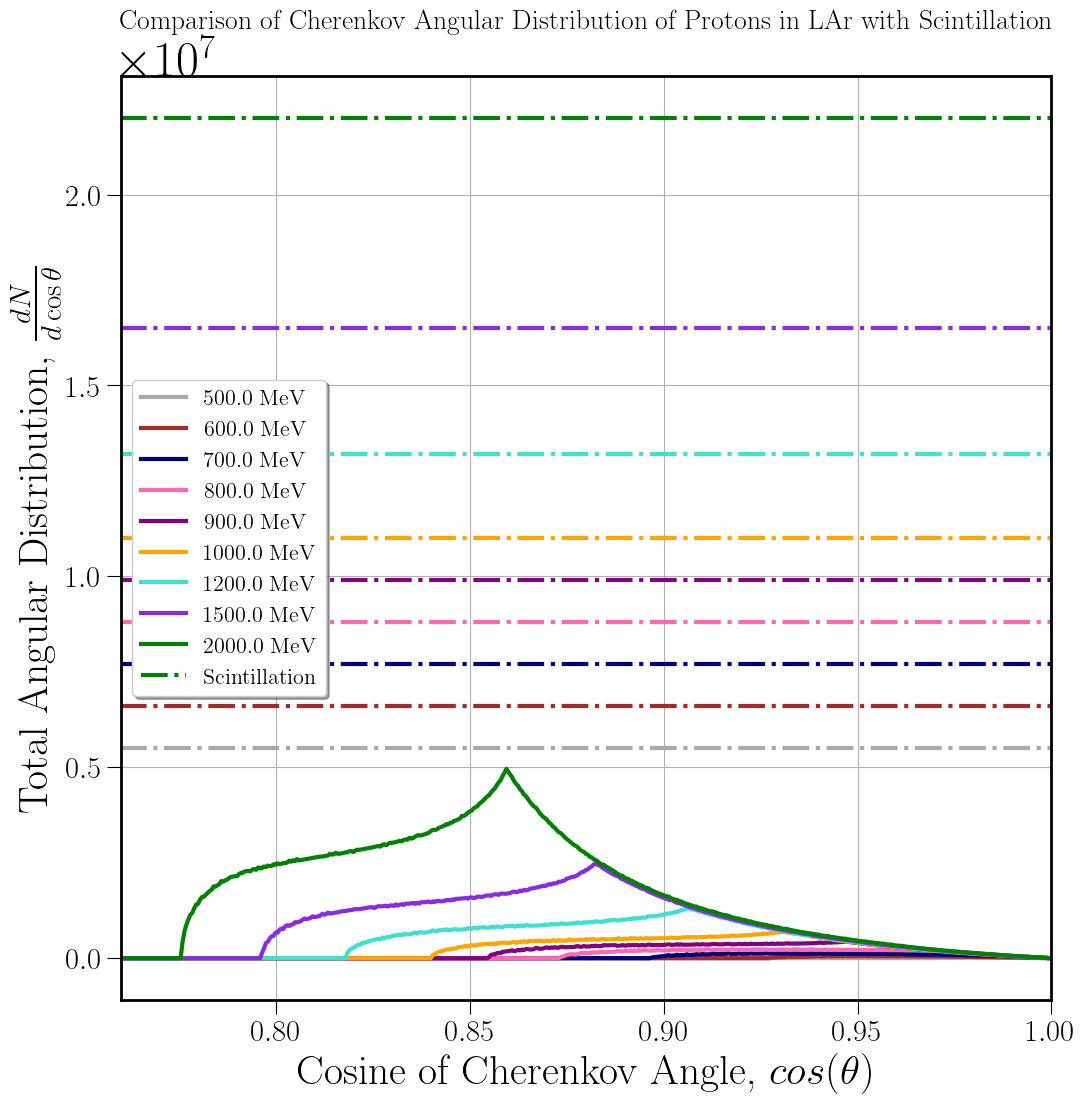

In [825]:
############ RUN THE FUNCTION ###################

# theta = np.linspace(0, np.pi/2, 2000)
# x_all = np.linspace(0, 1, 2000)
# t_arr = np.array([383.96,400,450,500,550,600,650,700,750,800,812]) #,900,1000]]) #initial  K.E of the proton in MeV 500,600,700,800,900,1000,1200
# t = 383.96,400,500,600,650,700,750,800 (450,500,600,700,800,900,1000)

get_cerenkov(x=0,dx=0.1,plotx1=0.98/(n_peakr*filtered_lst_res[0]),plotx2=1)


In [42]:
##### OVERAll FUNCTION ###### ##### NORMAL/ANOMALOUS COMPONENT

def get_cerenkov(x=0,dx=0.1,plotx1=0.82,plotx2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    alpha = 1/137
    mp = 938  #Proton's mass in MeV
    # beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
    # y = 1/beta
    # y = np.linspace(y,y,2000)   #wavelength of light 

    mp = 938  #Proton's mass in MeV

    lamd_uv = 106.6 #lambda_UV = 106.6 nm
    lamd_ir = 908.3 #lambda_IR = 908.3 nm 
    lamd = np.linspace(90,700,2000)

    #HO/Jackson fit parameters
    a_0j = 1.10232
    a_j = 0.0000105811
    gamma_j = 0.0025239

    lamd_peakr = 124.68 #nm
    n_peakr = 1.3605 #res model peak


    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    # x = np.cos(theta)
    # dx = 0.1

    n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
    n_uvr = a_0j #when lamd -> lamd_UV
    n_500 = 1.2278

    # print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


    cerenkovanglist = []

    n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
    # funclamd = n_jacksonr - y
    # idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

    #     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

    def n2_j(lamd):
            return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

        # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
        # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
        # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


    lamdminr = [[] for j in t]
    lamdmaxr = [[] for j in t]
    
    #Scintillation 
    cerenkovangtsum = []
    
    cerenkov_alln = [[] for j in t] #normal
    cerenkov_alla = [[] for j in t] #anomalous
    cerenkov_all = [[] for j in t] #total
    scint_all = [[] for j in t]
    
    # cerenkovfinallistho = [[] for j in t]
    # cerenkovtsumallts = [[] for j in t]


    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangsum = [0 for y in x_all]
        cerenkovangnsum = [0 for y in x_all]
        cerenkovangasum = [0 for y in x_all]

        mybetalist = make_betalist(t[j],x,dx)
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
    
        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        
            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                        # lmin = lamd_peakr
                        # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = lamd[max(idx)] #lamd[idx[1]]

                    # if 1/(i*x) <= n_500:
                        # lmin = max(lamd[min(idx)], 106.67)
                        # lmax = 500            

                    # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                    # print(j, i, lamdminr, lamdmaxr)
                    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angnc = [func_angn(y) for y in x_all]  
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)

            
    
            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                   # if 1/(i*x) > n_peakr:
                       # lmin = lamd_peakr
                       # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = lamd[min(idx)]  #, 106.67)
                       # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                    # if 1/(i*x) <= n_uvr:
                        # lmin = 106.67
                        #     # lmax = 500        

                    lamdminr.append(lmin)
                    # lamdmaxr.append(lmax)

                    # print(j, i, lamdminr, lamdmaxr)
                    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angac = [func_anga(y) for y in x_all]       

            func_angtc = [(func_angn(y) + func_anga(y)) for y in x_all]
            
        
            # cerenkovangsum = np.add(func_angtc, cerenkovangsum) #Total
            cerenkovangnsum = np.add(func_angnc, cerenkovangnsum)  #Normal
            # cerenkovangasum = np.add(func_angac, cerenkovangasum) #Anomalous

        # cerenkov_all[j].append(cerenkovangsum)
        cerenkov_alln[j].append(cerenkovangnsum) #Normal
        # cerenkov_alla[j].append(cerenkovangasum) #Anomalous
        scint_all[j].append(scint)

        print("Normal Cerenkov photons emitted by a {} Mev Proton in LAr using HO Fit: {:.3f}" .format(t[j], (sum(cerenkovangnsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        # print("Anomalous Cerenkov photons emitted by a {} Mev Proton in LAr using HO Fit: {:.3f}" .format(t[j], (sum(cerenkovangasum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
        
        # print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using HO Fit: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    # colors_all = ['deepskyblue','lime','orchid','darkturquoise','teal','green','firebrick','tomato','navy','purple'] #,'red','blueviolet'
    colors_all = ['deepskyblue','hotpink','purple','orange','darkturquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','olive','brown','navy','darkgrey'] #
    # colors_all = ['darkgrey','brown','navy','hotpink','purple','orange','turquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','deepskyblue','olive'] #
   
    
    for i in range(len(t)):
        
        ax.plot(x_all, cerenkov_alln[i][0], lw= 4,label= r"{} MeV".format(t[i]), c=colors_all[i])    #normal
        # ax.plot(x_all, cerenkov_alla[i][0], lw= 4,label= r"{} MeV".format(t[i]), c=colors_all[i])    #anomalous
        
        # ax.plot(x_all, cerenkov_all[i][0], lw= 4,label= r"{} MeV".format(t[i]), c=colors_all[i])    #total
        
        # if i==len(t)-1:  #Scintillation Band
            
#             ax.plot(x_all, scint_all[i][0],lw=3, ls= 'dashdot', label=r'Scintillation', c=colors_all[i]) #color='black') #, color= 'g'
        
#         else:
#             ax.plot(x_all, scint_all[i][0],lw=3, ls= 'dashdot', c=colors_all[i]) #color='black') #, color= 'g'

        
#         plt.yscale("log")

    ax.set_title(r"Normal Cherenkov Angular Distribution of Protons in LAr Using HO Fit", fontsize= 22)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    ax.set_ylabel(r"Normal AD, $\frac{dN_{N}}{d\cos\theta} (sr^{-1})$",fontsize=30)
    
    # ax.set_title(r"Anomalous Cherenkov Angular Distribution of Protons in LAr Using HO Fit", fontsize= 22)
    # ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    # ax.set_ylabel(r"Anomalous AD, $\frac{dN_{A}}{d\cos\theta} (sr^{-1})$",fontsize=30) #cm^{-1} 

    
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=22,length=10)

#     ax.text(0.96,1e2,r'dx={} cm'.format(dx),fontsize=16)
    ax.legend(loc='upper right',fontsize=20,framealpha=None,shadow=True)

    plt.xlim([0.98/(n_peakr*filtered_lst_res[0]), 1])

    # plt.xlim(plotx1,plotx2)
    
#     plt.savefig("AD_P_LAr_dxp1dth2000_383to800_normal.jpg", bbox_inches="tight")
# plt.savefig("AD_P_LAr_dxp1dth2000_383to500_normal.jpg", bbox_inches="tight")

#     plt.savefig("AD_comparison_P_LAr_dxp1dth2000_All_normal.jpg", bbox_inches="tight")
#     plt.savefig("AD_comparison_P_LAr_dxp01dth2000_All_normal.jpg", bbox_inches="tight")
#   
    # plt.savefig("AD_normal_hofit_P_LAr_dxp1dth2000_medT.jpg", bbox_inches="tight")
    # plt.savefig("AD_anomls_hofit_P_LAr_dxp01dth2000_medT.jpg", bbox_inches="tight")
    
    plt.show()


In [ ]:
############ RUN THE FUNCTION ################### Normal/Anomalous AD ####

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(x=0,dx=0.01,plotx1=0.98/(n_peakr*filtered_lst_res[0]),plotx2=1)

print('ended: ', time.gmtime())

# t_arr = np.array([450,500,600,700,800,900,1000,1200,1500,2000])  #initial  K.E of the proton in MeV 600,700,800,900,1000

In [832]:
##### OVERAll FUNCTION ###### ##### Threshold Corrected Version ####### DEFAULT:FINAL

def get_cerenkov(z=0,dz=0.1,plotz1=0.52,plotz2=1):
    
    t0 = input('Please enter one or more t-values in MeV, separated by a comma each')
    
    t1 = t0.split(',')
    
    t = [float(num) for num in t1]
        
#     theta = input('Please enter an array of theta values')
    
#     x_all = input('Please enter an array of x-values')

    alpha = 1/137
    mp = 938  #Proton's mass in MeV
    # beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
    # y = 1/beta
    # y = np.linspace(y,y,2000)   #wavelength of light 

    mp = 938  #Proton's mass in MeV

    lamd_uv = 106.6 #lambda_UV = 106.6 nm
    lamd_ir = 908.3 #lambda_IR = 908.3 nm 
    lamd = np.linspace(90,700,2000)

    #HO/Jackson fit parameters
    a_0j = 1.10232
    a_j = 0.0000105811
    gamma_j = 0.0025239

    lamd_peakr = 124.68 #nm
    n_peakr = 1.3605 #res model peak


    theta = np.linspace(0, np.pi/2, 2000)
    x_all = np.linspace(0, 1, 2000)
    # x = np.cos(theta)
    # dx = 0.1

    n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
    n_uvr = a_0j #when lamd -> lamd_UV
    n_500 = 1.2278

    # print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


    cerenkovanglist = []

    n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
    # funclamd = n_jacksonr - y
    # idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

    #     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

    def n2_j(lamd):
            return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

        # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
        # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
        # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


    lamdminr = [[] for j in t]
    lamdmaxr = [[] for j in t]
    
    #Scintillation 
    cerenkovangtsum = []

    cerenkov_all = [[] for j in t]
    scint_all = [[] for j in t]
    
    # cerenkovfinallistho = [[] for j in t]
    # cerenkovtsumallts = [[] for j in t]


    for j in range(len(t)): 

        cerenkovanglist = []
        cerenkovangsum = [0 for y in x_all]

        mybetalist = make_betalist(t[j],x,dx)
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
    
        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

        
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        
            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                        # lmin = lamd_peakr
                        # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = lamd[max(idx)] #lamd[idx[1]]

                    # if 1/(i*x) <= n_500:
                        # lmin = max(lamd[min(idx)], 106.67)
                        # lmax = 500            

                    # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                    # print(j, i, lamdminr, lamdmaxr)
                    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angnc = [func_angn(y) for y in x_all]  
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)

            
    
            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                   # if 1/(i*x) > n_peakr:
                       # lmin = lamd_peakr
                       # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = lamd[min(idx)]  #, 106.67)
                       # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                    # if 1/(i*x) <= n_uvr:
                        # lmin = 106.67
                        #     # lmax = 500        

                    lamdminr.append(lmin)
                    # lamdmaxr.append(lmax)

                    # print(j, i, lamdminr, lamdmaxr)
                    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angac = [func_anga(y) for y in x_all]       

            func_angtc = [(func_angn(y) + func_anga(y)) for y in x_all]
            
        
            cerenkovangsum = np.add(func_angtc, cerenkovangsum) 

        cerenkov_all[j].append(cerenkovangsum)
        scint_all[j].append(scint)

        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using HO Fit: {:.3f}" .format(t[j], (sum(cerenkovangsum) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

#         return cereknov_all,scint_all

    #make figure
    

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
 
    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=36) 
    plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)

    
    
    # colors_all = ['deepskyblue','lime','orchid','darkturquoise','teal','green','firebrick','tomato','navy','purple'] #,'red','blueviolet'
    colors_all = ['deepskyblue','hotpink','purple','orange','darkturquoise','blueviolet','green','magenta','royalblue','red','blueviolet', 'cyan','maroon','olive','brown','navy','darkgrey'] #
        
    
    for i in range(len(t)):
        
#     def make_plot(x_all,scint,ceren)


#         ax.set_title("Total Angular Distribution of a {} MeV ($\\beta$ = 0.758) Proton in LAr", fontsize= 18) #
        # 
        # func_angt = func_angp + func_angn

        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angp, label= "$(\\frac{dN}{dx dcos\\theta})_{R}$")    #func_angp = f(lamd_pterm): Blue plot
        # ax.scatter(np.cos(theta), 2*pi*1e7*func_angn, label= "$(\\frac{dN}{dx dcos\\theta})_{L}$")     #func_angp = f(lamd_pterm): Orange plot
        ax.plot(x_all, cerenkov_all[i][0], lw= 4, label= r"{} MeV".format(t[i]), c=colors_all[i])     #func_angp = f(lamd_pterm): Green plot label='Cerenkov',
        
        if i==len(t)-1:
            
            ax.plot(x_all, scint_all[i][0],lw=3,  label=r'Scintillation', color='black') #, color= 'g'
        
        else:
            ax.plot(x_all, scint_all[i][0],lw=3, color='black') #, color= 'g'

        
        plt.yscale("log")

    ax.set_title(r"Comparison of Cherenkov Angular Distribution of Protons in LAr (Log Plot) with Scintillation", fontsize= 18)
    ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$",fontsize=30)
    ax.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax.grid()
    ax.tick_params(axis='both',which='major',labelsize=22,length=10)

    # ax.text(0.96,1.5e2,r'dz={} cm'.format(dz),fontsize=18)
    ax.legend(loc='best',fontsize=18,framealpha=None,shadow=True)

    plt.xlim([0.98/(n_peakr*filtered_lst_res[0]), 1])

    # plt.xlim(plotz1,plotz2)
    
#     plt.savefig("AD_comparison_P_LAr_dxp1dth2000_allnew_logplot2.jpg", bbox_inches="tight")
    # plt.savefig("AD_comparison_P_LAr_dxp1dth2000_2000to3000_logplot.jpg", bbox_inches="tight")
    plt.savefig("AD_comparison_P_LAr_hofit_dxp01dth2000_medTnew_logplot.jpg", bbox_inches="tight")
    
    plt.show()
    
    

started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=25, tm_hour=7, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=268, tm_isdst=0)


Please enter one or more t-values in MeV, separated by a comma each 450,500,600,700,800,900,1000,1200


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\380255078.py:128: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\380255078.py:170: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 450.0 Mev Proton in LAr using HO Fit: 0.389
Total Cerenkov photons emitted by a 500.0 Mev Proton in LAr using HO Fit: 200.542
Total Cerenkov photons emitted by a 600.0 Mev Proton in LAr using HO Fit: 2670.212
Total Cerenkov photons emitted by a 700.0 Mev Proton in LAr using HO Fit: 9486.070
Total Cerenkov photons emitted by a 800.0 Mev Proton in LAr using HO Fit: 22241.969
Total Cerenkov photons emitted by a 900.0 Mev Proton in LAr using HO Fit: 40034.414
Total Cerenkov photons emitted by a 1000.0 Mev Proton in LAr using HO Fit: 62094.038
Total Cerenkov photons emitted by a 1200.0 Mev Proton in LAr using HO Fit: 116259.639


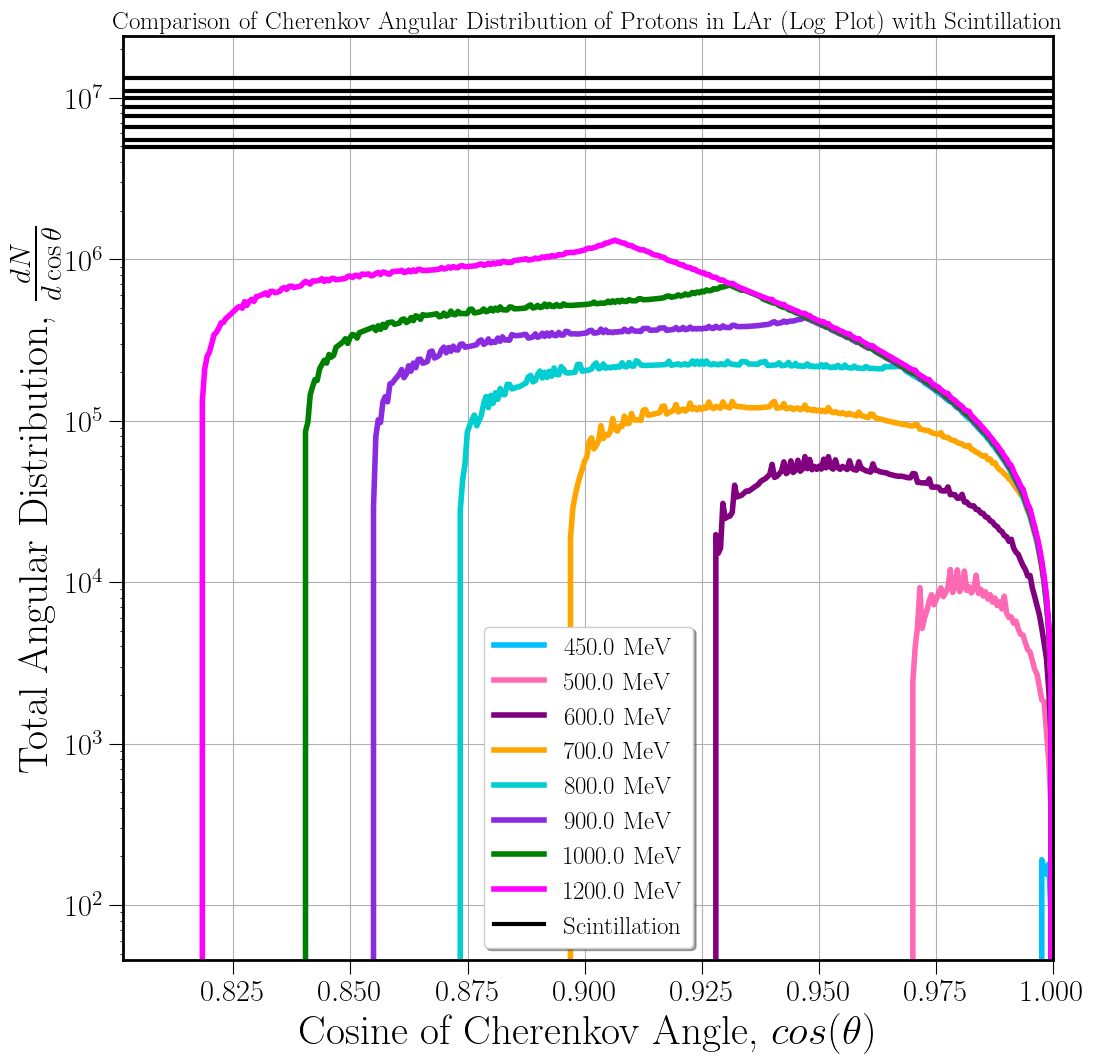

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=25, tm_hour=7, tm_min=35, tm_sec=57, tm_wday=0, tm_yday=268, tm_isdst=0)


In [833]:
############ RUN THE FUNCTION ###################Total AD####

print('started: ', time.gmtime())
 
# t_arr = np.array([383.96,400,500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
 
# find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0.8,plotx2=1)

get_cerenkov(z=0,dz=0.1,plotz1=0.98/(n_peakr*filtered_lst_res[0]),plotz2=1)

print('ended: ', time.gmtime())

# t_arr = np.array([450,500,600,700,800,900,1000,1200,1500,2000])  #initial  K.E of the proton in MeV 600,700,800,900,1000

In [41]:
#Integrated AD with HO fit: T MeV 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([440,450,460,470,475,480,490,500])
# t = 500
t = np.array([450,500,600,700,800,900,1000]) #,1200,1500,2000,2500,3000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

    
alpha = 1/137
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd = np.linspace(90,700,2000)

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.1

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

# print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


cerenkovanglist = []

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []
    

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Total Cherenkov Angular Distribution of Proton in LAr Using Resonance Model Fit ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 16) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)
ax.grid()



cerenkovfinallist = []

for j in t: 
    cerenkovtlist = []
    # cerenkovsum = 0
    cerenkovangnsumallt = [0 for x in x_all]
    cerenkovangasumallt = [0 for x in x_all]

    cerenkovangtsumallt = [0 for x in x_all]

#     print(j)
#     print(make_betalist(j))
    
    mybetalist = make_betalist(j,0,0.1)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    
    for i in filtered_lst_res:  #[0:20]

        cos_ang_min = 1/(i * n_peakr)
        cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
        cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        
        def func_angn(x):  #Normal AD_
        
            if x >= cos_ang_min and x <= cos_ang_maxn:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
           
                    
                # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    # lmin = lamd[min(idx)]
                    lmax = lamd[max(idx)] #lamd[idx[1]]
            
                # if 1/(i*x) <= n_500:
                    # lmin = max(lamd[min(idx)], 106.67)
                    # lmax = 500            

                # lamdminr.append(lmin)
                lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
            else: 
                return 0 #To avaid getting negative contribution 

        func_angnc = [func_angn(x) for x in x_all]  
        # print(x_all, func_angnc)
        # plt.plot(x_all, func_angnc)
            
            
    
        def func_anga(x):  #Anomalous AD
        
            if x >= cos_ang_min and x <= cos_ang_maxa:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
               # if 1/(i*x) > n_peakr:
                   # lmin = lamd_peakr
                   # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    lmin = lamd[min(idx)]  #, 106.67)
                   # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                # if 1/(i*x) <= n_uvr:
                    # lmin = 106.67
                    #     # lmax = 500        
                    
                lamdminr.append(lmin)
                # lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
            else: 
                return 0 #To avaid getting negative contribution 

        func_angac = [func_anga(x) for x in x_all]       
           
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
           
        func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]
            
        cerenkovangnsumallt = np.add(func_angnc, cerenkovangnsumallt) 
        cerenkovangasumallt = np.add(func_angac, cerenkovangasumallt) 
        cerenkovangtsumallt = np.add(func_angtc, cerenkovangtsumallt)
            # func_angtc = func_angnc + func_angac 

    # print(x_all, cerenkovangtsum)

    # plt.plot(x_all, cerenkovangnsum)
    # plt.plot(x_all, cerenkovangasum)
        
        # ax.plot(x_all, cerenkovangnsum, label='t = {} MeV'.format(float(j)))

    print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(j, sum(cerenkovangtsumallt) * (dx/0.1)/2000)) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
    # ax.grid()

    # ax.plot(x_all, cerenkovangtsumallt, label='t = {} MeV'.format(float(j)))
    
        
    # plt.xlim(0.75,1)
    plt.xlim([0.97/(n_peakr*filtered_lst_res[0]), 1])

#     plt.xlim([0.97/(n_peakr*filtered_lst_res[0]), 1])

ax.grid()

list_ad2 = list(map(list, list(zip(t, cerenkovangtsumallt))))
print(list_ad2)
    
#     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=20,framealpha=None,shadow=True) #loc='best'fig = plt.figure(figsize=(12,12))
# plt.savefig('AD_HO_resonancefit_allT_dxp1dth2k.jpg', bbox_inches="tight")
# print(t, sum(cerenkovangtsumallt) * (dx/0.1)/2000)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125984\963079778.py:143: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_125984\963079778.py:185: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 450 Mev Proton in LAr: 0.389
Total Cerenkov photons emitted by a 500 Mev Proton in LAr: 200.542
Total Cerenkov photons emitted by a 600 Mev Proton in LAr: 2670.212
Total Cerenkov photons emitted by a 700 Mev Proton in LAr: 9486.070


KeyboardInterrupt: 

In [ ]:
#Integrated AD with HO fit: T MeV 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([440,450,460,470,475,480,490,500])
t = np.array([500,600,700,800,900])

alpha = 1/137
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd = np.linspace(90,700,2000)

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.1 #cm

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

# print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


cerenkovanglist = []

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []
    

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Total Cherenkov Angular Distribution of Proton in LAr Using Resonance Model Fit ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 16) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)
ax.grid()



cerenkovfinallist = []

for j in t: 
    cerenkovtlist = []
    # cerenkovsum = 0
    cerenkovangnsump1 = [0 for x in x_all]
    cerenkovangasump1 = [0 for x in x_all]

    cerenkovangtsump1 = [0 for x in x_all]

#     print(j)
#     print(make_betalist(j))
    
    mybetalist = make_betalist(j,0,0.1)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    
    for i in filtered_lst_res:  #[0:20]

        cos_ang_min = 1/(i * n_peakr)
        cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
        cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        
        def func_angn(x):  #Normal AD_
        
            if x >= cos_ang_min and x <= cos_ang_maxn:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
           
                    
                # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    # lmin = lamd[min(idx)]
                    lmax = lamd[max(idx)] #lamd[idx[1]]
            
                # if 1/(i*x) <= n_500:
                    # lmin = max(lamd[min(idx)], 106.67)
                    # lmax = 500            

                # lamdminr.append(lmin)
                lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
            else: 
                return 0 #To avaid getting negative contribution 

        func_angnc = [func_angn(x) for x in x_all]  
        # print(x_all, func_angnc)
        # plt.plot(x_all, func_angnc)
            
            
    
        def func_anga(x):  #Anomalous AD
        
            if x >= cos_ang_min and x <= cos_ang_maxa:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
               # if 1/(i*x) > n_peakr:
                   # lmin = lamd_peakr
                   # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    lmin = lamd[min(idx)]  #, 106.67)
                   # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                # if 1/(i*x) <= n_uvr:
                    # lmin = 106.67
                    #     # lmax = 500        
                    
                lamdminr.append(lmin)
                # lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
            else: 
                return 0 #To avaid getting negative contribution 

        func_angac = [func_anga(x) for x in x_all]       
           
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
           
        func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]
            
        cerenkovangnsump1 = np.add(func_angnc, cerenkovangnsump1) 
        cerenkovangasump1 = np.add(func_angac, cerenkovangasump1) 
        cerenkovangtsump1 = np.add(func_angtc, cerenkovangtsump1)
            # func_angtc = func_angnc + func_angac 

    # print(x_all, cerenkovangtsum)

    # plt.plot(x_all, cerenkovangnsum)
    # plt.plot(x_all, cerenkovangasum)
        
        # ax.plot(x_all, cerenkovangnsum, label='t = {} MeV'.format(float(j)))

    print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(j, sum(cerenkovangtsump1) * (dx/0.1)/2000)) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
    # ax.grid()

    ax.plot(x_all, cerenkovangtsump1, label='t = {} MeV'.format(float(j)))
    
        
    plt.xlim(0.8,1)
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    
#     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=12,framealpha=None,shadow=True) #loc='best'
# plt.savefig('AD_HO_resonancefit_lowT_dxp1dth2k.jpg', bbox_inches="tight")
plt.savefig('AD_HO_resonancefit_medT_dxp1dth2k.jpg', bbox_inches="tight")



n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1776783342.py:159: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1776783342.py:201: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 450 Mev Proton in LAr: 0.415
Total Cerenkov photons emitted by a 500 Mev Proton in LAr: 200.202
Total Cerenkov photons emitted by a 600 Mev Proton in LAr: 2675.879
Total Cerenkov photons emitted by a 700 Mev Proton in LAr: 9527.783
Total Cerenkov photons emitted by a 800 Mev Proton in LAr: 22197.320
Total Cerenkov photons emitted by a 900 Mev Proton in LAr: 39998.558
Total Cerenkov photons emitted by a 1000 Mev Proton in LAr: 62052.052


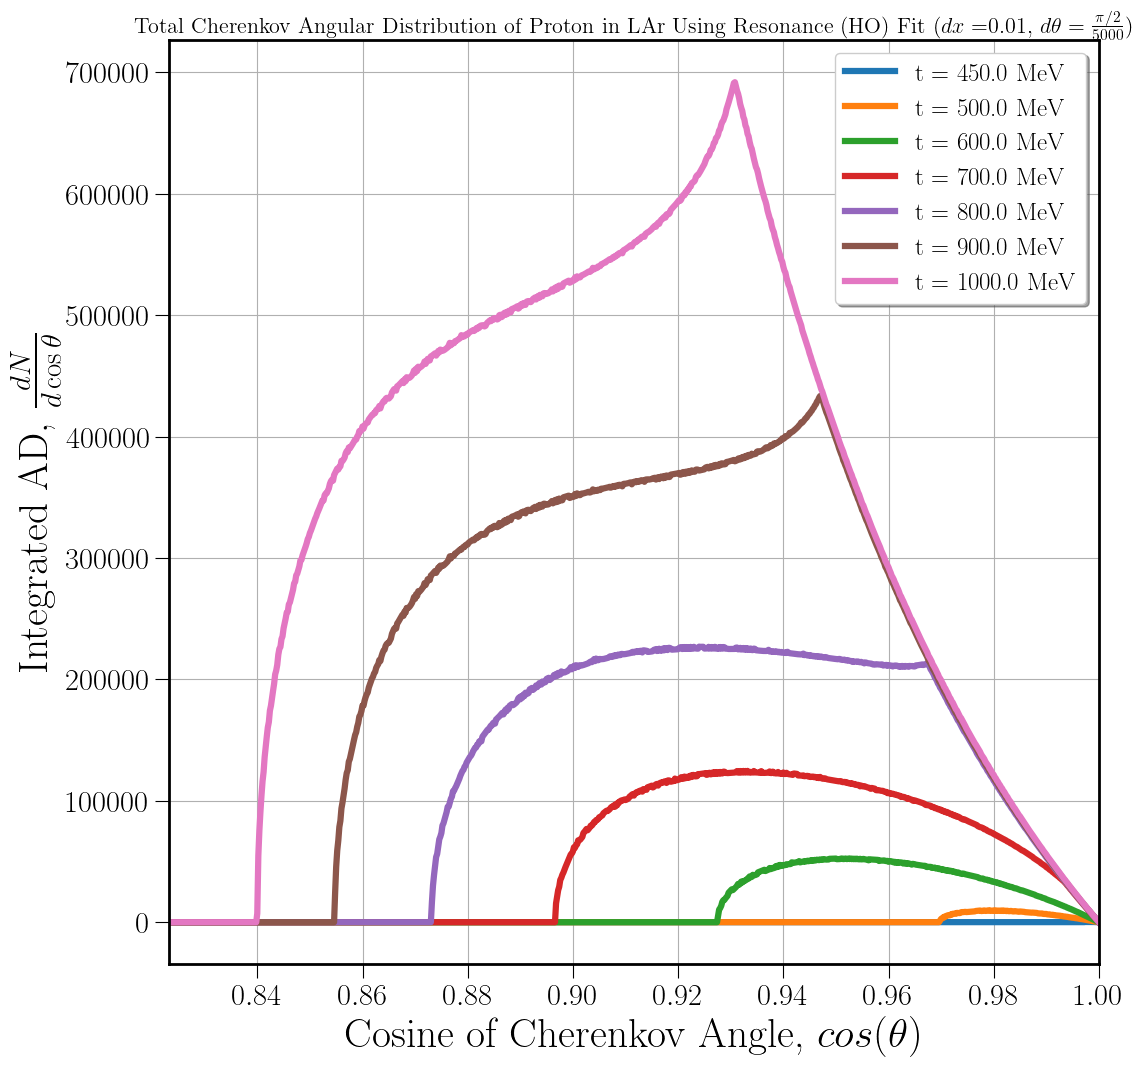

In [780]:
#Integrated AD with HO fit: T MeV 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([440,450,460,470,480,490,500])
t = np.array([450,500,600,700,800,900,1000])
# t = 500
dx = 0.01 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd = np.linspace(90,700,2000)

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 5000)
x_all = np.linspace(0, 1, 5000)
x = np.cos(theta)
# dx = 0.01

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


# cerenkovangnsum = []
# cerenkovangasum = []
# cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []
    

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# cerenkovfinallist = []
# cerenkovtsum500 = []

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Total Cherenkov Angular Distribution of Proton in LAr Using Resonance (HO) Fit ($dx=$0.01, $d\theta=\frac{\pi/2}{5000}$)", fontsize= 16) # 
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=30)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)
ax.grid()

for j in t: 
    cerenkovtlist = []
    # cerenkovsum = 0
    cerenkovangnsum = [0 for x in x_all]
    cerenkovangasum = [0 for x in x_all]

    cerenkovangtsum = [0 for x in x_all]

#     print(j)
#     print(make_betalist(j))
    
    mybetalist = make_betalist(j,0,0.01)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    
    for i in filtered_lst_res:  #[0:20]

        cos_ang_min = 1/(i * n_peakr)
        cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
        cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        
        def func_angn(x):  #Normal AD_
        
            if x >= cos_ang_min and x <= cos_ang_maxn:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
           
                    
                # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    # lmin = lamd[min(idx)]
                    lmax = lamd[max(idx)] #lamd[idx[1]]
            
                # if 1/(i*x) <= n_500:
                    # lmin = max(lamd[min(idx)], 106.67)
                    # lmax = 500            

                # lamdminr.append(lmin)
                lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
            else: 
                return 0 #To avaid getting negative contribution 

        func_angnc = [func_angn(x) for x in x_all]  
        # print(x_all, func_angnc)
        # plt.plot(x_all, func_angnc)
            
            
    
        def func_anga(x):  #Anomalous AD
        
            if x >= cos_ang_min and x <= cos_ang_maxa:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
               # if 1/(i*x) > n_peakr:
                   # lmin = lamd_peakr
                   # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    lmin = lamd[min(idx)]  #, 106.67)
                   # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                # if 1/(i*x) <= n_uvr:
                    # lmin = 106.67
                    #     # lmax = 500        
                    
                lamdminr.append(lmin)
                # lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
            else: 
                return 0 #To avaid getting negative contribution 

        func_angac = [func_anga(x) for x in x_all]       
           
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
           
        func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]
            
        cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
        cerenkovangasum = np.add(func_angac, cerenkovangasum) 
        cerenkovangtsum = np.add(func_angtc, cerenkovangtsum)
            # func_angtc = func_angnc + func_angac 

    # print(x_all, cerenkovangtsum)

    # plt.plot(x_all, cerenkovangnsum)
    # plt.plot(x_all, cerenkovangasum)
        
        # ax.plot(x_all, cerenkovangnsum, label='t = {} MeV'.format(float(j)))

    print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(j, (sum(cerenkovangtsum) * (dx/0.1))/5000)) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

    ax.plot(x_all, cerenkovangtsum*(dx/0.1), lw= 4.5, label='t = {} MeV'.format(float(j)))
    # plt.yscale("log")
        
    # plt.xlim(0.8,1)
    plt.xlim([0.98/(n_peakr*filtered_lst_res[0]), 1])

#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    
#     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=18,framealpha=None,shadow=True) #loc='best'
# plt.savefig('AD_HO_resonancefit_lowT_dxp01dth2k.jpg', bbox_inches="tight")
plt.savefig('AD_HO_resonancefit_medT_dxp01dth5k.jpg', bbox_inches="tight") #_logplot



In [ ]:
#Integrated AD with HO fit: T MeV 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([440,450,460,470,480,490,500])
t = np.array([500])
# t = 500

alpha = 1/137
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd = np.linspace(90,700,2000)

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.1 #cm

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


# cerenkovangnsum = []
# cerenkovangasum = []
# cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []
    

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# cerenkovfinallist = []
# cerenkovtsum500 = []

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Total Cherenkov Angular Distribution of Proton in LAr Using Resonance Model Fit ($dx=$0.001, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 16) # 
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)
ax.grid()

for j in t: 
    cerenkovtlist = []
    # cerenkovsum = 0
    cerenkovangnsumho = [0 for x in x_all]
    cerenkovangasumho = [0 for x in x_all]

    cerenkovangtsumho = [0 for x in x_all]

#     print(j)
#     print(make_betalist(j))
    
    mybetalist = make_betalist(j,0,0.1)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    
    for i in filtered_lst_res:  #[0:20]

        cos_ang_min = 1/(i * n_peakr)
        cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
        cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        
        def func_angn(x):  #Normal AD_
        
            if x >= cos_ang_min and x <= cos_ang_maxn:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
           
                    
                # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    # lmin = lamd[min(idx)]
                    lmax = lamd[max(idx)] #lamd[idx[1]]
            
                # if 1/(i*x) <= n_500:
                    # lmin = max(lamd[min(idx)], 106.67)
                    # lmax = 500            

                # lamdminr.append(lmin)
                lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
            else: 
                return 0 #To avaid getting negative contribution 

        func_angnc = [func_angn(x) for x in x_all]  
        # print(x_all, func_angnc)
        # plt.plot(x_all, func_angnc)
            
            
    
        def func_anga(x):  #Anomalous AD
        
            if x >= cos_ang_min and x <= cos_ang_maxa:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
               # if 1/(i*x) > n_peakr:
                   # lmin = lamd_peakr
                   # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    lmin = lamd[min(idx)]  #, 106.67)
                   # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                # if 1/(i*x) <= n_uvr:
                    # lmin = 106.67
                    #     # lmax = 500        
                    
                lamdminr.append(lmin)
                # lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
            else: 
                return 0 #To avaid getting negative contribution 

        func_angac = [func_anga(x) for x in x_all]       
           
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
           
        func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]
            
        cerenkovangnsumho = np.add(func_angnc, cerenkovangnsumho) 
        cerenkovangasumho = np.add(func_angac, cerenkovangasumho) 
        cerenkovangtsumho = np.add(func_angtc, cerenkovangtsumho)
            # func_angtc = func_angnc + func_angac 

    print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(j, (sum(cerenkovangtsumho) * (dx/0.1))/2000)) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

    # ax.plot(x_all, cerenkovangpsumho, lw= 4, label='t = {} MeV'.format(float(j)))
    # ax.plot(x_all, cerenkovangnsumho, lw= 4, label='t = {} MeV'.format(float(j)))

    ax.plot(x_all, cerenkovangtsumho*(dx/0.1), lw= 4, label='t = {} MeV'.format(float(j)))
    
        
    plt.xlim(0.965,1)
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    
#     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=16,framealpha=None,shadow=True) #loc='best'
# plt.savefig('AD_HO_resonancefit_lowT_dxp001dth2k.jpg', bbox_inches="tight")



In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Integrated Cherenkov Angular Distribution of a 500 MeV Proton in LAr Using Resonance Model Fit ($dx=$0.001, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 15) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

ax.plot(x_all, cerenkovangtsumho*(dx/0.1), linewidth= 4.5, c= 'g', label='Total'.format(float(j))) #total

ax.plot(x_all, cerenkovangnsumho*(dx/0.1), linewidth= 4, ls= 'dashdot', c='b', label='Normal'.format(float(j))) #normal
ax.plot(x_all, cerenkovangasumho*(dx/0.1), linewidth= 4, ls= 'dashed', c='orange', label='Anomalous'.format(float(j))) #anomalous

    
# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# plt.ylim(0,0.2e7)
plt.xlim(0.965,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=22,framealpha=None,shadow=True) #loc='best'
# plt.savefig('AD_Total_Cherenkov_comps_HOmodel_500MeV_dxp001dth2k.jpg', bbox_inches= "tight") 
    

C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1604015220.py:5: RuntimeWarning: divide by zero encountered in divide
  f = (1- x_all**2)/x_all**3


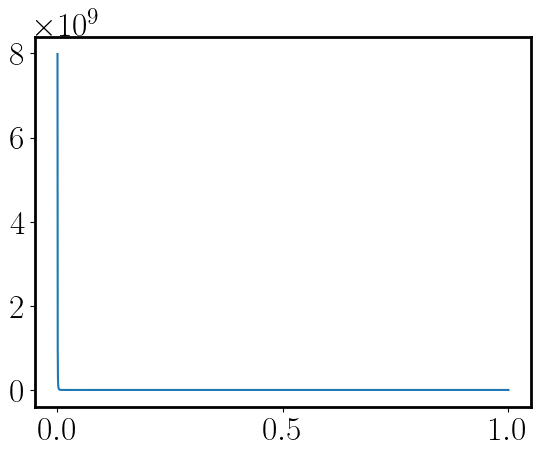

In [282]:
theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)

f = (1- x_all**2)/x_all**3

plt.plot(x_all,f)

In [ ]:
# ##REF: Visualize high order derivatives of the tanh function

# import numpy as np
# import numdifftools as nd
# import matplotlib.pyplot as plt
# x = np.linspace(-2, 2, 100)
# for i in range(10):
#     df = nd.Derivative(np.tanh, n=i)
#     y = df(x)
#     h = plt.plot(x, y/np.abs(y).max())
    
# plt.show()   

from scipy.misc import derivative

def f(x):
    return x**2 + 1

derivative(f, 5, dx=1e-6)
# 10.00000000139778


In [120]:

#Formula: PVS FIT
n_pvs = lambda wl: a_0 + (a_pvs * ((lamd_uv**(-1) - wl**(-1))/((lamd_uv**(-1) - wl**(-1))**2 + gamma**2)))
# n2_pvs = lambda wl: (a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2))))**2
# lamdmin = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta - np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))
# lamdmax = (2*lamd_uv*(a_0*beta - 1))/(2 * (a_0*beta - 1) + lamd_uv * (a_pvs * beta + np.sqrt((a_pvs * beta)**2 - 4 * (a_0*beta - 1)**2 * gamma**2)))

# print("Algebraic Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdmin, lamdmax))
# cos_ang_min = 1/(b*n_max)
# cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


#lambda(theta) when theta changes

# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])
# lamd = np.linspace(0,700,700)
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

alpha = 1/137 #Fine-structure (EM coupling) constant 

a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
# beta = 0.75

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm

#Refractive index new fit: M. Sievert (Mathematica equivalent)

lamd = np.linspace(100,500,500)   #wavelength of light 
mp = 938  #Proton's mass in MeV


theta = np.linspace(0, np.pi/2, 2000)

b = 0.7579653181328908 #beta

#Wavelength as a function of the angle: lambda(theta)
lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))

#term involving wavelengths: (lamd_uv^-1 - lamd_theta^-1)
lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
lamd_nterm = (((-b*a_pvs*np.cos(theta)) - ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p

func_angp = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_pterm**2)**2/(gamma**2 - lamd_pterm**2))) + ((2*a_0*a_pvs*b) * lamd_pterm * np.abs((gamma**2 + lamd_pterm**2)/(gamma**2 - lamd_pterm**2))) + ((b*a_pvs**2*lamd_pterm**2)/np.abs(gamma**2 - lamd_pterm**2))))
func_angn = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_nterm**2)**2/(gamma**2 - lamd_nterm**2))) + ((2*a_0*a_pvs*b) * lamd_nterm * np.abs((gamma**2 + lamd_nterm**2)/(gamma**2 - lamd_nterm**2))) + ((b*a_pvs**2*lamd_nterm**2)/np.abs(gamma**2 - lamd_nterm**2))))

func_angt = func_angp + func_angn

# print(b, lamd_thetap, lamd_thetan, lamd_pterm, lamd_nterm, func_angp, func_angn, sep='\n')

# print(theta, lamd_thetap) #, lamd_thetan, lamd_pterm, func_angp, func_angn
# print("{}, lamd_thetap= {:.5f}, lamd_thetan = {:.5f}, lamd_pterm  = {}, func_ang= {}".format(b, lamd_thetap, lamd_thetan, lamd_pterm, func_ang))
# lamd_pterm, lamd_nterm
#(0.00021947, 0.00061913), (0.00219235, 0.00077715)

C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\2363343043.py:28: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\2363343043.py:29: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\2363343043.py:32: RuntimeWarning: invalid value encountered in sqrt
  lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
C

C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\3326987252.py:10: RuntimeWarning: invalid value encountered in multiply
  ax.plot(np.cos(theta), 2*pi*1e7*func_angp, linewidth= 3.5, ls= '--', label= "$(\\frac{dN}{dx dcos\\theta})_{Normal}$")    #func_angp = f(lamd_pterm): Blue plot
C:\Users\hrrah\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\3326987252.py:11: RuntimeWarning: invalid value encountered in multiply
  ax.plot(np.cos(theta), 2*pi*1e7*func_angn, linewidth= 3.5, ls= 'dashdot', label= "$(\\frac{dN}{dx dcos\\theta})_{Anomalous}$")     #func_angp = f(lamd_pterm): Orange plot
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\3326987252.py:12: RuntimeWarning: invalid value encountered in multiply
  ax.plot(np.cos(theta), 2*pi*1e7*func_angt, linewidth= 4.5, color= 'g', label= "$(\\frac{dN}{dx d\\cos\\theta})_{Total}$")     #func_angp = f(l

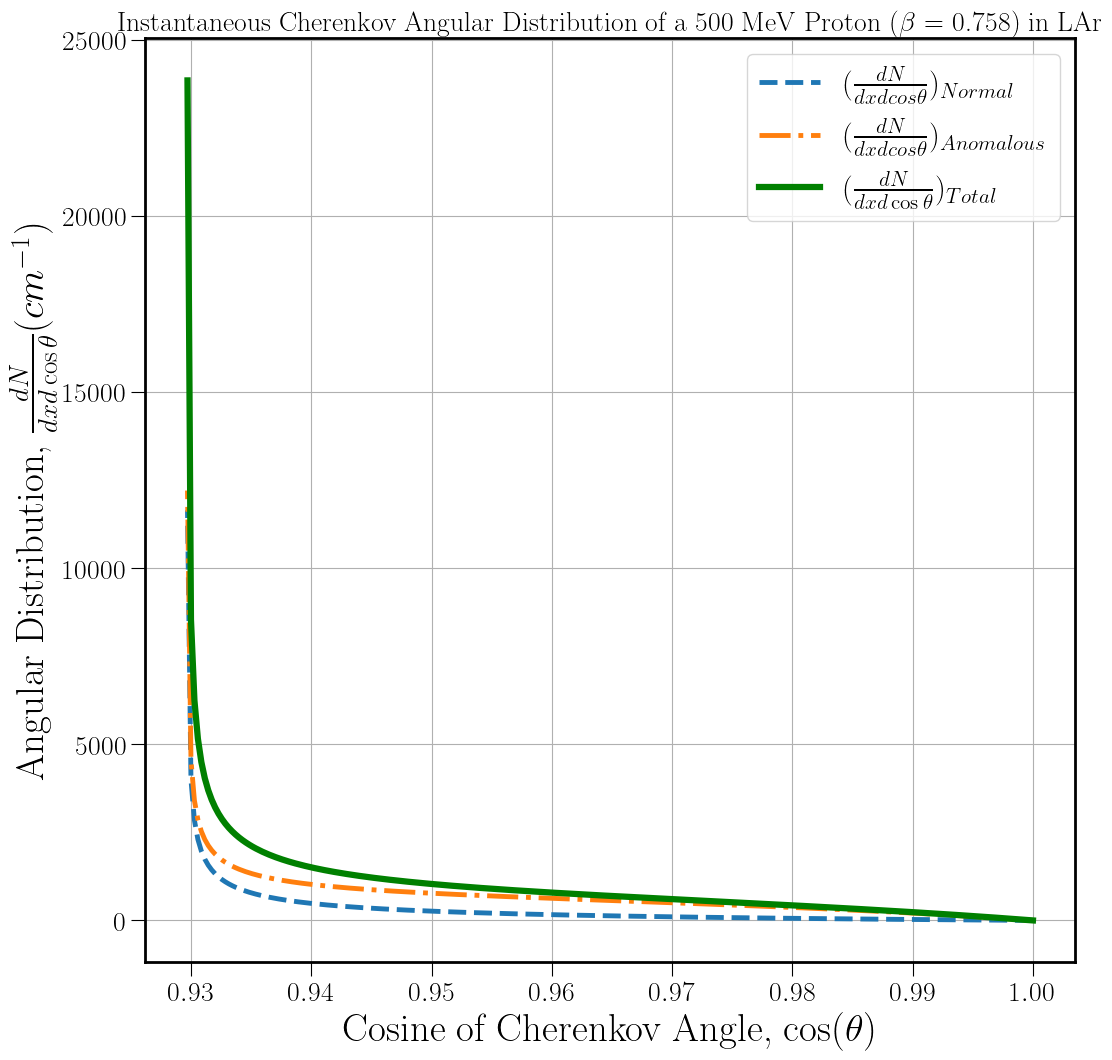

In [121]:
#Converting the above plot to dcos(theta) vs cos(theta)
# print(b, func_angp, func_angn)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title("Instantaneous Cherenkov Angular Distribution of a 500 MeV Proton ($\\beta$ = 0.758) in LAr", fontsize= 20)

func_angt = func_angp + func_angn

ax.plot(np.cos(theta), 2*pi*1e7*func_angp, linewidth= 3.5, ls= '--', label= "$(\\frac{dN}{dx dcos\\theta})_{Normal}$")    #func_angp = f(lamd_pterm): Blue plot
ax.plot(np.cos(theta), 2*pi*1e7*func_angn, linewidth= 3.5, ls= 'dashdot', label= "$(\\frac{dN}{dx dcos\\theta})_{Anomalous}$")     #func_angp = f(lamd_pterm): Orange plot
ax.plot(np.cos(theta), 2*pi*1e7*func_angt, linewidth= 4.5, color= 'g', label= "$(\\frac{dN}{dx d\\cos\\theta})_{Total}$")     #func_angp = f(lamd_pterm): Green plot


# plt.scatter(theta,func_angn)    #func_angn = f(lamd_nterm): Orange plot


ax.set_xlabel("Cosine of Cherenkov Angle, $\\cos(\\theta)$ ",fontsize=28)
ax.set_ylabel("Angular Distribution, $\\frac{dN}{dx d\\cos\\theta} (cm^{-1})$",fontsize=28)
ax.grid()
ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.legend(fontsize=22)

# plt.ylim([0,10000])
# plt.xlim([0,30])

# plt.savefig("angdist_dcostheta_total_betap758.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
# theta, func_angp, func_angn

C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\1739723852.py:18: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\1739723852.py:19: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\1739723852.py:22: RuntimeWarning: invalid value encountered in sqrt
  lamd_pterm = (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
C:\Users\hrrah\AppData\Local\Temp\ipykernel_2096\1739723852.p

97.0177210196262*pi 193.538485570839*pi 290.556206590465*pi


(0.9203777678659733, 1.0)

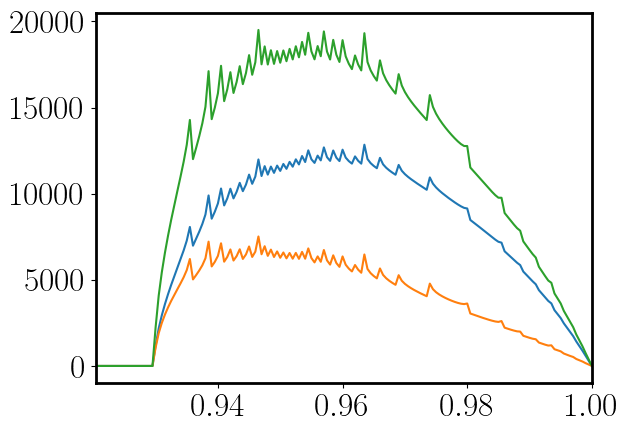

In [127]:
#Integrated/Total AD PVS Fit:


#AD (normal)

alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

# b= 0.7579653181328908

# b= 0.79249149
betalist = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])

#Wavelength as a function of the angle: lambda(theta)
lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))

#term involving wavelengths: (lamd_uv^-1 - lamd_theta^-1)
lamd_pterm = (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
lamd_nterm = (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p

func_angp = lambda lamd_pterm: ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_pterm**2)**2/(gamma**2 - lamd_pterm**2))) + ((2*a_0*a_pvs*b) * lamd_pterm * np.abs((gamma**2 + lamd_pterm**2)/(gamma**2 - lamd_pterm**2))) + ((b*a_pvs**2*lamd_pterm**2)/np.abs(gamma**2 - lamd_pterm**2))))
func_angn = lambda lamd_nterm: ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_nterm**2)**2/(gamma**2 - lamd_nterm**2))) + ((2*a_0*a_pvs*b) * lamd_nterm * np.abs((gamma**2 + lamd_nterm**2)/(gamma**2 - lamd_nterm**2))) + ((b*a_pvs**2*lamd_nterm**2)/np.abs(gamma**2 - lamd_nterm**2))))

# func_angt = lambda func_angp, func_angn: (func_angp + func_angn)*1e7  #dN/dx.dcos(theta)

# cerenkovangfinallist = []
# cerenkovangt00sum = []
# theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)

# t = np.array([383.96156,400,500,600,650,700]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# for j in t: 

# cerenkovanglist = []
cerenkovangpsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]

for b in betalist: 
    
    cos_ang_min = 1/(b*n_max)

    
#     print(j) #OUTPUT
#     print(make_betalist(j))
# mybetalist = make_betalist(j)
# filtered_lst = [x for x in mybetalist if x > 0.7046534357]
# print(j, np.shape(filtered_lst), filtered_lst)
    
# for b in filtered_lst:

    def func_angp(x):
        if x >= cos_ang_min:
            return 2*pi*1e6* (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))))) #+ ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
        else: 
            return 0 
#     print(b)
        
    func_angpc = [func_angp(x) for x in x_all]       
    cerenkovangpsum = np.add(func_angpc, cerenkovangpsum) 
# print(sum(cerenkovangpsum)/2000)


#AD (anomalous)


    def func_angn(x):
        if x >= cos_ang_min:
            return 2*pi*1e6* (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta) ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + 

        else: 
            return 0 
#     print(b)
        
    func_angnc = [func_angn(x) for x in x_all]    
    
    cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
    
    
    cerenkovangsum = cerenkovangpsum + cerenkovangnsum
print(sum(cerenkovangpsum)/2000, sum(cerenkovangnsum)/2000, sum(cerenkovangsum)/2000) 
# print(cerenkovangsum)
# cerenkovangfinallist.append(cerenkovangtlist)

plt.plot(x_all, cerenkovangnsum)
plt.plot(x_all, cerenkovangpsum)
plt.plot(x_all, cerenkovangsum)

plt.xlim([0.99/(n_max*betalist[0]), 1])
# t,cerenkovangt00sum


In [ ]:
# Angular Distribution of Cerenkov Radiation (ANOMALOUS AD)

alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081
lamd_uv = 106.6 #in nm 

# betalist = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])

# cerenkovangfinallist = []
# cerenkovangt00sum = []
theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.01


# t = np.array([383.962,400,500]) #,600,650,700,750,800,815,820,850]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([700,750,800,805,810])

t = np.array([500])

#Scintillation 
cerenkovangtsum = []

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Integrated Cherenkov Angular Distribution of a 500 MeV Proton in LAr Using SVE Aprrox Fit ($dx=$0.01, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 15)
ax.set_xlabel(r"Cosine of Cherenkov angle, $cos(\theta)$ ",fontsize=26)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=26)
#     ax.grid()
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

for j in t: 

    cerenkovanglist = []
    cerenkovangpsumpvs = [0 for x in x_all]
    cerenkovangnsumpvs = [0 for x in x_all]
    cerenkovangtsumpvs = [0 for x in x_all]
    
    mybetalist = make_betalist(j,0,0.1)
    filtered_betalist = [x for x in mybetalist if x > 0.7046534357] 
#     print(j, np.shape(filtered_betalist), filtered_betalist)

    scintp = 40000*j*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
    scint = np.linspace(scintp, scintp, 2000)


    for b in filtered_betalist: 
    
        cos_ang_min = 1/(b*n_max)
        cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)

        # print("T= {}, beta= {}, cos_ang_min= {}, cos_ang_max= {}".format(j, b, cosang_min, cos_ang_max))
        
        def func_angn(x):
            
#             lamd_thetap = 2*(b*a_0*x - 1)/(((2*lamd_uv**(-1)) * (b*a_0*x - 1)) + (b*a_pvs*x) + np.sqrt(b**2*a_pvs**2*x**2 - (4*gamma**2*(b*a_0*x - 1)**2)))
            lamd_thetan = 2*(b*a_0*x - 1)/(((2*lamd_uv**(-1)) * (b*a_0*x - 1)) + (b*a_pvs*x) - np.sqrt(b**2*a_pvs**2*x**2 - (4*gamma**2*(b*a_0*x - 1)**2)))
            
#             func_angp = 2*pi*1e6*((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (lamd_uv**(-1) - lamd_thetap**(-1))**2)**2/(gamma**2 - (lamd_uv**(-1) - lamd_thetap**(-1))**2))) + ((2*a_0*a_pvs*b) * (lamd_uv**(-1) - lamd_thetap**(-1)) * np.abs((gamma**2 + (lamd_uv**(-1) - lamd_thetap**(-1))**2)/(gamma**2 - (lamd_uv**(-1) - lamd_thetap**(-1))**2))) + ((b*a_pvs**2*(lamd_uv**(-1) - lamd_thetap**(-1))**2)/np.abs(gamma**2 - (lamd_uv**(-1) - lamd_thetap**(-1))**2))))
            func_angn = 2*pi*1e6*((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (lamd_uv**(-1) - lamd_thetan**(-1))**2)**2/(gamma**2 - (lamd_uv**(-1) - lamd_thetan**(-1))**2))) + ((2*a_0*a_pvs*b) * (lamd_uv**(-1) - lamd_thetan**(-1)) * np.abs((gamma**2 + (lamd_uv**(-1) - lamd_thetan**(-1))**2)/(gamma**2 - (lamd_uv**(-1) - lamd_thetan**(-1))**2))) + ((b*a_pvs**2*(lamd_uv**(-1) - lamd_thetan**(-1))**2)/np.abs(gamma**2 - (lamd_uv**(-1) - lamd_thetan**(-1))**2))))
            
#             print(j, b, lamd_thetap, lamd_thetan)
#             func_angt = (func_angp + func_angn)  #dN/dx.dcos(theta)

            
            if x >= cos_ang_min and x <= cos_ang_max:
                return func_angn #total ang distr
            else: 
                return 0 #To avaid getting negative contribution 
            
        func_angnc = [func_angn(x) for x in x_all]  
            
# cerenkovanglist.append(func_angtc) #indices 0,1 = int,err
        cerenkovangnsumpvs = np.add(func_angnc, cerenkovangnsumpvs)


        def func_angp(x):
            
            lamd_thetap = 2*(b*a_0*x - 1)/(((2*lamd_uv**(-1)) * (b*a_0*x - 1)) + (b*a_pvs*x) + np.sqrt(b**2*a_pvs**2*x**2 - (4*gamma**2*(b*a_0*x - 1)**2)))
            # lamd_thetan = 2*(b*a_0*x - 1)/(((2*lamd_uv**(-1)) * (b*a_0*x - 1)) + (b*a_pvs*x) - np.sqrt(b**2*a_pvs**2*x**2 - (4*gamma**2*(b*a_0*x - 1)**2)))
            
            func_angp = 2*pi*1e6*((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (lamd_uv**(-1) - lamd_thetap**(-1))**2)**2/(gamma**2 - (lamd_uv**(-1) - lamd_thetap**(-1))**2))) + ((2*a_0*a_pvs*b) * (lamd_uv**(-1) - lamd_thetap**(-1)) * np.abs((gamma**2 + (lamd_uv**(-1) - lamd_thetap**(-1))**2)/(gamma**2 - (lamd_uv**(-1) - lamd_thetap**(-1))**2))) + ((b*a_pvs**2*(lamd_uv**(-1) - lamd_thetap**(-1))**2)/np.abs(gamma**2 - (lamd_uv**(-1) - lamd_thetap**(-1))**2))))
            # func_angn = 2*pi*1e6*((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (lamd_uv**(-1) - lamd_thetan**(-1))**2)**2/(gamma**2 - (lamd_uv**(-1) - lamd_thetan**(-1))**2))) + ((2*a_0*a_pvs*b) * (lamd_uv**(-1) - lamd_thetan**(-1)) * np.abs((gamma**2 + (lamd_uv**(-1) - lamd_thetan**(-1))**2)/(gamma**2 - (lamd_uv**(-1) - lamd_thetan**(-1))**2))) + ((b*a_pvs**2*(lamd_uv**(-1) - lamd_thetan**(-1))**2)/np.abs(gamma**2 - (lamd_uv**(-1) - lamd_thetan**(-1))**2))))
            
#             print(j, b, lamd_thetap, lamd_thetan)
#             func_angt = (func_angp + func_angn)  #dN/dx.dcos(theta)
            
            if x >= cos_ang_min and x <= cos_ang_max:
                return func_angp #total ang distr
            else: 
                return 0 #To avaid getting negative contribution 
            
        func_angpc = [func_angp(x) for x in x_all]  
        func_angtc = [(func_angp(x) + func_angn(x)) for x in x_all]  
            
# cerenkovanglist.append(func_angtc) #indices 0,1 = int,err
        cerenkovangpsumpvs = np.add(func_angpc, cerenkovangpsumpvs)
        cerenkovangtsumpvs = np.add(func_angtc, cerenkovangtsumpvs)

    
    print("Cherenkov photons emitted by a {} Mev Proton in LAr (PVS fit): {:.3f}" .format(j, (sum(cerenkovangtsumpvs) * (dx/0.1))/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
#         print(cerenkovangsum)

#     cerenkovangtsum.append(cerenkovangsum) #conversion factor to standard units
    
#     print(cerenkovangtsum)
   
#     plt.plot(x_all, cerenkovangsum)
#     plt.plot(x_all, scint)
#     plt.yscale("log")

    
#     plt.show()
    ax.plot(x_all, cerenkovangpsumpvs*(dx/0.1), c='deepskyblue', ls = 'dashdot', lw= 4, label = "Normal(SVE Aprx)") #label='t = {} MeV'.format(float(j)))
    ax.plot(x_all, cerenkovangnsumpvs*(dx/0.1), c= 'red', ls = 'dashed', lw= 4, label = "Anomalous(SVE Aprx)") #label='t = {} MeV'.format(float(j)))
    
    ax.plot(x_all, cerenkovangtsumpvs*(dx/0.1), c= 'purple', lw= 4.5,  label = "Total(SVE Aprx)")  #label='t = {} MeV'.format(float(j)))

#     ax.plot(x_all, scint)  #40000*500*0.275

#     plt.plot(x_all, scint)
#     plt.yscale("log")

    plt.xlim(0.92,1)
#     plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])

    ax.grid()

#     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=16,framealpha=None,shadow=True) #loc='best'
# plt.savefig("AD_Cherenkov_PVS_500MeV_dxp1dth2000.jpg", bbox_inches="tight")
# plt.savefig("AD_comps_Cherenkov_PVS_500MeV_dxp001dth2000.jpg", bbox_inches="tight")
    
# angular_cerenkov_dx[0]

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Comparison of Total Cherenkov Angular Distribution of a 500 MeV Proton in LAr Using Absorptive Fits($dx=$0.001, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 14) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Integrated AD, $(\frac{dN}{d\cos\theta})_{T}$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

# ax.plot(x_all, cerenkovangnsumho, linewidth= 3, c='b', label='Normal'.format(float(j))) #normal HO
# ax.plot(x_all, cerenkovangasumho, linewidth= 3, c='orange', label='Anomalous'.format(float(j))) #anomalous HO

ax.plot(x_all, cerenkovangtsumpvs*(dx/0.1), ls= 'dashdot', linewidth= 4.5, c= 'purple', label='SVE Aprrox Fit'.format(float(j))) #total PVS
ax.plot(x_all, cerenkovangtsumho*(dx/0.1) , linewidth= 4.5, c= 'g', label='Resonance Model Fit'.format(float(j))) #totalHO

# ax.plot(x_all, cerenkovangpsumpvs*(dx/0.1), linewidth= 4, c= 'deepskyblue', label=''.format(float(j))) #normal PVS
# ax.plot(x_all, cerenkovangnsumpvs*(dx/0.1), linewidth= 4, c= 'r', label=''.format(float(j))) #anomalous PVS

# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# plt.ylim(0,0.2e7)
plt.xlim(0.92,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=20,framealpha=None,shadow=True) #loc='best'
# plt.savefig('AD_comparison_Cherenkov_HOvsPVS_500MeV_dxp001dth2k.jpg', bbox_inches= "tight") 
    

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Comparison of Anomalous Cherenkov Angular Distribution of a 500 MeV Proton in LAr Using Absorptive Fits($dx=$0.001, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 14) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Integrated Anomalous AD, $(\frac{dN}{d\cos\theta})_{A}$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)


# ax.plot(x_all, cerenkovangpsumpvs*(dx/0.1), ls= 'dashdot', linewidth= 4, c= 'deepskyblue', label='Normal (SVE Aprx)'.format(float(j))) #normal PVS
ax.plot(x_all, cerenkovangnsumpvs*(dx/0.1), ls= 'dashdot', linewidth= 4, c= 'r', label='Anomalous (SVE Aprx)'.format(float(j))) #anomalous PVS

# ax.plot(x_all, cerenkovangtsumpvs*(dx/0.1), ls= 'dashdot', linewidth= 4.5, c= 'purple', label='Total (SVE Aprx)'.format(float(j))) #total PVS
# ax.plot(x_all, cerenkovangtsumho*(dx/0.1) , linewidth= 4.5, c= 'g', label='Total (Resonance Model)'.format(float(j))) #totalHO

# ax.plot(x_all, cerenkovangnsumho*(dx/0.1), linewidth= 4, c='b', label='Normal (Resonance Model)'.format(float(j))) #normal HO
ax.plot(x_all, cerenkovangasumho*(dx/0.1), linewidth= 4, c='orange', label='Anomalous (Resonance Model)'.format(float(j))) #anomalous HO



# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# plt.ylim(0,0.2e7)
plt.xlim(0.92,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=18,framealpha=None,shadow=True) #loc='best'
plt.savefig('AD_comparison_anom_Cherenkov_HOvsPVS_500MeV_dxp001dth2k.jpg', bbox_inches= "tight") 
    

# Sigma Plots

In [ ]:
import numpy as np
# import numdifftools as nd
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 100)
for i in range(10):
    df = nd.Derivative(np.tanh, n=i)
    y = df(x)
    h = plt.plot(x, y/np.abs(y).max())

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

In [3]:
# # Generate arrays from some hard calculation that takes a lot of time

# wavelength_array = np.arange(0, 1000, 0.0001)
# calculated_absorption_array = wavelength_array**2
# calculated_absorption_array2 = wavelength_array**3

# # Choose a filename, ending in .npz
# filename = 'saved_arrays.npz'

# # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
# np.savez(filename, wavelength=wavelength_array, absorption=calculated_absorption_array, absorption2=calculated_absorption_array2)

In [4]:
# # Load the saved file
# npzfile = np.load(filename)

# # Extract the arrays using the argument names you fed to "np.savez"
# wavelengths = npzfile['wavelength']
# absorptions = npzfile['absorption']
# absorptions2 = npzfile['absorption2']

In [46]:
# # Create the plot using the loaded arrays

# fig, axis = plt.subplots(edgecolor='black', linewidth=5)
# axis.plot(wavelengths, absorptions)
# axis.plot(wavelengths, absorptions2)

In [347]:
# Angular Distribution of Cerenkov Radiation: Absoptive Fits + Scintillation (T MeV) : Data saving version 
#n(dtheta)= 5000

from scipy.misc import derivative

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
# x_all = np.linspace(0, 1, 2000)
x_all = np.cos(theta)
print(x_all)
# dx = 0.1
# z = np.cos(theta)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

lamd = np.linspace(90,700,2000)

n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf


print("n_uv = {}, n_peak = {}, n_500= {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([600])
t_arr = np.array([700])

# Choose a filename, ending in .npz
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_p500_ho.npz'
# filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_p600_ho.npz'
filename1 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_p700_ho.npz'

# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_p500_babicz.npz'
# filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_p600_babicz.npz'
filename2 = 'C:\\Users\\Hasan\'s PC\\OneDrive - New Mexico State University\\Desktop\\HEP\\AD_data_for_PID\\Cherenkovdata_p700_babicz.npz'


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 *(dx/0.1)* ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * (dx/0.1)* ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchon = [func_angn(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhon = np.add(func_angchon, cerenkovangsumhon)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
            np.savez(filename1, theta=theta, costheta=x_all, totalho=cerenkovangsumhot, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, scint=scint) #ke=t_arr, 

        
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from HO Model fit: {:.3f}" .format(t[j], sum(cerenkovangsumhot)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
                
        
#         # Our Fit (PVS)
        
# #         mybetalist = make_betalist(t[j],x,dx)
# #         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
#         for b in filtered_betalist: 

#             cos_ang_min = 1/(b*n_max)
# #             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
#             cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


#             def func_angtp(x):
#                 if x >= cos_ang_min and x <= cos_ang_max:
#                     return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
#                 else: 
#                     return 0 #To avaid getting negative contribution 

#             func_angtc = [func_angtp(z) for z in x_all]       
            
#             cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
# #         print(np.shape(cerenkovangsum))
        
#         cerenkov_allp[j].append(cerenkovangsump)
#         scint_all[j].append(scint)
        
#         # Feed the arrays to "np.savez" with arguments named as the names you want to extract the data with
#         # np.savez(filename, costheta=z, totalaprx=cerenkovangsump, scint=scint) #, normalho=cerenkovangsumhon, anomalousho=cerenkovangsumhoa, ke=t_arr, 

        
#         print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
#         #GRACE AD: 
#         for b in mybetalist: 

#             cos_ang_ming = 0
#             cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
# #             print(cos_ang_maxg)

            
#             def func_angtg(x):
#                 if x >= cos_ang_ming and x <= cos_ang_maxg:
#                     return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
#                 else: 
#                     return 0 #To avaid getting negative contribution 

#             func_angtc = [func_angtg(z) for z in x_all]   
# #             print(func_angtc)

#             cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
# #         print(np.shape(cerenkovangsum))
        
#         cerenkov_allg[j].append(cerenkovangsumg)
# #         scint_all[j].append(scint)
        
#         print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/5000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (dx/0.1)* (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb)

            
            np.savez(filename2, theta=theta, costheta=x_all, totalb=cerenkovangsumb, scint=scint) #ke=t_arr, #Save data to .npz file

            
            
#         print(np.shape(cerenkovangsum))
        
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], np.nansum(cerenkovangsumb)/2000) ) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

    #TeX up labels and text:

    plt.rc("text", usetex=True)
    plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
    plt.rc('font', size=24) 
    plt.rc('font', family='serif')
    
    # matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    plt.rcParams["font.weight"] = "bold"     
    # plt.rcParams["axes.labelweight"] = "bold"
    plt.rc('axes', linewidth=2)
   
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    # ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 500 MeV Proton in LAr", fontsize= 20)
    # ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 600 MeV Proton in LAr", fontsize= 20)
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 700 MeV Proton in LAr", fontsize= 20)
    
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)
#     colors_all =) ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #600 MeV
    colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #1000 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #1200 MeV   
    # colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1500 MeV   
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, (cerenkov_allb[k][0]+scint_all[k][0]/2), linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        # ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        # ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approximate(SVE)', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, (cerenkov_allhot[k][0]+scint_all[k][0]/2), linewidth= 4.5, label='Exact(HO Model)', c=colors_all[k+3]) #HO #(dx/0.1)*
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    # # Plot sigma ticks on the right twin axis
    # scint_value = 40000*500*0.275
    # sigma = np.sqrt(scint_value/2)  # Value of sigma
    # num_ticks = 14  # How many sigmas to plot
    # sigma_tick_locations = np.array([scint_value/2 + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    # sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
    # ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    # ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    # plt.savefig('signal_over_background_500MeV_absfitsnew_p1.jpg', bbox_inches="tight") #,dpi=200
    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


[1.00000000e+00 9.99999691e-01 9.99998765e-01 ... 1.57158147e-03
 7.85790978e-04 6.12323400e-17]
n_uv = 1.10232, n_peak = 1.3605, n_500= 1.2278, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=23, tm_hour=11, tm_min=55, tm_sec=34, tm_wday=2, tm_yday=113, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_11280\757931315.py:180: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_11280\757931315.py:219: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 700 Mev Proton in LAr from HO Model fit: 20692.106
Total Cerenkov photons emitted by a 700 Mev Proton in LAr using Babicz fit: 35802.829
7700000.000000001 7700000.000000001


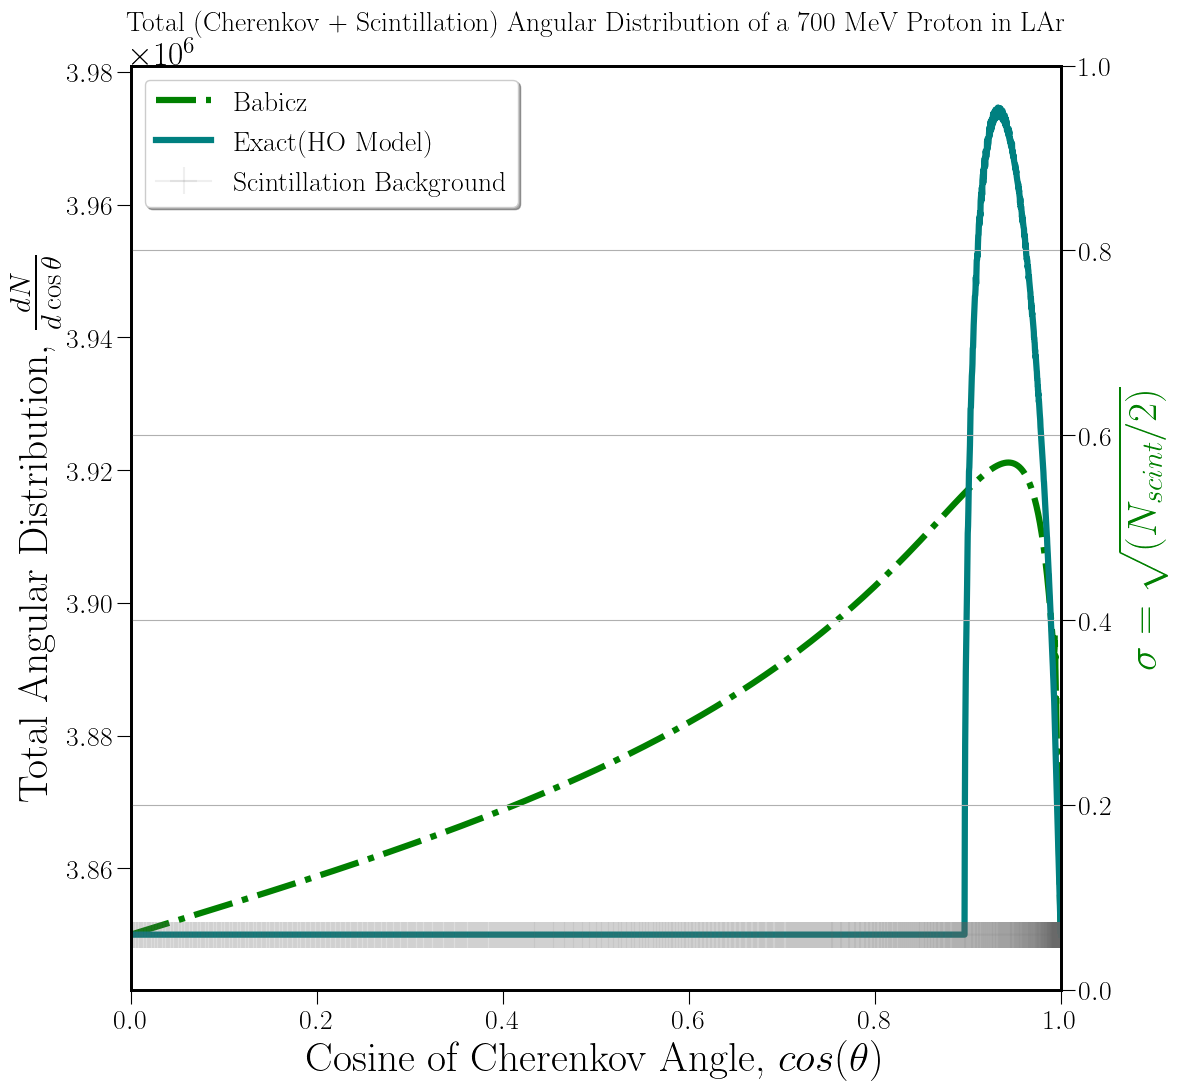

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=23, tm_hour=13, tm_min=36, tm_sec=12, tm_wday=2, tm_yday=113, tm_isdst=0)


In [349]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1) #plotx1= 0.99/(n_peakr*filtered_betalist[0])

print('ended: ', time.gmtime())


In [324]:
# # Load the saved file
# npzfile = np.load(filename)

# print(npzfile.files) #name of the columns

# # Extract the arrays using the argument names you fed to "np.savez"
# # ke = npzfile['t_arr']
# theta = npzfile['theta']
# costheta = npzfile['costheta']
# totalho = npzfile['totalho']
# normalho = npzfile['normalho']
# anomalousho = npzfile['anomalousho']
# scint = npzfile['scint']

# Load the saved file
npzfile1 = np.load(filename1)
npzfile2 = np.load(filename2)

print(npzfile1.files) #name of the columns
print(npzfile2.files) #name of the columns

# Extract the arrays using the argument names you fed to "np.savez"
# ke = npzfile['t_arr']
theta = npzfile1['theta']
costheta = npzfile1['costheta']
totalho = npzfile1['totalho']
normalho = npzfile1['normalho']
anomalousho = npzfile1['anomalousho']
scint = npzfile1['scint']

totalb = npzfile2['totalb']

# # Create the plot using the loaded arrays

# fig, axis = plt.subplots(edgecolor='black', linewidth=5)
# # axis.plot(costheta, totalho)
# axis.plot(theta, totalho)
# axis.plot(theta, normalho)
# axis.plot(theta, anomalousho)
# axis.plot(theta, totalb)
# # axis.plot(costheta, scint)
# # axis.plot(costheta, totalho+scint)

# plt.show()

['theta', 'costheta', 'totalho', 'normalho', 'anomalousho', 'scint']
['theta', 'costheta', 'totalb', 'scint']


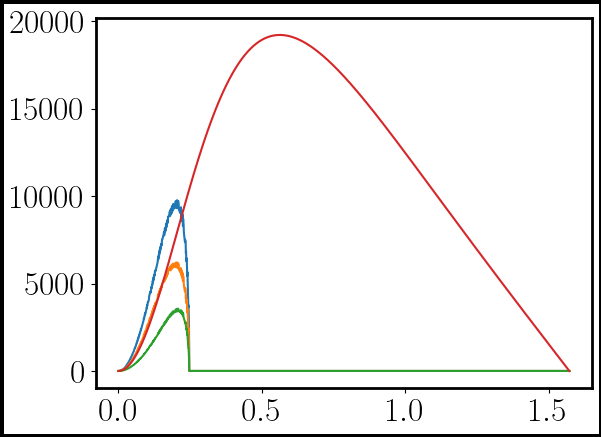

In [231]:
# Create the plot using the loaded arrays

fig, axis = plt.subplots(edgecolor='black', linewidth=5)
# axis.plot(costheta, totalho)
axis.plot(theta, totalho)
axis.plot(theta, normalho)
axis.plot(theta, anomalousho)
axis.plot(theta, totalb)
# axis.plot(costheta, scint)
# axis.plot(costheta, totalho+scint)

plt.show()

In [59]:
# Load the saved file
npzfile = np.load('cerenkovadallt.npz')

print(npzfile.files)

# Extract the arrays using the argument names you fed to "np.savez"
# ke = npzfile['t_arr']
# costheta = npzfile['x_all']
# totalho = npzfile['cerenkov_allhot']
# scint = npzfile['scint_all']

['costheta', 'normalallt', 'anomalousallt', 'totalallt', 'scintallt']


In [382]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation (500 MeV)

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# dx = 0.1
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from HO MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
#     ax = fig.add_subplot(111)
    
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 500 MeV Proton in LAr", fontsize= 20)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$',fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')

    ax2.grid()
    ax3.grid()
    
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)
#     colors_all =) ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    colors_all = ['lime','crimson','hotpink','green','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0]/2, linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0]/2, linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0]/2, linewidth= 4.5, label='Approximate', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0]/2, linewidth= 4.5, label='HO Model', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    

    # Plot sigma ticks on the right twin axis
    scint_value = 40000*500*0.275
    sigma = np.sqrt(scint_value/2)  # Value of sigma
    num_ticks = 22  # How many sigmas to plot
    sigma_tick_locations = np.array([scint_value/2 + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

        # num_ticks = 26 # How many sigmas to plot: 600 MeV
    # sigma_tick_locations = np.array([scint_value/2 + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    # sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
    
#     num_ticks = 51 # How many sigmas to plot: 700 MeV

#     # 5*\sigma increment
#     sigma_tick_locations = np.array([scint_value/2 + num*sigma for num in np.arange(0, num_ticks-1, 5)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
#     sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(5, num_ticks-1, 5)]))  # Create matching list of labels from the list of numbers of sigmas

#     num_ticks = 181 # How many sigmas to plot: 800 MeV

#     # 10*\sigma increment
#     sigma_tick_locations = np.array([scint_value/2 + num*sigma for num in np.arange(0, num_ticks-1, 10)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
#     sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(10, num_ticks-1, 10)]))  # Create matching list of labels from the list of numbers of sigmas

#     num_ticks = 351 # How many sigmas to plot: 1000 MeV
       
#     # 25*\sigma increment
#     sigma_tick_locations = np.array([scint_value/2 + num*sigma for num in np.arange(0, num_ticks-1, 25)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
#     sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(25, num_ticks-1, 25)]))  # Create matching list of labels from the list of numbers of sigmas

    # num_ticks = 801 # How many sigmas to plot: 1200 MeV
    
    # # 100*\sigma increment
    # sigma_tick_locations = np.array([scint_value/2 + num*sigma for num in np.arange(0, num_ticks-1, 100)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    # sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(100, num_ticks-1, 100)]))  # Create matching list of labels from the list of numbers of sigmas


    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     ax2.legend(loc='best',fontsize=18,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)


    # # Set up the right side of the plot with sigma values #Second Method: General
    # y_ticks = ax1.get_yticks()  # Gets a list of y-axis tick values on the right side
    # y_min, y_max = ax1.get_ylim()
    # ax2.set_ylim(y_min, y_max)
    # sigma_val = np.sqrt(scintp)  # Get standard deviation 
    # new_yticks = np.arange(scintp, y_max, sigma_val)
    # new_ytick_labels = np.array(np.concatenate((['0'], [r'{}$\sigma$'.format(i) for i in range(1, len(new_yticks))])))
    # ax2.set_yticks(new_yticks, labels=new_ytick_labels)

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)    

    plt.savefig('signal_over_background_500MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200
    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=23, tm_hour=17, tm_min=53, tm_sec=42, tm_wday=2, tm_yday=113, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_11280\935622639.py:162: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_11280\935622639.py:201: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 500 Mev Proton in LAr from HO MOdel fit: 200.159
Total Cerenkov photons emitted by a 500 Mev Proton in LAr using Apprx (PVS) fit: 912.567


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_11280\935622639.py:265: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_11280\935622639.py:265: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 

Total Cerenkov photons emitted by a 500 Mev Proton in LAr from Grace fit: 17393.786
Total Cerenkov photons emitted by a 500 Mev Proton in LAr using Babicz fit: 10503.681
5500000.0 5500000.0


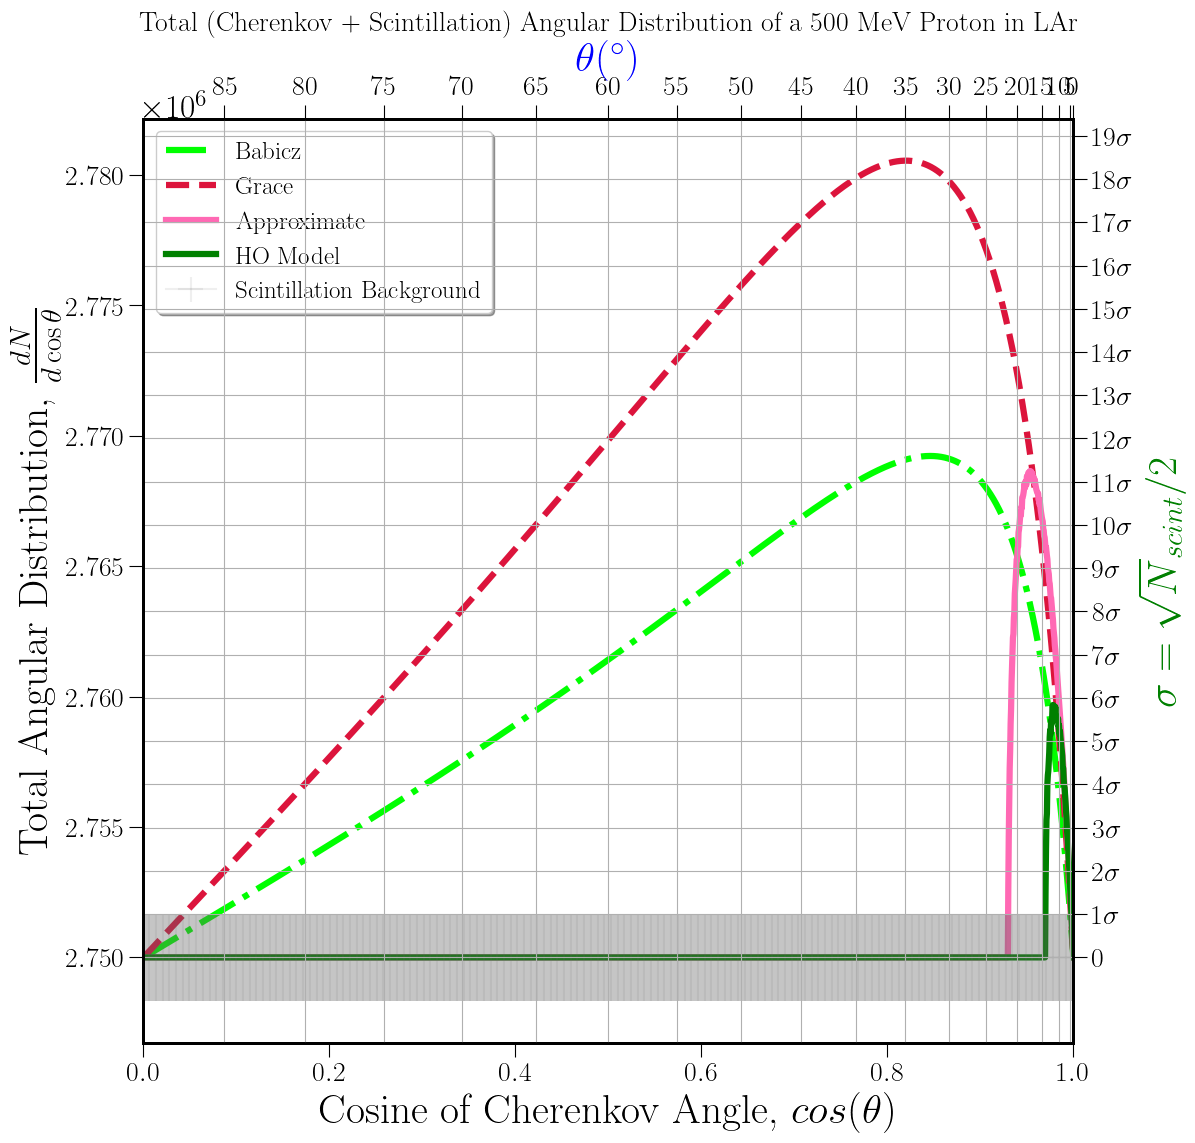

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=23, tm_hour=18, tm_min=22, tm_sec=5, tm_wday=2, tm_yday=113, tm_isdst=0)


In [384]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


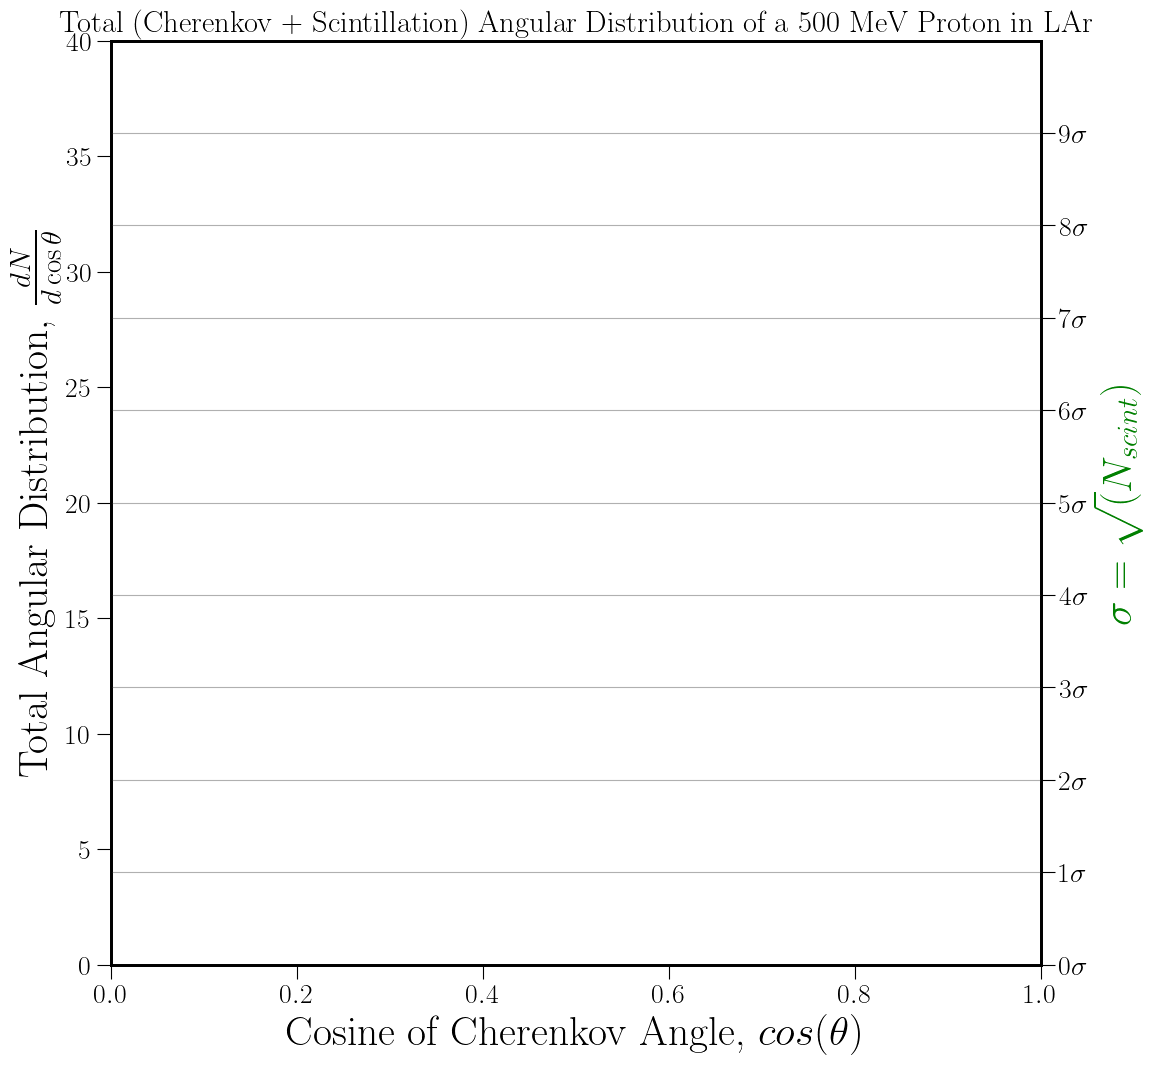

In [662]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
ax2 = ax1.twinx()


ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 500 MeV Proton in LAr", fontsize= 22)
ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
ax2.tick_params(axis='both',which='major',labelsize=20,length=10)

ax2.grid()

sigma = 4
num_ticks = 10
ax1.set_ylim(0,num_ticks*sigma)
sigma_tick_locations = np.arange(0, num_ticks*sigma, sigma)
sigma_tick_number = np.arange(0, num_ticks)
sigma_tick_labels = np.array([r'${}\sigma$'.format(num) for num in sigma_tick_number])
ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)
#ax1.yaxis.set_ticks_position('right')


ax2.set_ylim(ax1.get_ylim())
# plt.savefig('signal_over_background_500MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200
plt.show()

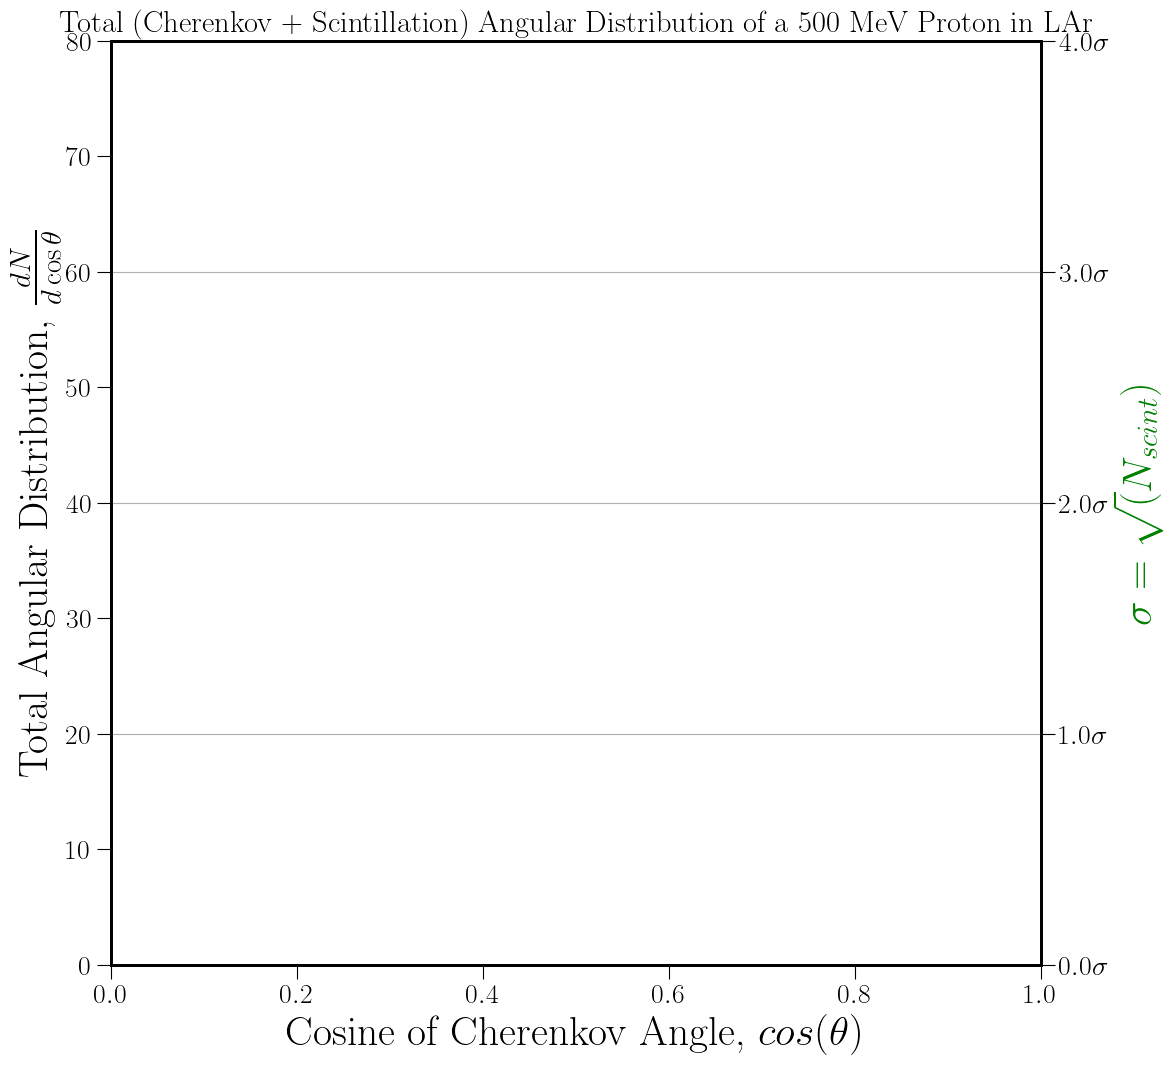

In [661]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
ax2 = ax1.twinx()


ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 500 MeV Proton in LAr", fontsize= 22)
ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
ax2.tick_params(axis='both',which='major',labelsize=20,length=10)

ax2.grid()

sigma = 4
num_ticks = 21
ax1.set_ylim(0,(num_ticks-1)*sigma)
sigma_tick_locations = np.arange(0, num_ticks*sigma, 5*sigma) # Create a list of the tick positions
sigma_tick_number = np.arange(0, (num_ticks-1)/4)
sigma_tick_labels = np.array([r'${}\sigma$'.format(num) for num in sigma_tick_number])  #Create matching list of labels from the list of numbers of sigmas
ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

plt.show()

In [519]:
np.arange(0, 100, 5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

Text(0, 0.5, 'the axis label')

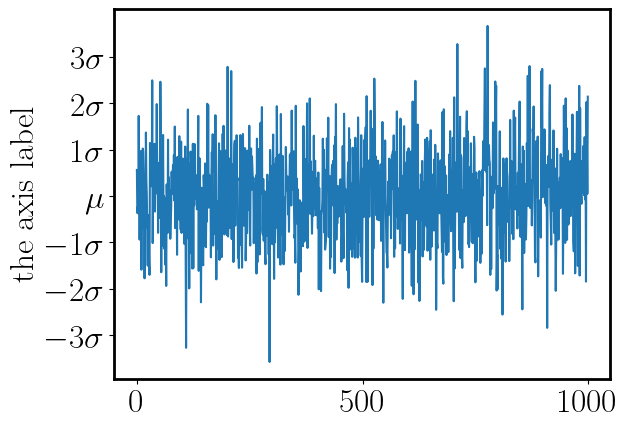

In [474]:
#Example: sigma labelling

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1000)
y = 42 * np.random.randn(1000)

signal_sigma = y.std()

num_sigma = 3
sigma_values = np.arange(-num_sigma, num_sigma+1)
yticks = signal_sigma * sigma_values
yticklabels = ['$'+str(k)+'\sigma$' if k != 0 else '$\mu$' for k in sigma_values]

plt.figure()
plt.plot(x, y)
plt.yticks(yticks, yticklabels)
plt.ylabel('the axis label')

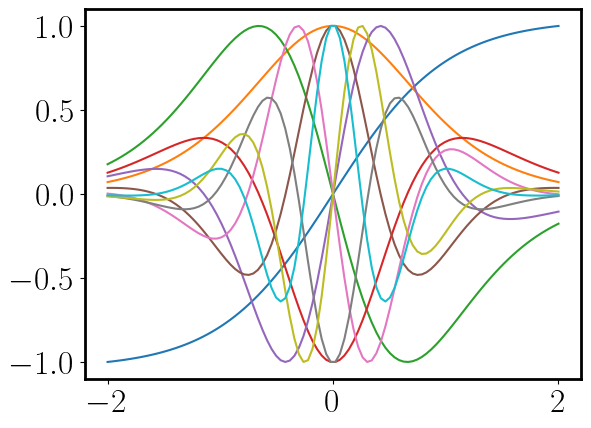

In [19]:
#Differentiation tool
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 100)
for i in range(10):
    df = nd.Derivative(np.tanh, n=i)
    y = df(x)
    h = plt.plot(x, y/np.abs(y).max())

In [68]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation 600 MeV

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# dx = 0.1
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([600]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from HO Model fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 600 MeV Proton in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$',fontsize=30, color='g')
    ax3.set_xlabel(r'$\theta (^{\circ})$', fontsize=30, color='b')

    ax2.grid()
    ax3.grid()
    

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax3.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)
    # colors_all =) ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] 
    colors_all = ['red','cyan','deeppink','orange','dimgray'] 
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0]/2, linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0]/2, linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0]/2, linewidth= 4.5, label='Approximate(SVE)', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0]/2, linewidth= 4.5, label='Exact(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    # ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)
    
    t=600
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value/2)  # Value of sigma
    num_ticks = 35 # How many sigmas to plot
    # 5*\sigma increment
    sigma_tick_locations = np.array([scint_value/2 + num*sigma for num in np.arange(5, num_ticks-1, 5)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(5, num_ticks-1, 5)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    # Set up the top side of the plot with angle in degrees
    ax3.set_xlim(plotx1, plotx2)
    new_xticks = np.flip(np.cos(np.arange(np.arccos(plotx2), np.arccos(plotx1), np.pi*10/180)))
    new_xtick_labels = np.flip(np.arange(np.arccos(plotx2)*180/np.pi, np.arccos(plotx1)*180/np.pi, 10)).astype(int)
    ax3.set_xticks(new_xticks, labels=new_xtick_labels)

    ax1.set_xlim(plotx1, plotx2)    

    plt.savefig('signal_over_background_600MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200
    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))
   

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=28, tm_hour=5, tm_min=31, tm_sec=37, tm_wday=0, tm_yday=118, tm_isdst=0)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\3246219828.py:162: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\3246219828.py:201: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 600 Mev Proton in LAr from HO Model fit: 2630.340
Total Cerenkov photons emitted by a 600 Mev Proton in LAr using Apprx (PVS) fit: 4531.947


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\3246219828.py:265: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_24220\3246219828.py:265: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**

Total Cerenkov photons emitted by a 600 Mev Proton in LAr from Grace fit: 29038.794
Total Cerenkov photons emitted by a 600 Mev Proton in LAr using Babicz fit: 18062.843
6600000.000000001 6600000.000000001


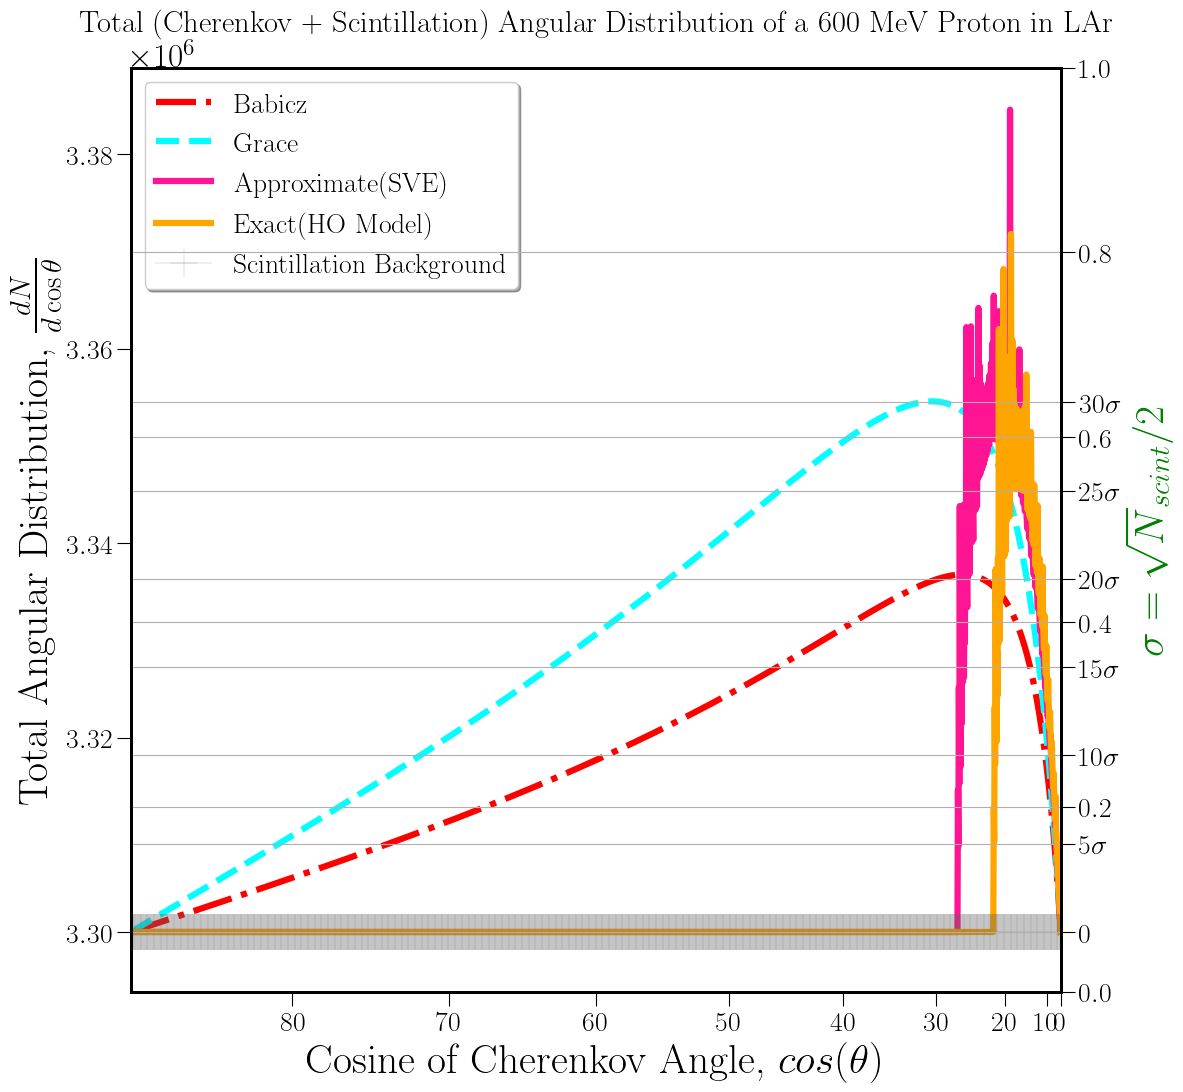

ended:  time.struct_time(tm_year=2025, tm_mon=4, tm_mday=28, tm_hour=5, tm_min=32, tm_sec=3, tm_wday=0, tm_yday=118, tm_isdst=0)


In [66]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=1,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [699]:
''# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation 700 MeV

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.1
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([700])
# t_arr = np.array([800])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 700 MeV Proton in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel(r'$\sigma= \sqrt{N_{scint}/2}$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
       
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0]/2, linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0]/2, linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0]/2, linewidth= 4.5, label='Approximate(SVE)', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0]/2, linewidth= 4.5, label='Exact(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0]/2, xerr=0, yerr=np.sqrt(scint_all[k][0]/2), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    # sigma = 4
    # num_ticks = 21
    # ax1.set_ylim(0,(num_ticks-1)*sigma)
    # sigma_tick_locations = np.arange(0, num_ticks*sigma, 5*sigma) # Create a list of the tick positions
    # sigma_tick_number = np.arange(0, (num_ticks-1)/4)
    # sigma_tick_labels = np.array([r'${}\sigma$'.format(num) for num in sigma_tick_number])  #Create matching list of labels from the list of numbers of sigmas
    # ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    # ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    t=700 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    
#     #1 \sigma increment
#     sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
#     sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
#     ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
#     ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    
    num_ticks = 51 # How many sigmas to plot

    # 5*\sigma increment
    sigma_tick_locations = np.array([scint_value/2 + num*sigma for num in np.arange(0, num_ticks-1, 5)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(5, num_ticks-1, 5)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    
    plt.savefig('signal_over_background_700MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_800MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=20, tm_hour=21, tm_min=29, tm_sec=52, tm_wday=2, tm_yday=263, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1601217613.py:163: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1601217613.py:202: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 700 Mev Proton in LAr from Resonance MOdel fit: 9526.764
Total Cerenkov photons emitted by a 700 Mev Proton in LAr using Apprx (PVS) fit: 12399.387


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1601217613.py:267: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1601217613.py:267: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * 

Total Cerenkov photons emitted by a 700 Mev Proton in LAr from Grace fit: 44575.405
Total Cerenkov photons emitted by a 700 Mev Proton in LAr using Babicz fit: 29163.899
7700000.000000001 7700000.000000001


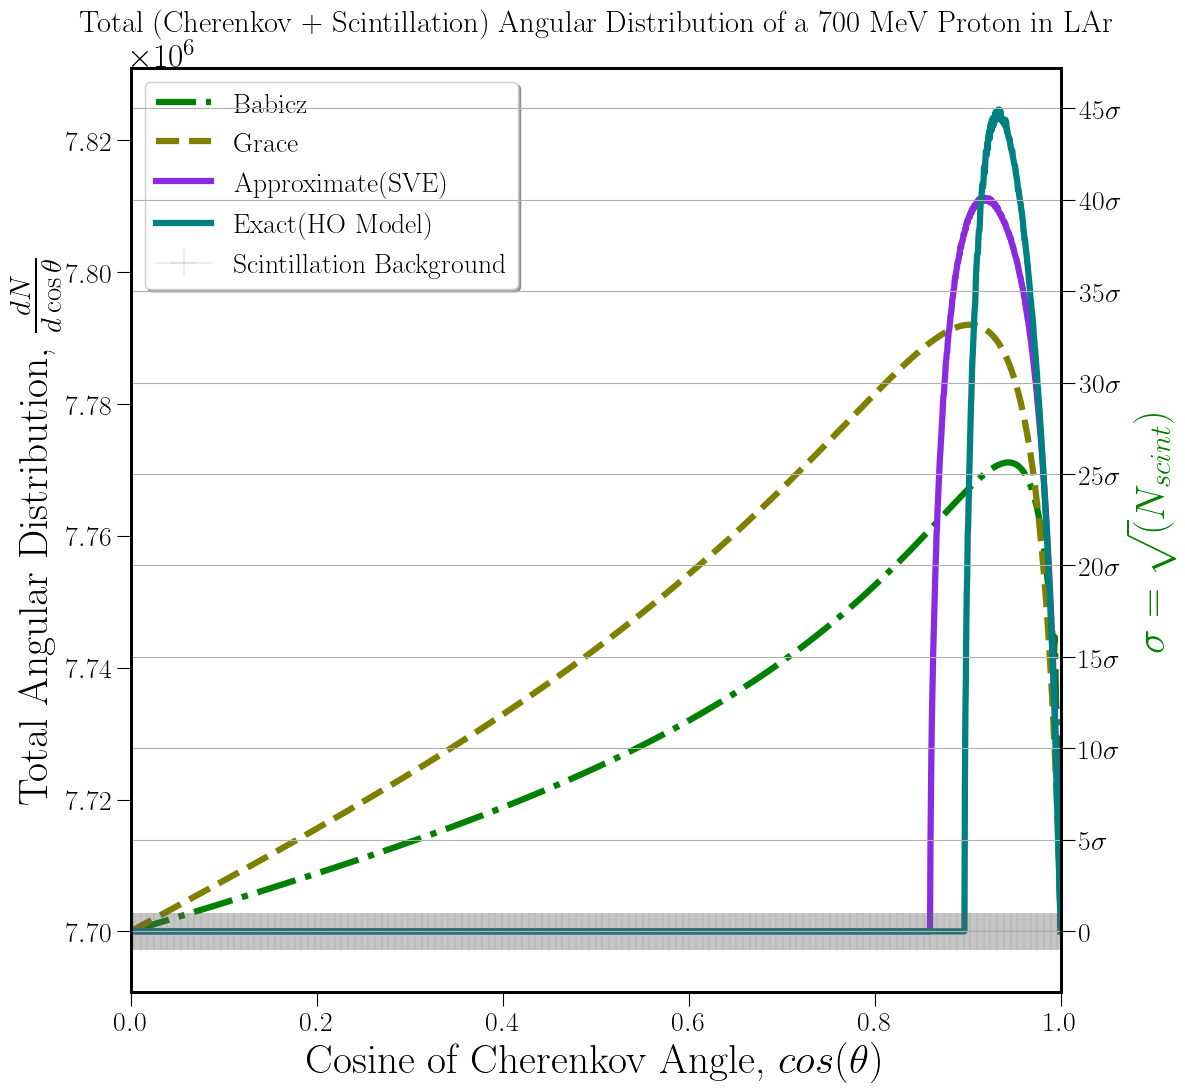

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=20, tm_hour=22, tm_min=32, tm_sec=58, tm_wday=2, tm_yday=263, tm_isdst=0)


In [700]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=1,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [717]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.1
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([700])
t_arr = np.array([800])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 800 MeV Proton in LAr", fontsize= 21)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
       
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approx (SVE)', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='Exact (HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)
    
    # sigma = 4
    # num_ticks = 21
    # ax1.set_ylim(0,(num_ticks-1)*sigma)
    # sigma_tick_locations = np.arange(0, num_ticks*sigma, 5*sigma) # Create a list of the tick positions
    # sigma_tick_number = np.arange(0, (num_ticks-1)/4)
    # sigma_tick_labels = np.array([r'${}\sigma$'.format(num) for num in sigma_tick_number])  #Create matching list of labels from the list of numbers of sigmas
    # ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    # ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    t=800 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 181 # How many sigmas to plot

    # 5*\sigma increment
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks-1, 10)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(10, num_ticks-1, 10)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    
    # plt.savefig('signal_over_background_50MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_700MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_800MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=20, tm_hour=23, tm_min=48, tm_sec=11, tm_wday=2, tm_yday=263, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\919277586.py:163: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\919277586.py:202: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 800 Mev Proton in LAr from Resonance MOdel fit: 22195.923
Total Cerenkov photons emitted by a 800 Mev Proton in LAr using Apprx (PVS) fit: 27339.532


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\919277586.py:267: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\919277586.py:267: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * la

Total Cerenkov photons emitted by a 800 Mev Proton in LAr from Grace fit: 67240.407
Total Cerenkov photons emitted by a 800 Mev Proton in LAr using Babicz fit: 47491.966
8800000.0 8800000.0


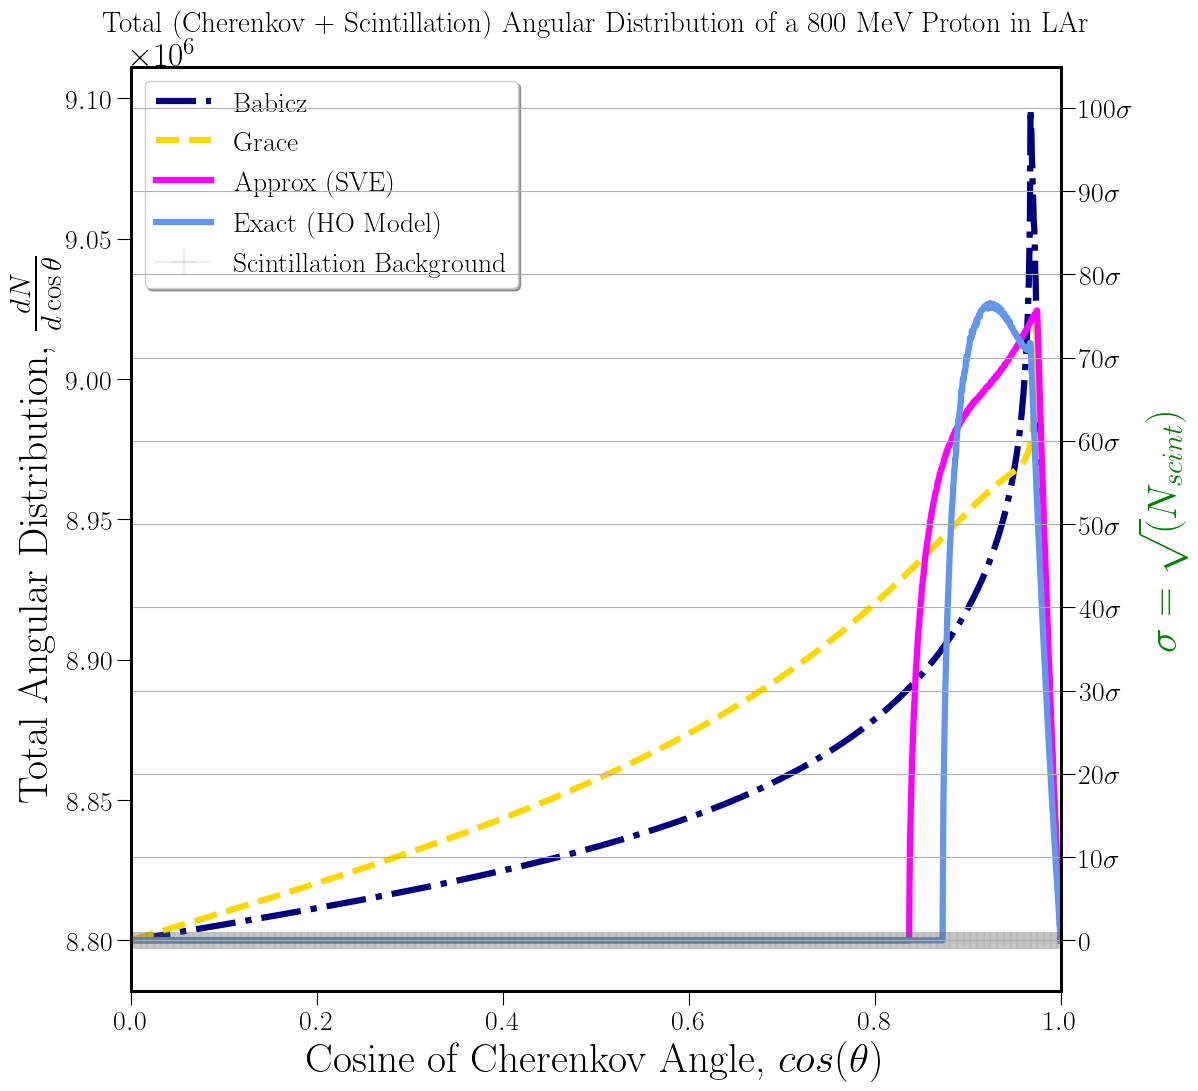

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=1, tm_min=28, tm_sec=44, tm_wday=3, tm_yday=264, tm_isdst=0)


In [718]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [731]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([700])
t_arr = np.array([1000])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 1000 MeV Proton in LAr", fontsize= 21)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
    colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #1000 MeV 'brown','purple'
       
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approx', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    t=1000 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 351 # How many sigmas to plot
       
    # 25*\sigma increment
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks-1, 25)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(25, num_ticks-1, 25)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    
    # plt.savefig('signal_over_background_50MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_700MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_1000MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=4, tm_min=40, tm_sec=57, tm_wday=3, tm_yday=264, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1360842741.py:163: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1360842741.py:202: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 1000 Mev Proton in LAr from Resonance MOdel fit: 62030.343
Total Cerenkov photons emitted by a 1000 Mev Proton in LAr using Apprx (PVS) fit: 76163.712


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1360842741.py:267: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1360842741.py:267: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * 

Total Cerenkov photons emitted by a 1000 Mev Proton in LAr from Grace fit: 131511.873
Total Cerenkov photons emitted by a 1000 Mev Proton in LAr using Babicz fit: 102751.991
11000000.0 11000000.0


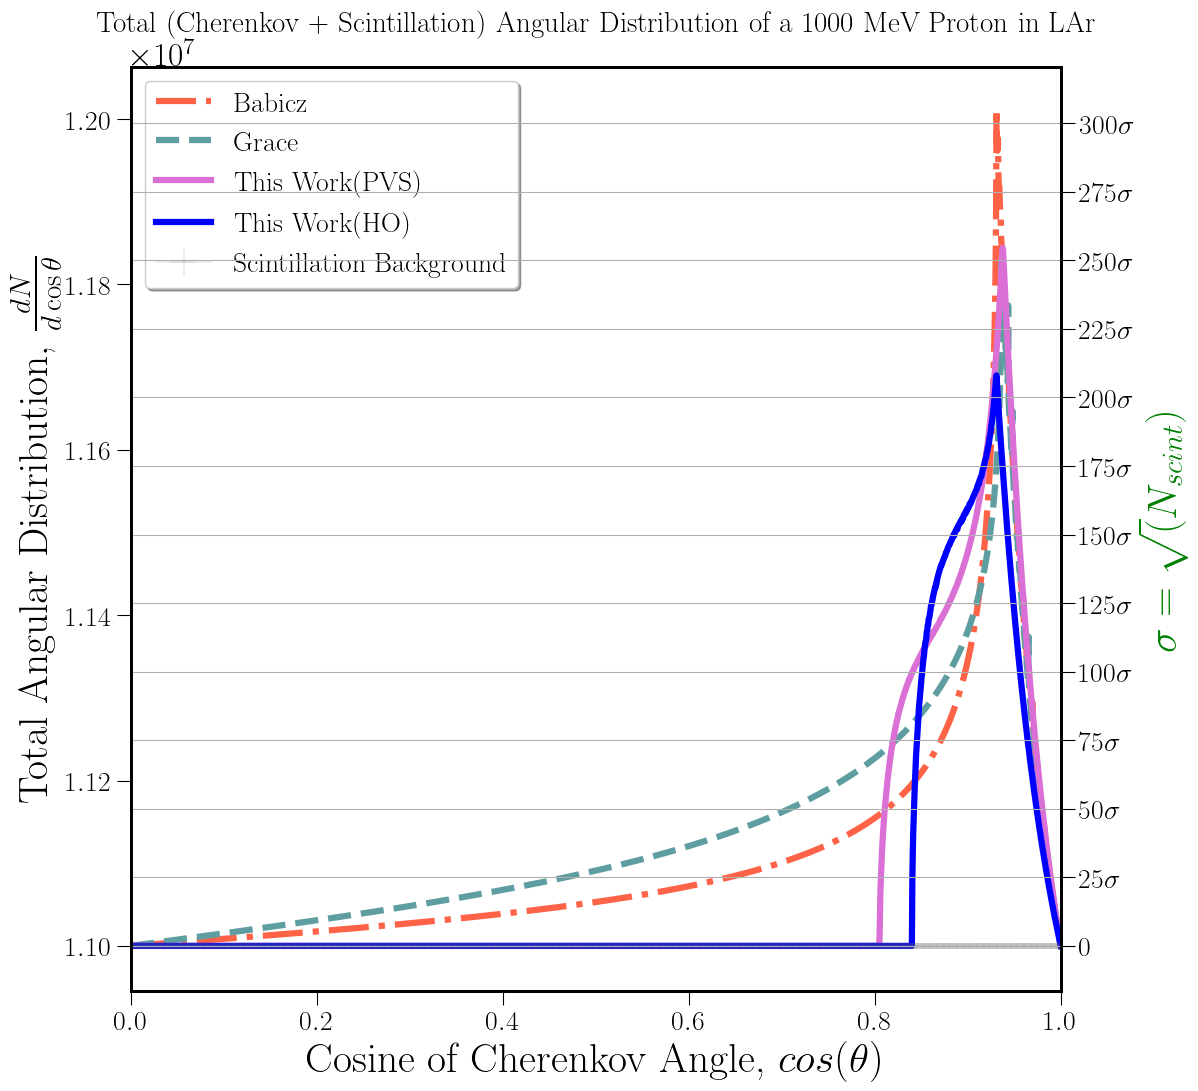

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=7, tm_min=8, tm_sec=53, tm_wday=3, tm_yday=264, tm_isdst=0)


In [732]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [761]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([700])
t_arr = np.array([1200])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 1200 MeV Proton in LAr", fontsize= 20)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #600 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #1000 MeV 'brown','purple'
    colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #1200 MeV   
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approx', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    t=1200 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 801 # How many sigmas to plot
    
#     #1 \sigma increment
#     sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
#     sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
#     ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
#     ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    
    # 5*\sigma increment
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks-1, 100)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(100, num_ticks-1, 100)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    
    # plt.savefig('signal_over_background_50MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_700MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_1200MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=8, tm_min=20, tm_sec=35, tm_wday=3, tm_yday=264, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3463335706.py:162: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3463335706.py:201: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 1200 Mev Proton in LAr from Resonance MOdel fit: 116268.126
Total Cerenkov photons emitted by a 1200 Mev Proton in LAr using Apprx (PVS) fit: 143554.795


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3463335706.py:266: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3463335706.py:266: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * 

Total Cerenkov photons emitted by a 1200 Mev Proton in LAr from Grace fit: 213969.943
Total Cerenkov photons emitted by a 1200 Mev Proton in LAr using Babicz fit: 176203.342
13200000.000000002 13200000.000000002


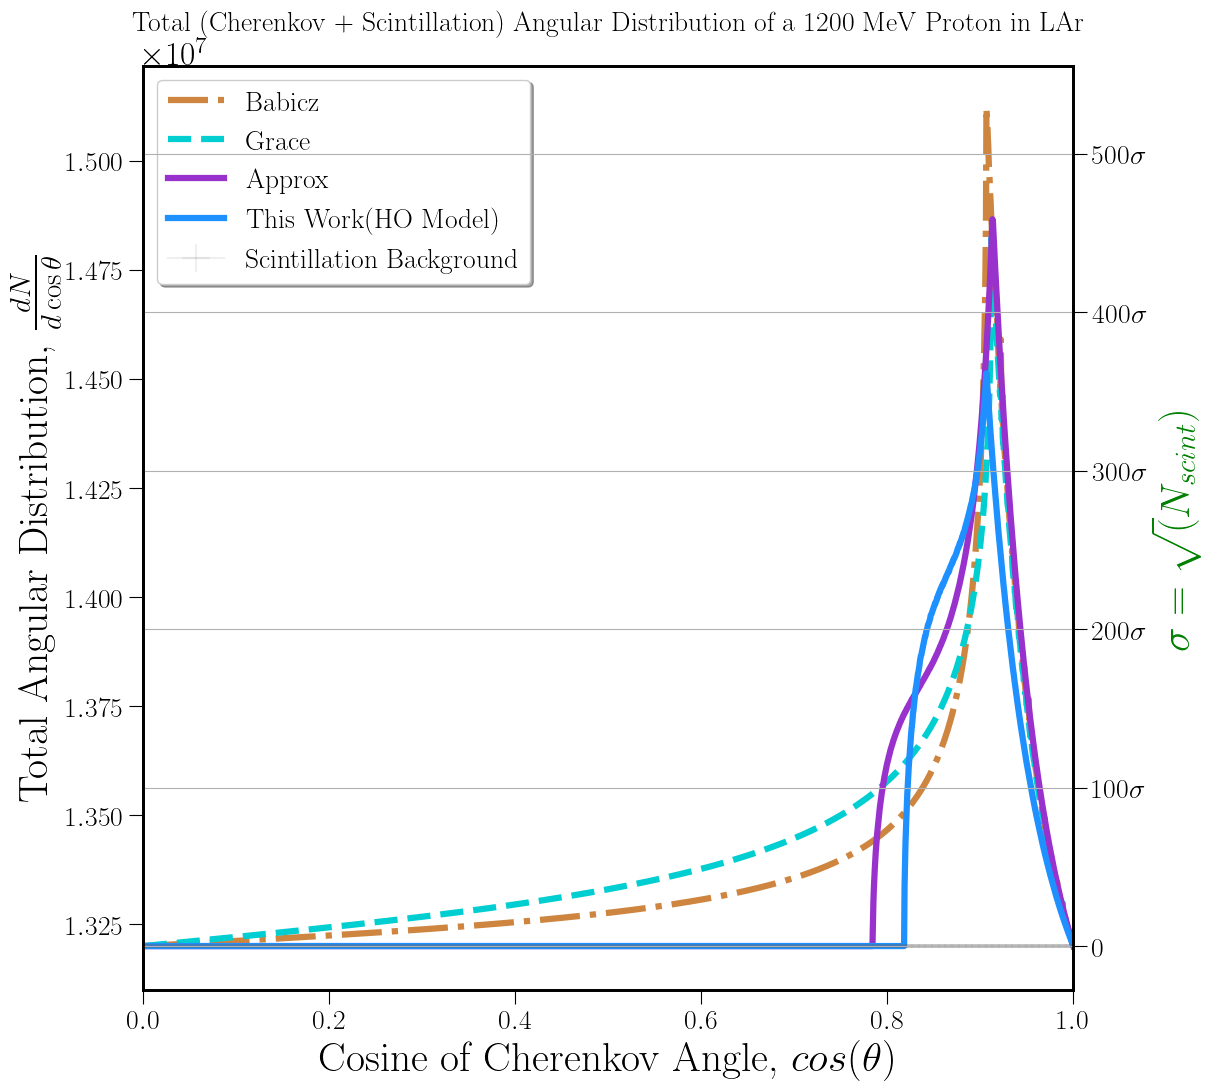

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=12, tm_min=4, tm_sec=31, tm_wday=3, tm_yday=264, tm_isdst=0)


In [762]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [765]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([700])
t_arr = np.array([1500])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 1500 MeV Proton in LAr", fontsize= 20)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #600 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #1000 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #1200 MeV   
    colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1500 MeV   
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approx', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    t=1500 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 1001 # How many sigmas to plot
    
#     #1 \sigma increment
#     sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
#     sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
#     ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
#     ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    
    # 5*\sigma increment
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks-1, 100)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(100, num_ticks-1, 100)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    
    # plt.savefig('signal_over_background_50MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_700MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_1500MeV_allfitsnew_p1.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=23, tm_min=12, tm_sec=19, tm_wday=3, tm_yday=264, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1557629153.py:162: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1557629153.py:201: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 1500 Mev Proton in LAr from Resonance MOdel fit: 216147.565
Total Cerenkov photons emitted by a 1500 Mev Proton in LAr using Apprx (PVS) fit: 268010.188


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1557629153.py:266: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1557629153.py:266: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * 

Total Cerenkov photons emitted by a 1500 Mev Proton in LAr from Grace fit: 360716.438
Total Cerenkov photons emitted by a 1500 Mev Proton in LAr using Babicz fit: 309667.608
16500000.000000002 16500000.000000002


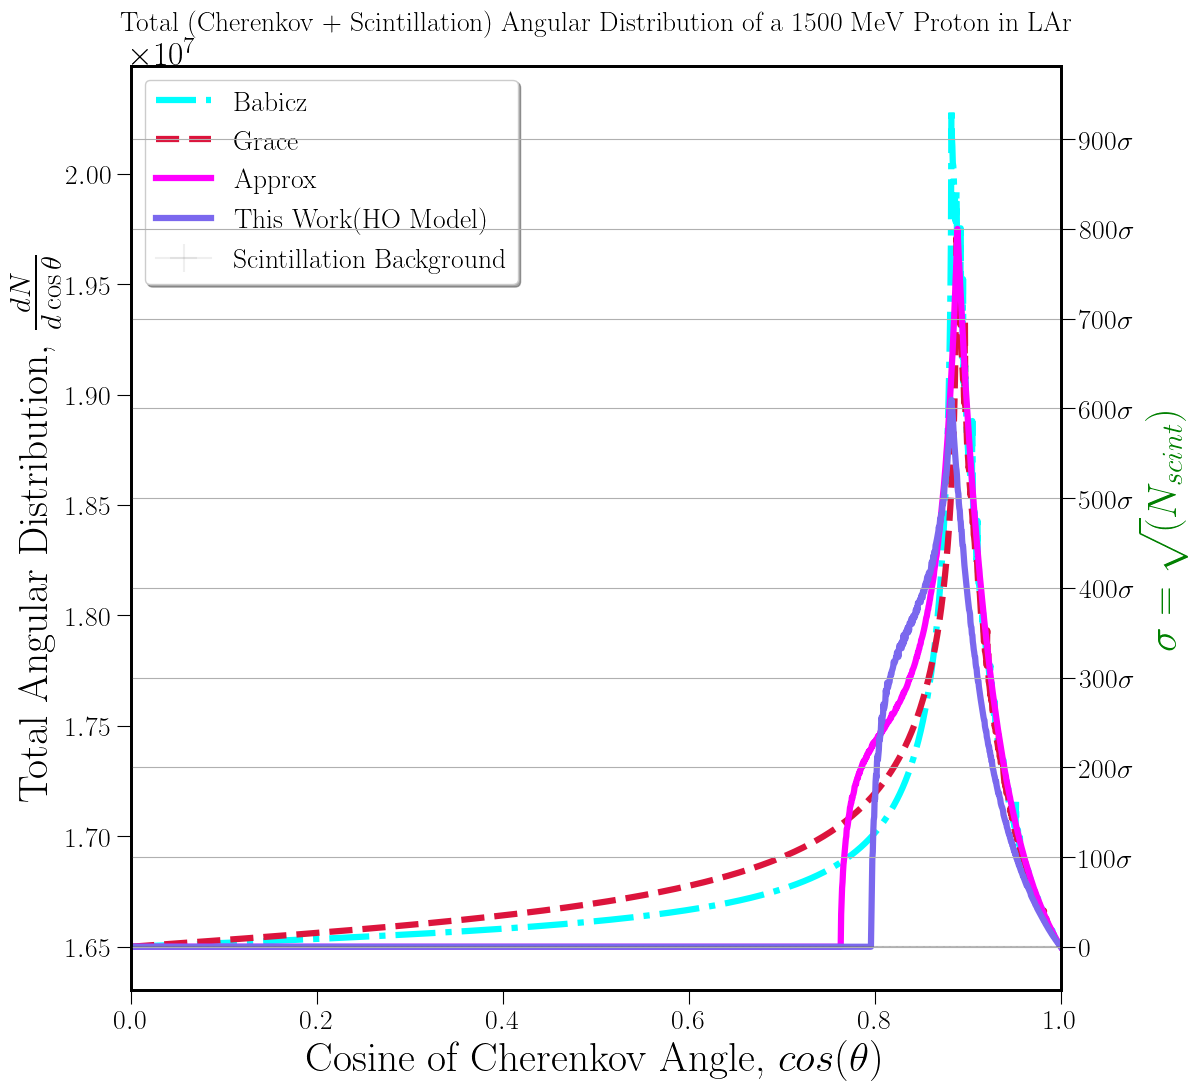

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=23, tm_min=40, tm_sec=38, tm_wday=3, tm_yday=264, tm_isdst=0)


In [767]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())
